In [16]:
# download takes 2~3 min
import io
import zipfile
import requests
import shutil
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import collections
import  matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import copy
import math
fontSize = 18

print(os.getcwd())

# download file from
#'https://zenodo.org/records/11090260/files/raw_data.zip?download=1'
os.chdir("./raw_data")

/Users/itoutouma/Research/BowTie/raw_data


FileNotFoundError: [Errno 2] No such file or directory: './raw_data'

In [17]:
# Figure creation functions

def statistics_mode(data):
    uniqs, counts = np.unique(data, return_counts=True)
    mode = np.mean(uniqs[counts == np.amax(counts)]) 
    return(mode)

def InitDependency(waist_size_data, title, X, inset = False, figsize=[6,4]):
    GoalMatirxSize = 60
    print(len(waist_size_data))
    if len(waist_size_data) < 6:
        colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
        labels = ["Rank 1","Rank 2", "Rank 3", "Rank 6"]  
    else:
        colors = ["#ff4b00", "#005aff","#03af7a", '#F067A6', '#A99663', "#000000"]
        labels = ["Rank 1","Rank 2", "Rank 3", "Rank 4", "Rank 5", "Rank 6"]
    fig, ax = plt.subplots(figsize=(figsize[0],figsize[1]), facecolor="white")
    if inset: axins = ax.inset_axes([0.55, 0.48, 0.4, 0.4])
    
    for i in range(len(waist_size_data)):
        ws = waist_size_data[i]
        ax.errorbar(X, ws.loc[:, "waist_mean"], yerr=ws.loc[:, "waist_std"], 
                    color=colors[i], label=labels[i], alpha=0.5, marker="o")
        if inset:
            axins.errorbar(X, ws.loc[:, "waist_mean"], yerr=ws.loc[:, "waist_std"], 
                    color=colors[i], label=labels[i], alpha=0.5, marker="o")
    ax.vlines(GoalMatirxSize, 0.5, 6.5, "grey", linestyles='dashed')
    ax.set_xlabel('$A_{0}$',size=14)  
    ax.set_ylabel('Mean no. of active nodes in waist',size=14)  
    ax.set_ylim(0.5,6.5)
    ax.legend(loc=4, title="Goal matrix rank") 
    
    if inset:
        axins.set_xlim(-1, 11)
        axins.set_ylim(0.5, 6.5)


    plt.tight_layout()  # レイアウトの設定
    matplotlib.rcParams['pdf.fonttype'] = 42
    return plt
    #plt.savefig("Figures/{}".format(title))

def TimeCourseOfActiveNode(N001_data, N40_data, nNode_, filetitle, end=5000, small_value = 0.01, large_value=40):
    #Properteis used in the figure design.
    if len(N001_data) < 6:
        N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
        N40_colors = ["#FF8B89", "#ABD0E4", "#8DBA99", "grey"]
        Ranks = ["Rank 1","Rank 2", "Rank 3", "Rank 6"]
        fig = plt.figure(figsize=(8, 7),facecolor="white", dpi=240)
    else:
        N001_colors = ["#ff4b00", "#005aff","#03af7a", '#F067A6', '#A99663', "#000000"]
        N40_colors = ["#ff4b00", "#005aff","#03af7a", '#F067A6', '#A99663', "#000000"]
        Ranks = ["Rank 1","Rank 2", "Rank 3", "Rank 4", "Rank 5", "Rank 6"]
        fig = plt.figure(figsize=(12, 8),facecolor="white", dpi=240)
        
    N001_mean = [np.mean(N001_data[j], axis=0) for j in range(len(N001_data))]
    N40_mean = [np.mean(N40_data[j], axis=0) for j in range(len(N40_data))]
    Layers = ["Layer 1","Layer 2", "Layer 3", "Layer 4", "Layer 5", "Fitness\n(x$10^3$)"]
    PannelPosition = ["left edge", 0,0,"right edge"]
    
    
    minimal = -1*int(math.ceil((abs(np.min(N001_mean[0][:,5])/1000))))
    minimal = list(range(minimal, 1))
    ax = list(range(6*len(N001_data)))
    layer = 0
    alpha_ = 1
    for i in range(len(ax)):    
        ax[i] = fig.add_subplot(6, len(N001_data), i+1)
        if layer < 5: # 5 is the layer for fitnes
            ax[i].set_ylim(0,nNode_+1)
            if nNode_ > 6: 
                ax[i].set_yticks(list(range(1,nNode_+1,2)))
            else:
                ax[i].set_yticks(list(range(1,nNode_+1)))
            ax[i].set_xticks([])
            ax[i].plot(N001_mean[i%len(N001_data)][0:end,layer], alpha=alpha_, color=N001_colors[i%len(N001_data)], label=f"$A_0$:{small_value}")
            ax[i].plot(N40_mean[i%len(N001_data)][0:end,layer], alpha=alpha_, color=N40_colors[i%len(N001_data)],label=f"$A_0$:{large_value}",
                   linestyle="dotted", dashes=[4,0.8])
        else:
            ax[i].set_yticks(np.array(minimal)*1000)
            ax[i].set_yticklabels([str(num) for num in minimal])
            alpha_ = 0.5
            ax[i].plot(N001_mean[i%len(N001_data)][0:end,layer], alpha=alpha_, color=N001_colors[i%len(N001_data)], label=f"$A_0$:{small_value}")
            ax[i].plot(N40_mean[i%len(N001_data)][0:end,layer], alpha=alpha_, color=N40_colors[i%len(N001_data)],label=f"$A_0$:{large_value}",
                   linestyle="dotted", dashes=[4,0.8])

    
        #Plot first 10 sample
        for j in range(10):
            ax[i].plot(N001_data[i%len(N001_data)][j][0:end,layer], alpha=0.1, color=N001_colors[i%len(N001_data)], label=f"$A_0$:{small_value}")
            ax[i].plot(N40_data[i%len(N001_data)][j][0:end,layer], alpha=0.1, color=N40_colors[i%len(N001_data)],label=f"$A_0$:{large_value}",
                        linestyle="dotted", dashes=[4,0.8])      

        if layer == 0:
            ax[i].legend(labels = [f"$A_0$:{small_value}", f"$A_0$:{large_value}"])
            ax[i].set_title(Ranks[i],size=14)

        if i%len(N001_data) == 0:
            ax[i].set_ylabel(Layers[layer],size=14)
        if i%len(N001_data) == len(N001_data)-1:
            layer+=1
        
    matplotlib.rcParams['pdf.fonttype'] = 42
    fig.text(0.04, 0.55, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=14)
    fig.text(0.5, 0.05, 'Generation (x100)', ha='center', va='center', size=14)
    return fig
    #fig.savefig("Figures/{}".format(filetitle))

import collections

def HistogramOfMinimalWaist(N001_data, N40_data, filetitle, small_value = 0.01, large_value=40):

    NUM = len(N001_data)
    if NUM < 6:
        labels = ["Rank 1", "Rank 2", "Rank 3", "Rank 6"]
        N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
        N40_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
        #counts_N001_normed, counts_N001_R, counts_N40_normed,counts_N40_R  = [0]*NUM, [0]*NUM, [0]*NUM, [0]*NUM
    else:
        labels = ["Rank 1","Rank 2", "Rank 3", "Rank 4", "Rank 5", "Rank 6"]
        N001_colors = ["#ff4b00", "#005aff","#03af7a", '#F067A6', '#A99663', "#000000"]
        N40_colors = ["#ff4b00", "#005aff","#03af7a", '#F067A6', '#A99663', "#000000"]
        #counts_N001_normed,counts_N001_R, counts_N40_normed,counts_N40_R  = [0]*NUM, [0]*NUM, [0]*NUM, [0]*NUM, [0]*NUM, [0]*NUM
        
    freq_N001 = [[np.min(N001_data[R_index][j][:,1:4]) for j in range(100)] for R_index in range(NUM)]
    freq_N40 = [[np.min(N40_data[R_index][j][:,1:4]) for j in range(100)] for R_index in range(NUM)]

    bins_list = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
    #bins_list = [0.5,1.5,2.5,3.5,4.5,5.5,6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5]
    counts_N001_normed,counts_N001_R, counts_N40_normed,counts_N40_R  = [0]*NUM, [0]*NUM, [0]*NUM, [0]*NUM
    for R_index in range(NUM):
        counts_N001_R[R_index], bins = np.histogram(freq_N001[R_index], bins=bins_list)
        counts_N001_normed[R_index] = counts_N001_R[R_index] / sum(counts_N001_R[R_index])
    for R_index in range(NUM):
        counts_N40_R[R_index], bins = np.histogram(freq_N40[R_index], bins=bins_list)
        counts_N40_normed[R_index] = counts_N40_R[R_index] / sum(counts_N40_R[R_index])

    weight_ = [counts_N001_normed,  counts_N40_normed]

    colors = [N001_colors, N40_colors]

    fig = plt.figure(figsize=(4, 7),facecolor="white", dpi=240)
    ax = [0,1]

    for i in range(2):
        ax[i] = fig.add_subplot(2, 1, i+1)
        if NUM < 6:
            ax[i].hist([bins[:-1],bins[:-1],bins[:-1],bins[:-1]], 
                   bins=bins, label=labels, color=colors[i], weights=weight_[i])
        else:
            ax[i].hist([bins[:-1],bins[:-1],bins[:-1],bins[:-1], bins[:-1], bins[:-1]], 
                       bins=bins, label=labels, color=colors[i], weights=weight_[i])
        ax[i].set_xlim(0,7)
        #ax[i].set_xlim(0,13)
        ax[i].set_ylim(0,1)
        ax[i].set_xticks([1, 2, 3, 4, 5, 6])
        #ax[i].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
        ax[i].set_ylabel("Frequency",fontsize=14)
        ax[i].set_xlabel("Instantaneous minimum waist size",fontsize=13, x=0.38)

    ax[0].set_title(f"$A_0$:{small_value}",fontsize=14)
    ax[1].set_title(f"$A_0$:{large_value}",fontsize=14)
    ax[0].legend(labels)
    ax[1].legend(labels, loc=0)
    fig.subplots_adjust(hspace=0.5, left=0.3)
    matplotlib.rcParams['pdf.fonttype'] = 42
    return fig
    #fig.savefig("Figures/{}".format(filetitle))

### Fig 3a

- Data directory: Fig3a
- Simulation script: `RankDependency.py`

> (a) Reproduction of the previous results [2]. The Y-axis shows the mode among 100 runs of the number of active nodes in the most-adapted network. The initial link intensity is A_0:0.01. The error bars represent the standard deviation. Goal matrix elements are randomized under the conditions of rank 1 (red), rank 2 (blue), rank 3 (green), rank 4 (pink), rank 5 (brown) and rank 6 (black). The norm ‖G‖_F is normalized to the same value (‖G‖_F  = 60). The typical structures of the evolved network are shown within boxes.

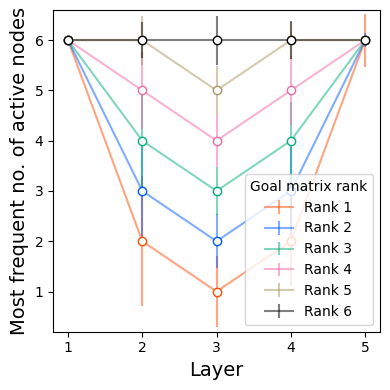

In [18]:
# from matplotlib.backends.backend_pdf import PdfPages
#Rank dependency of genetic algorithm

RD1 = np.loadtxt("Fig3a/RankDepend_R1_A001.txt")
RD2 = np.loadtxt("Fig3a/RankDepend_R2_A001.txt")
RD3 = np.loadtxt("Fig3a/RankDepend_R3_A001.txt")
RD4 = np.loadtxt("Fig3a/RankDepend_R4_A001.txt") #0306 追加データ
RD5 = np.loadtxt("Fig3a/RankDepend_R5_A001.txt") #0306 追加データ
RD6 = np.loadtxt("Fig3a/RankDepend_R6_A001.txt")
colors = ["#ff4b00", "#005aff","#03af7a", '#F067A6', '#A99663', "#000000"]
labels = ["Rank 1","Rank 2", "Rank 3", "Rank 4", "Rank 5", "Rank 6"]
RD_data = [RD1, RD2, RD3, RD4, RD5, RD6]
RDs_ave = [[statistics_mode(RD_data[j][:,i]) for i in range(5)] for j in range(len(RD_data))]
RDs_std = [np.std(RD_data[j], axis=0) for j in range(len(RD_data))]
X = [1,2,3,4,5]
plt.figure(figsize=(4,4), facecolor="white")
plt.xlabel('Layer', size=14)  # x軸ラベル
plt.ylabel('Most frequent no. of active nodes',size=14)  # y軸ラベル
plt.ylim(0.2,6.6)
for i in range(len(RD_data)):
    plt.errorbar(X, RDs_ave[i],yerr=RDs_std[i], color=colors[i], label=labels[i], alpha=0.5, zorder=1)
    plt.scatter(X, RDs_ave[i], alpha=1.0, facecolor='white', edgecolors=colors[i], zorder=2)

plt.legend(loc=4, title="Goal matrix rank")    
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6])
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/Fig3/FigA.pdf")


### Fig 3b
- Data directory: Fig3b
- Simulation script: `InitDependency.py`

> (b) The bow-tie emergence depends on the initial link intensity. X-axis: Link intensity of the initial network. Y-axis: Mean number of active nodes in the waist layer in an adapted network among 100 runs. The error bars are the standard deviation. The dashed line shows ‖G‖_F=60. Network structures in the box are the typical evolved network in the indicated point. The point enclosed by the bracket (A_0:0.01) corresponds to Fig. 1a. (c, d) Statistics during evolution.
> 

6


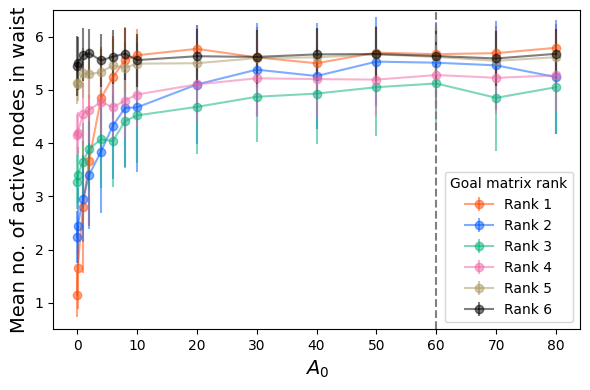

In [19]:
X = [0.01,0.1,1.0,2.0,4.0,6.0,8.0,10,20,30,40,50,60,70,80]
waistR1 = pd.read_csv("Fig3b/InitDepend_R1.csv")
waistR2 = pd.read_csv("Fig3b/InitDepend_R2.csv")
waistR3 = pd.read_csv("Fig3b/InitDepend_R3.csv")
waistR4 = pd.read_csv("Fig3b/InitDepend_R4.csv")
waistR5 = pd.read_csv("Fig3b/InitDepend_R5.csv")
waistR6 = pd.read_csv("Fig3b/InitDepend_R6.csv")
waist_data = [waistR1, waistR2, waistR3 ,waistR4, waistR5, waistR6]
pt = InitDependency(waist_data, "Fig3B.eps", X, figsize=[6,4])
#pt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/Fig3/FigB.pdf")

### Fig3CD
- Data directory: Fig3cd
- Simulation script: `EvolTrajectory.py` 

> (c, d) Statistics during evolution. (c) Evolution trajectories of the number of nodes in each layer. The bottom panel shows the average fitness trajectory. Simulation starts from A_0=0.01 in the solid lines and A_0=40 in the dashed lines. Trajectories are averaged among independent simulation runs (n=100 for each color). The simulation runs that reach F > -0.01 are used.  (d) Distribution of the instantaneous minimum waist width that the network experienced during evolution (n=100 for each color).

(100, 1000, 6)
(100, 1000, 6)


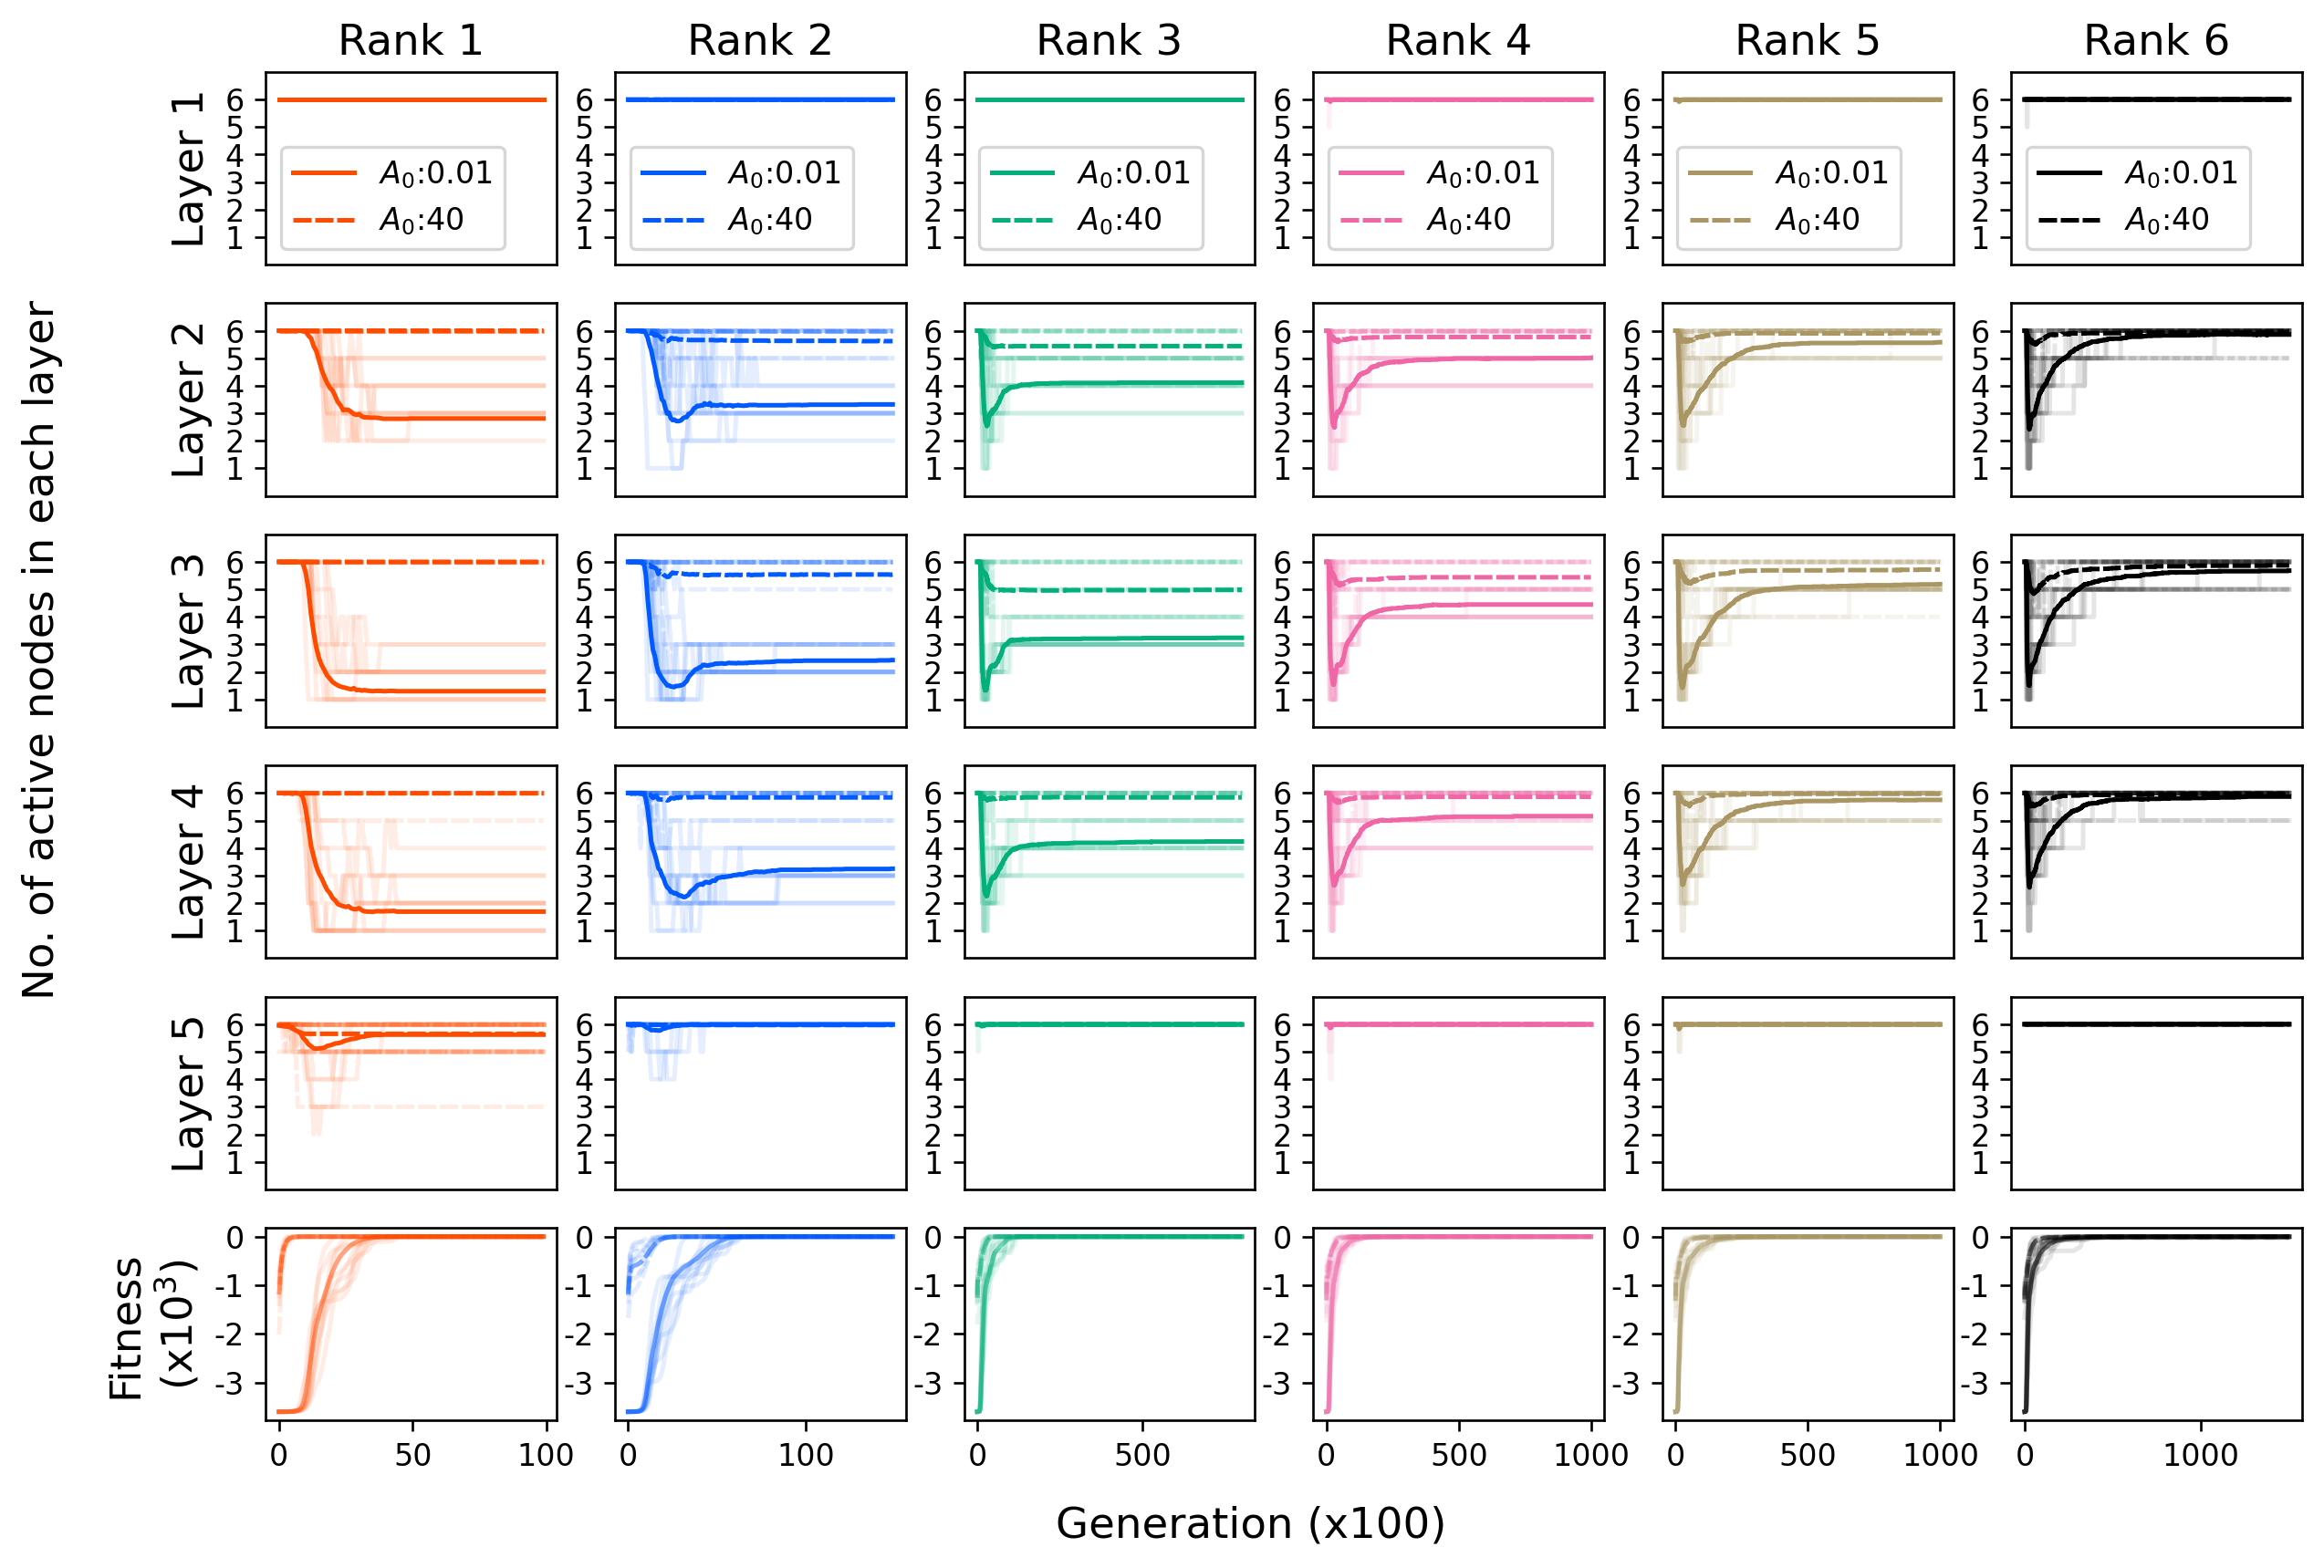

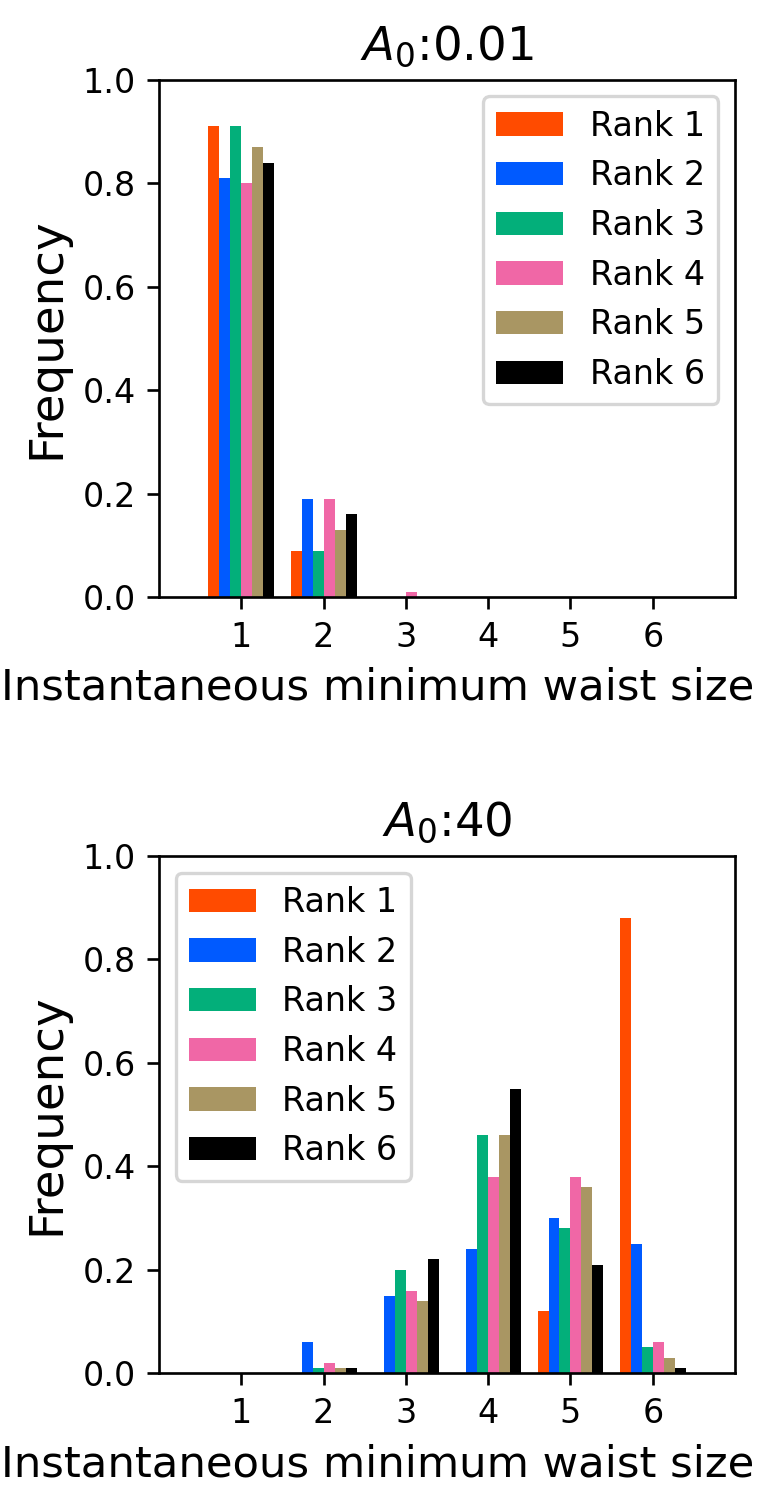

In [21]:
N001R1 = np.load("Fig3CD/EvolTrajectoryA001_R1.npy",allow_pickle=True)
N001R2 = np.load("Fig3CD/EvolTrajectoryA001_R2.npy",allow_pickle=True)
N001R3 = np.load("Fig3CD/EvolTrajectoryA001_R3.npy",allow_pickle=True)
N001R4 = np.load("Fig3CD/EvolTrajectoryA001_R4.npy",allow_pickle=True)
N001R5 = np.load("Fig3CD/EvolTrajectoryA001_R5.npy",allow_pickle=True)
N001R6 = np.load("Fig3CD/EvolTrajectoryA001_R6.npy",allow_pickle=True)
N40R1  = np.load("Fig3CD/EvolTrajectoryA40_R1.npy",allow_pickle=True)
N40R2  = np.load("Fig3CD/EvolTrajectoryA40_R2.npy",allow_pickle=True)
N40R3  = np.load("Fig3CD/EvolTrajectoryA40_R3.npy",allow_pickle=True)
N40R4  = np.load("Fig3CD/EvolTrajectoryA40_R4.npy",allow_pickle=True)
N40R5  = np.load("Fig3CD/EvolTrajectoryA40_R5.npy",allow_pickle=True)
N40R6  = np.load("Fig3CD/EvolTrajectoryA40_R6.npy",allow_pickle=True)
print(N001R4.shape)
print(N001R5.shape)
N001_data = [N001R1, N001R2, N001R3, N001R4, N001R5, N001R6]
N40_data = [N40R1, N40R2, N40R3, N40R4, N40R5, N40R6]
#N001_data = [N001R3, N001R4, N001R5, N001R6]
#N40_data = [N40R1, N40R2, N40R3, N40R6]

fig = TimeCourseOfActiveNode(N001_data, N40_data, 6, "Fig3C.pdf")
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/Fig3/Fig3C.pdf")
fig = HistogramOfMinimalWaist(N001_data, N40_data, "Fig3D.pdf")
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/Fig3/Fig3D.pdfCD

### SFig7 a
- Data directory: VarianceNorm_a
- Simulation script: `GA_InitDependency.py` (set GoalMatrixVariance = 1)


> (a) The dependence of bow-tie emergence on the initial link intensity for the goal matrix in which the variance in goal matrix elements is normalized. X-axis: The link intensity of the initial network. Y-axis: Mean number of active nodes in the waist layer in an adapted network among 100 runs. The error bars represent the standard deviation. The inset is a magnification of results in the range A_0= 0–10. 

4


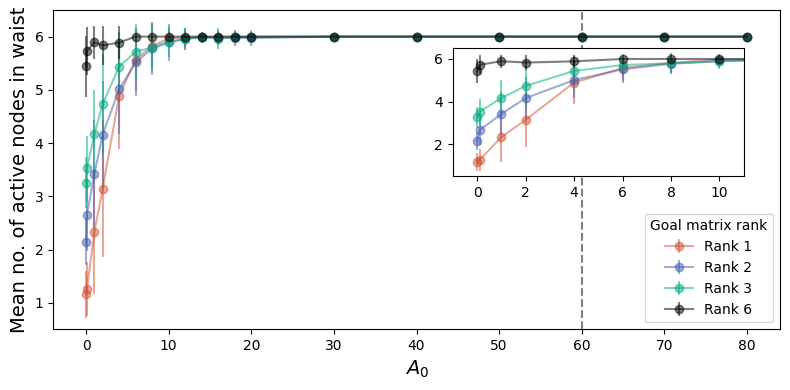

In [20]:
X = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
waistR1 = pd.read_csv("VarianceNorm_a/InitDepend_R1_VN.csv")
waistR2 = pd.read_csv("VarianceNorm_a/InitDepend_R2_VN.csv")
waistR3 = pd.read_csv("VarianceNorm_a/InitDepend_R3_VN.csv")
waistR6 = pd.read_csv("VarianceNorm_a/InitDepend_R6_VN.csv")
waist_data = [waistR1, waistR2, waistR3 ,waistR6]
pt = InitDependency(waist_data, "SFig4A.eps", X, True, [8,4])
#pt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig7/SuppFig7a.pdf")

### SFig6 ab 
- Data directory: AlternativeDef1_ab
- Simulation script: `EvolTrajectory.py` (Set ActiveNodeDefinition = 1)

> (A) Evolution trajectories of the number of nodes in each layer and (B) the distribution of the instantaneous minimum waist size (sample size: n=100 for each color) for the case where active node is defined as relative contribution to the total in-out relation (see S1 text).

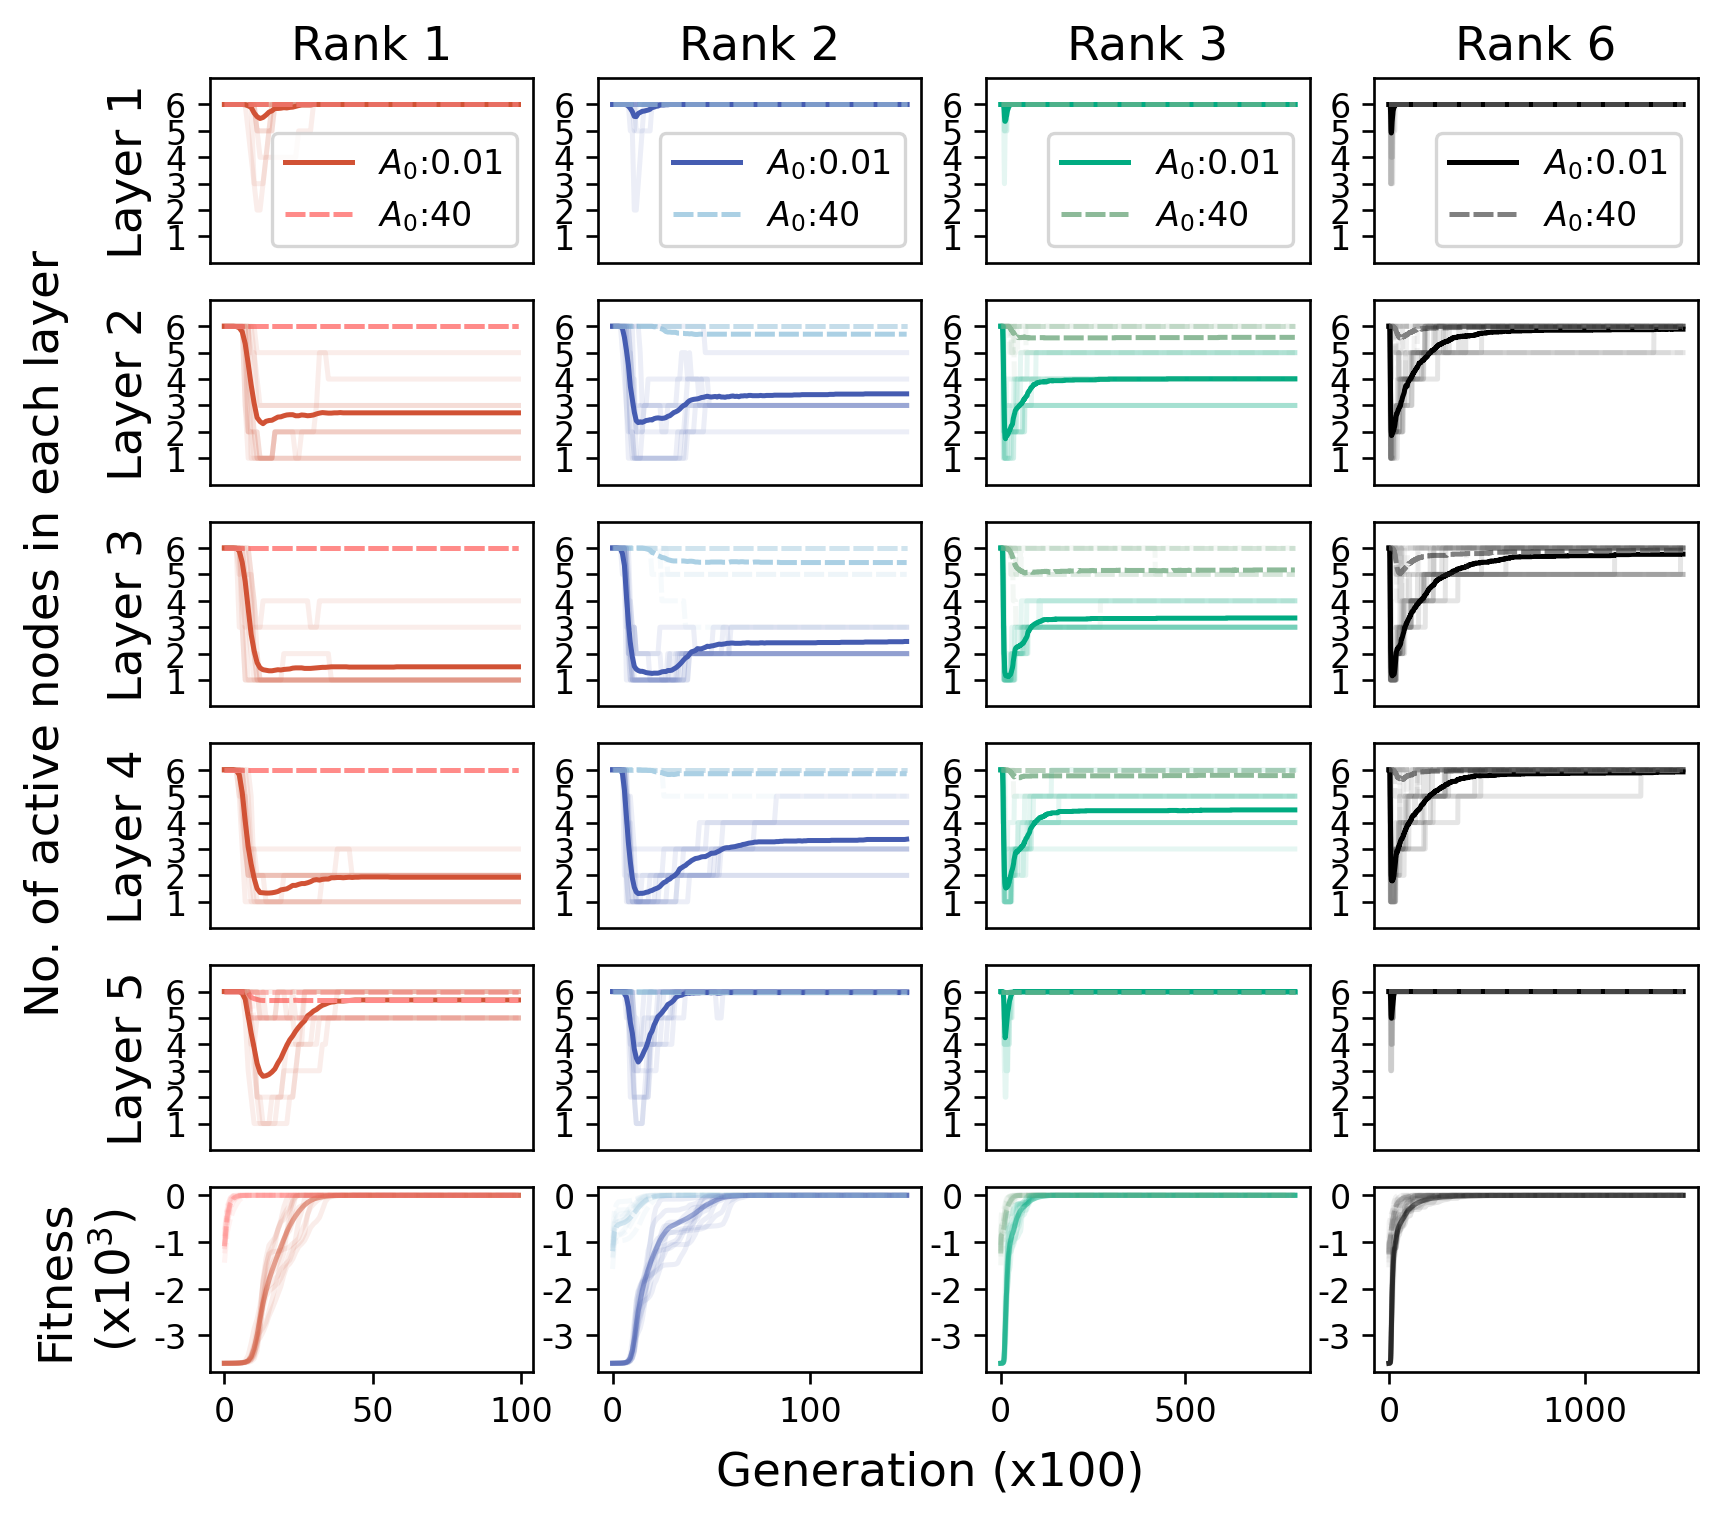

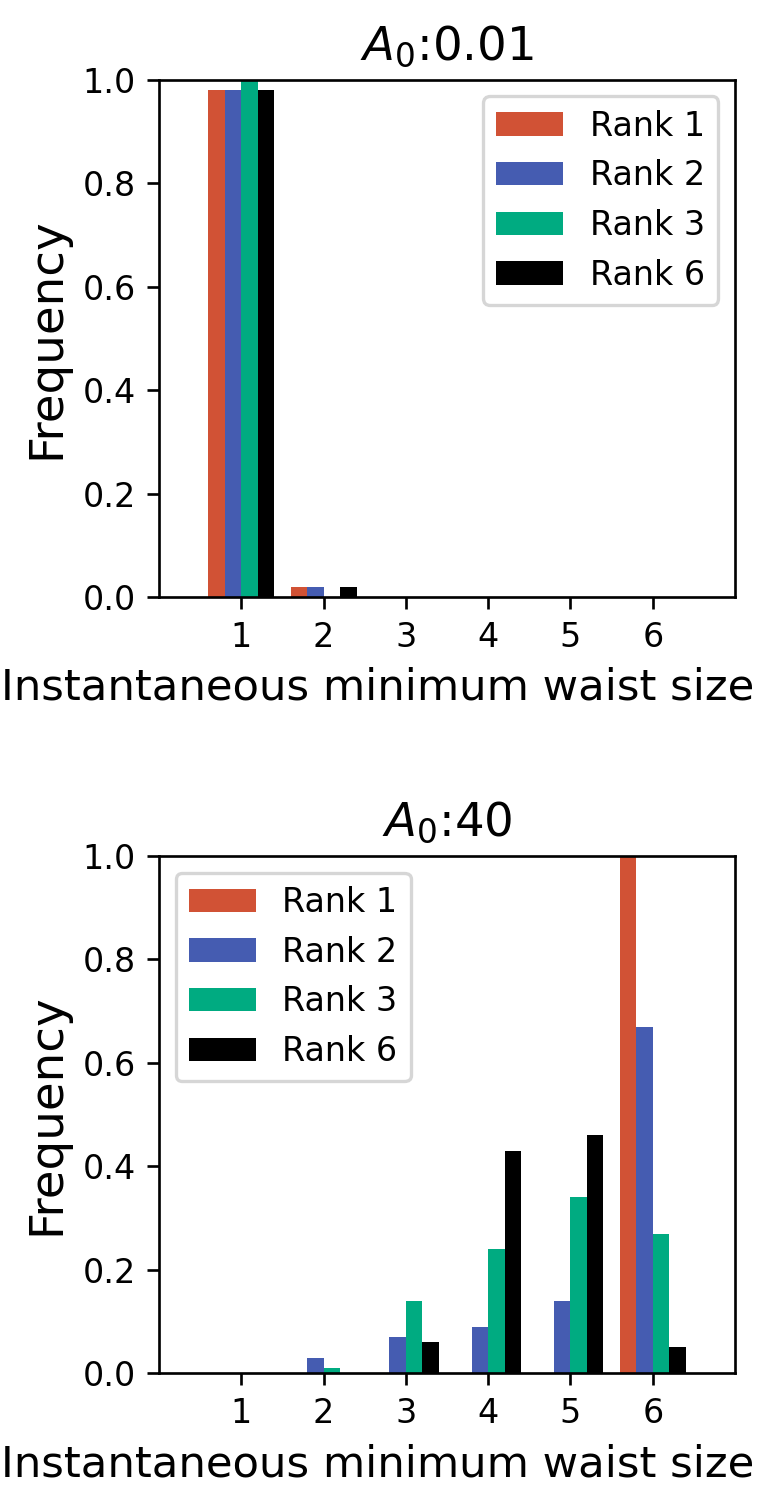

In [22]:
# Time evolution of the number of nodes in each layer 
#  Active node  definition: Relative value of maximum interaction from target node
# Goal matrix: Norm normalize

N001R1 = np.load("AlternativeDef1_ab/EvolTrajectoryA001_R1_AN1.npy")
N001R2 = np.load("AlternativeDef1_ab/EvolTrajectoryA001_R2_AN1.npy")
N001R3 = np.load("AlternativeDef1_ab/EvolTrajectoryA001_R3_AN1.npy")
N001R6 = np.load("AlternativeDef1_ab/EvolTrajectoryA001_R6_AN1.npy")
N40R1 =  np.load("AlternativeDef1_ab/EvolTrajectoryA40_R1_AN1.npy")
N40R2 =  np.load("AlternativeDef1_ab/EvolTrajectoryA40_R2_AN1.npy")
N40R3 =  np.load("AlternativeDef1_ab/EvolTrajectoryA40_R3_AN1.npy")
N40R6 =  np.load("AlternativeDef1_ab/EvolTrajectoryA40_R6_AN1.npy")
N001_active_totalinout_data = [N001R1, N001R2, N001R3, N001R6]
N40_active_totalinout_data = [N40R1, N40R2, N40R3, N40R6]
a = TimeCourseOfActiveNode(N001_active_totalinout_data, N40_active_totalinout_data, 6, "")
b = HistogramOfMinimalWaist(N001_active_totalinout_data, N40_active_totalinout_data, "")
#a.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig6/SuppFig6a.pdf")
#b.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig6/SuppFig6b.pdf")

### SFig6 cd 
- Data directory: AlternativeDef2_cd
- Simulation script: `EvolTrajectory.py` (Set ActiveNodeDefinition = 2)

>  (C) Evolution trajectories and (D) the distribution of the instantaneous minimum waist size (sample size: n=100 for each color) for the case where active node is defined as the relative strength of maximum interactions (see S1 text).

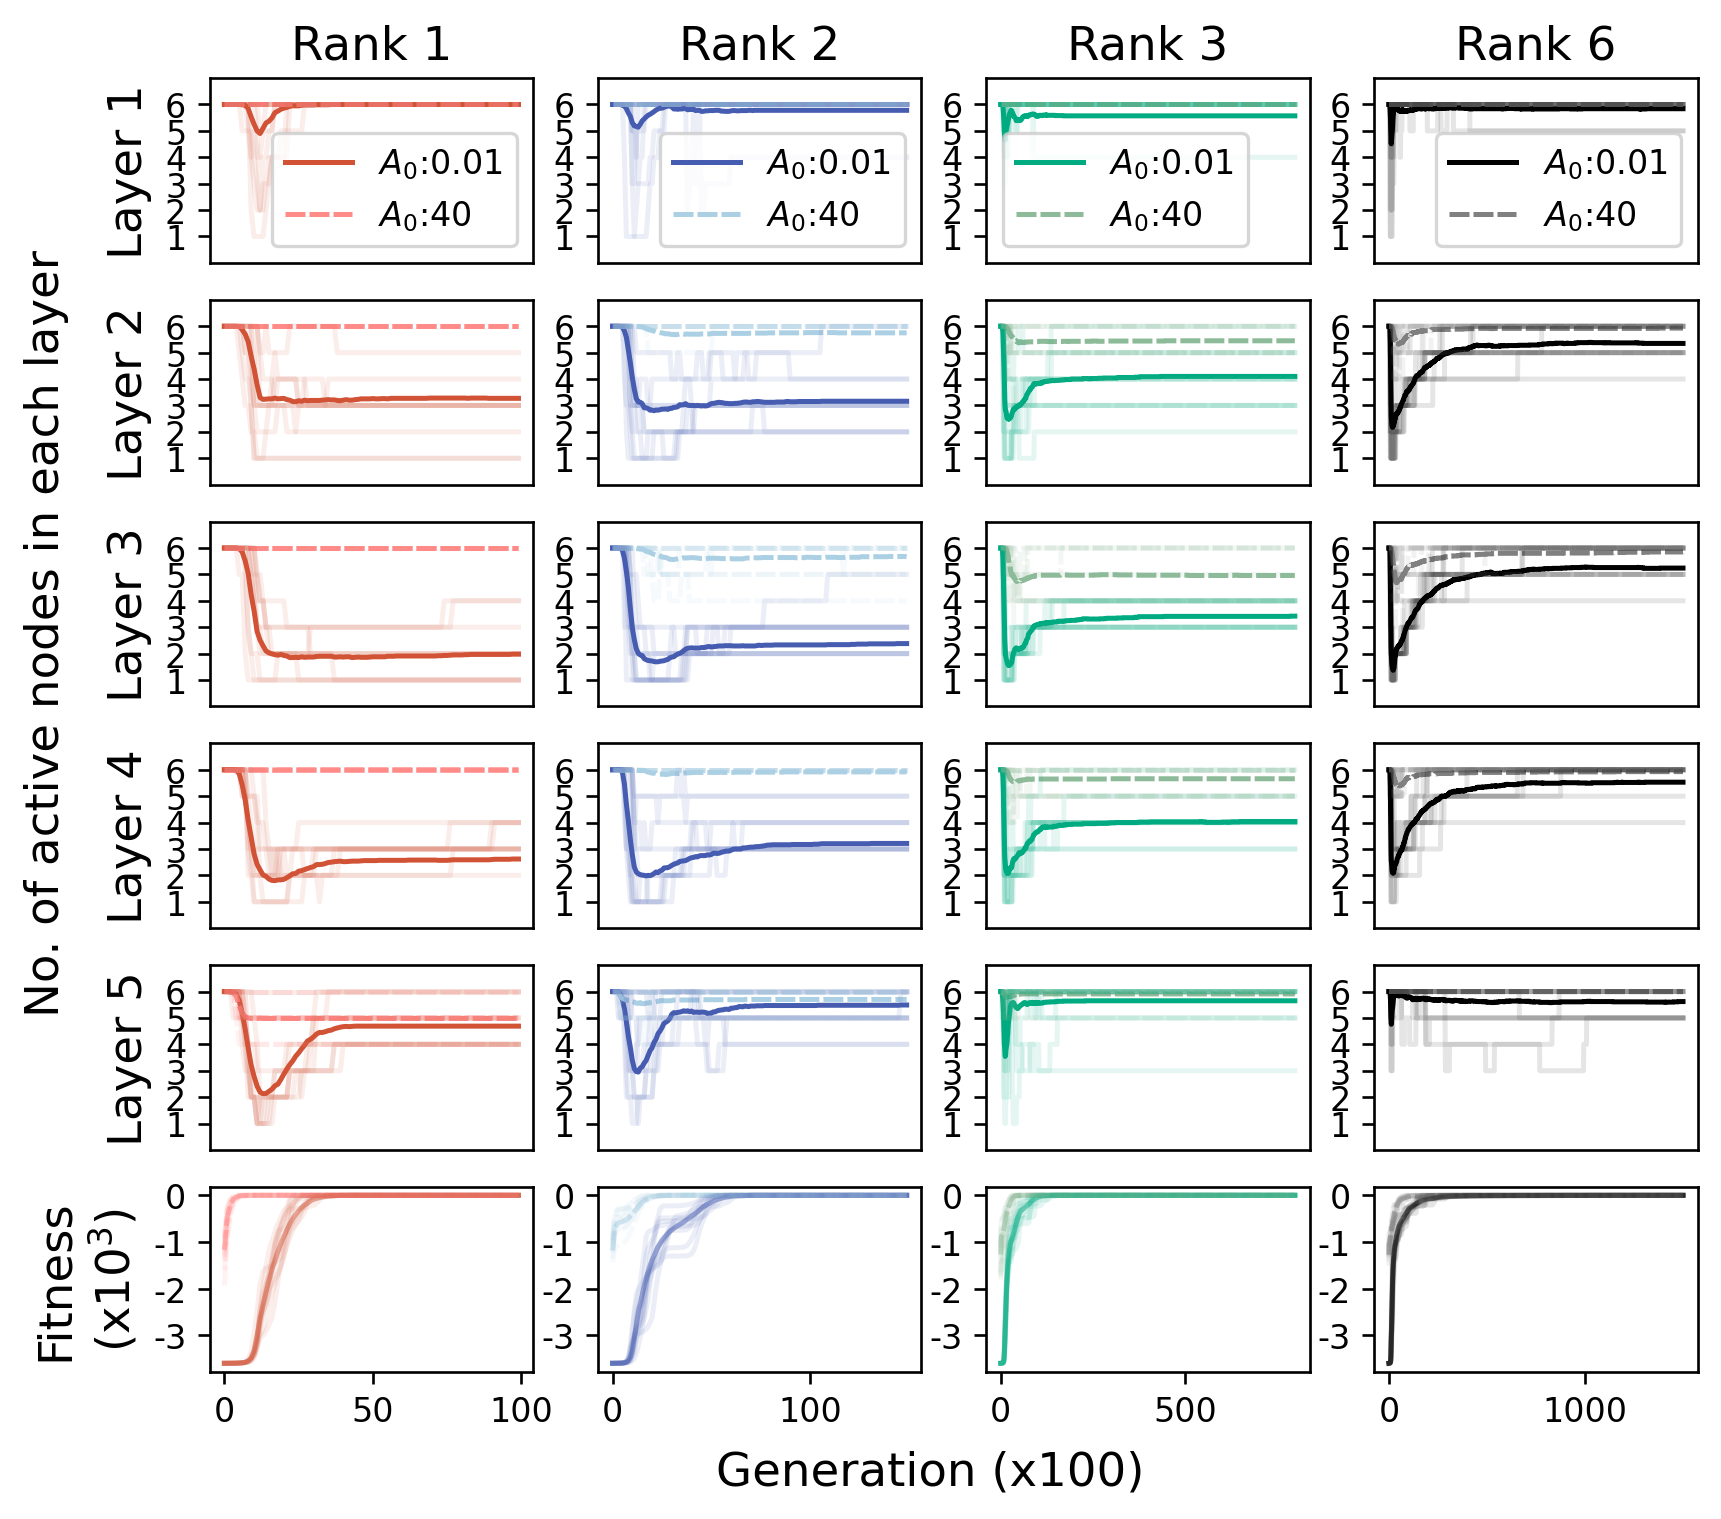

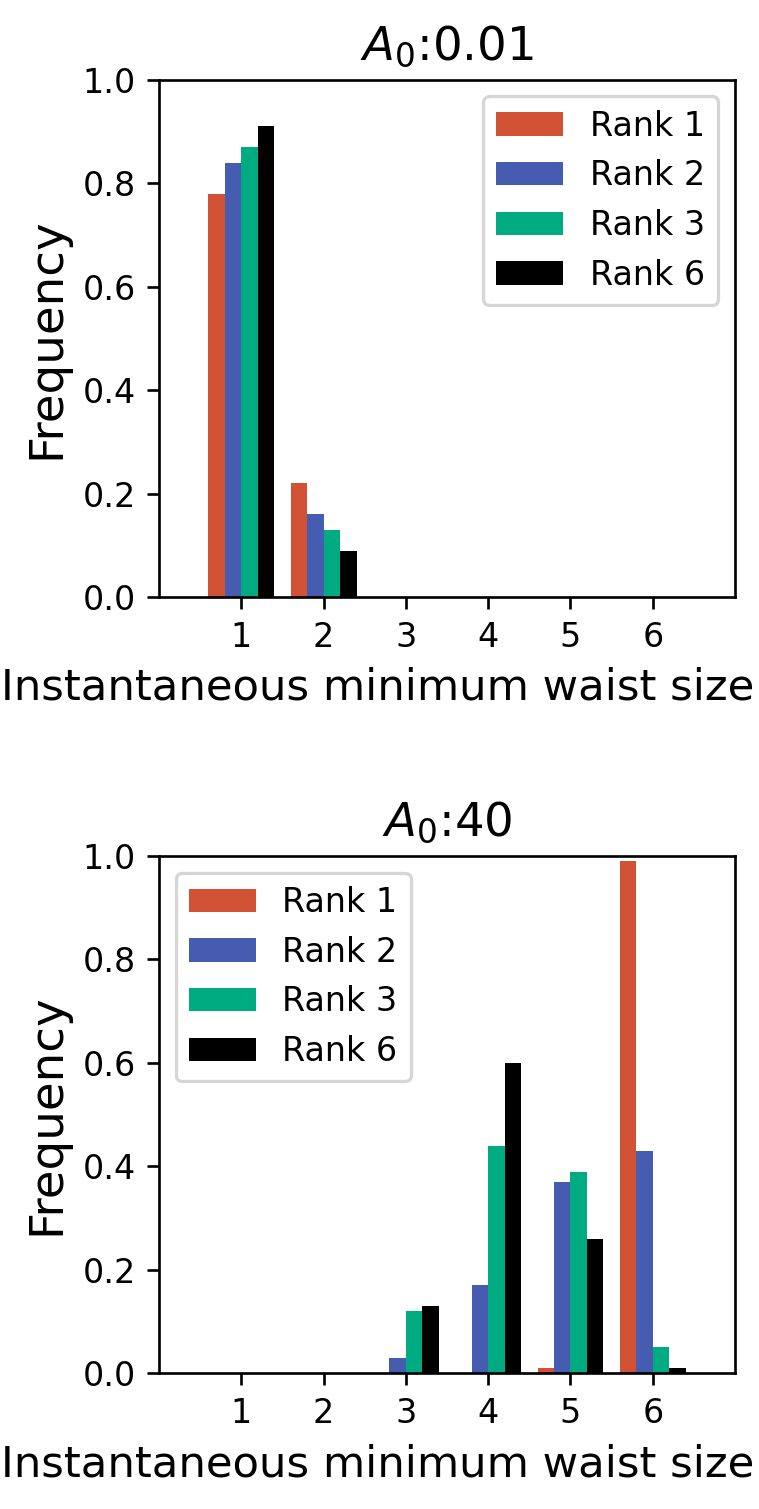

In [23]:
# Time evolution of the number of nodes in each layer 
# Active node  definition: Relative value of maximum interaction from target node
# Goal matrix: Norm normalize


N001R1 = np.load("AlternativeDef2_cd/EvolTrajectoryA001_R1_AN2.npy")
N001R2 = np.load("AlternativeDef2_cd/EvolTrajectoryA001_R2_AN2.npy")
N001R3 = np.load("AlternativeDef2_cd/EvolTrajectoryA001_R3_AN2.npy")
N001R6 = np.load("AlternativeDef2_cd/EvolTrajectoryA001_R6_AN2.npy")
N40R1 =  np.load("AlternativeDef2_cd/EvolTrajectoryA40_R1_AN2.npy")
N40R2 =  np.load("AlternativeDef2_cd/EvolTrajectoryA40_R2_AN2.npy")
N40R3 =  np.load("AlternativeDef2_cd/EvolTrajectoryA40_R3_AN2.npy")
N40R6 =  np.load("AlternativeDef2_cd/EvolTrajectoryA40_R6_AN2.npy")


N001_active_maxint_data = [N001R1, N001R2, N001R3, N001R6]
N40_active_maxint_data = [N40R1, N40R2, N40R3, N40R6]
c = TimeCourseOfActiveNode(N001_active_maxint_data, N40_active_maxint_data, 6, "")
d = HistogramOfMinimalWaist(N001_active_maxint_data, N40_active_maxint_data, "")
#c.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig6/SuppFig6c.pdf")
#d.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig6/SuppFig6d.pdf")

### SFig 5
- Data directory: SFig5
- Simulation script: `EvolTrajectory.py` (Set raw_mut_rate = 0.1,0.3,0.4,and 0.5)

>  Evolutionary trajectories of the number of nodes in each layer for the network with M = 6. The bottom panel shows the average fitness trajectory. Simulation starts from A_0=0.01 in the solid lines and A_0=40 in the dashed lines. Trajectories are averaged among independent simulation runs (n=100 for each color). The trajectories of 10 independent runs are shown with a paler shade. Goal matrix elements are randomized under the conditions of rank 1 (red), rank 2 (blue), rank 3 (green), and rank 6 (black). The norm ‖G‖_F is normalized to the same value (‖G‖_F = 60). The simulation runs that reach F > -0.01 are used for the analysis. Bow-tie architecture transiently emerges under the mutation rates 0.1, 0.3, 0.4 and 0.5, which is the same result as for the mutation rate 0.2 used in the main text.

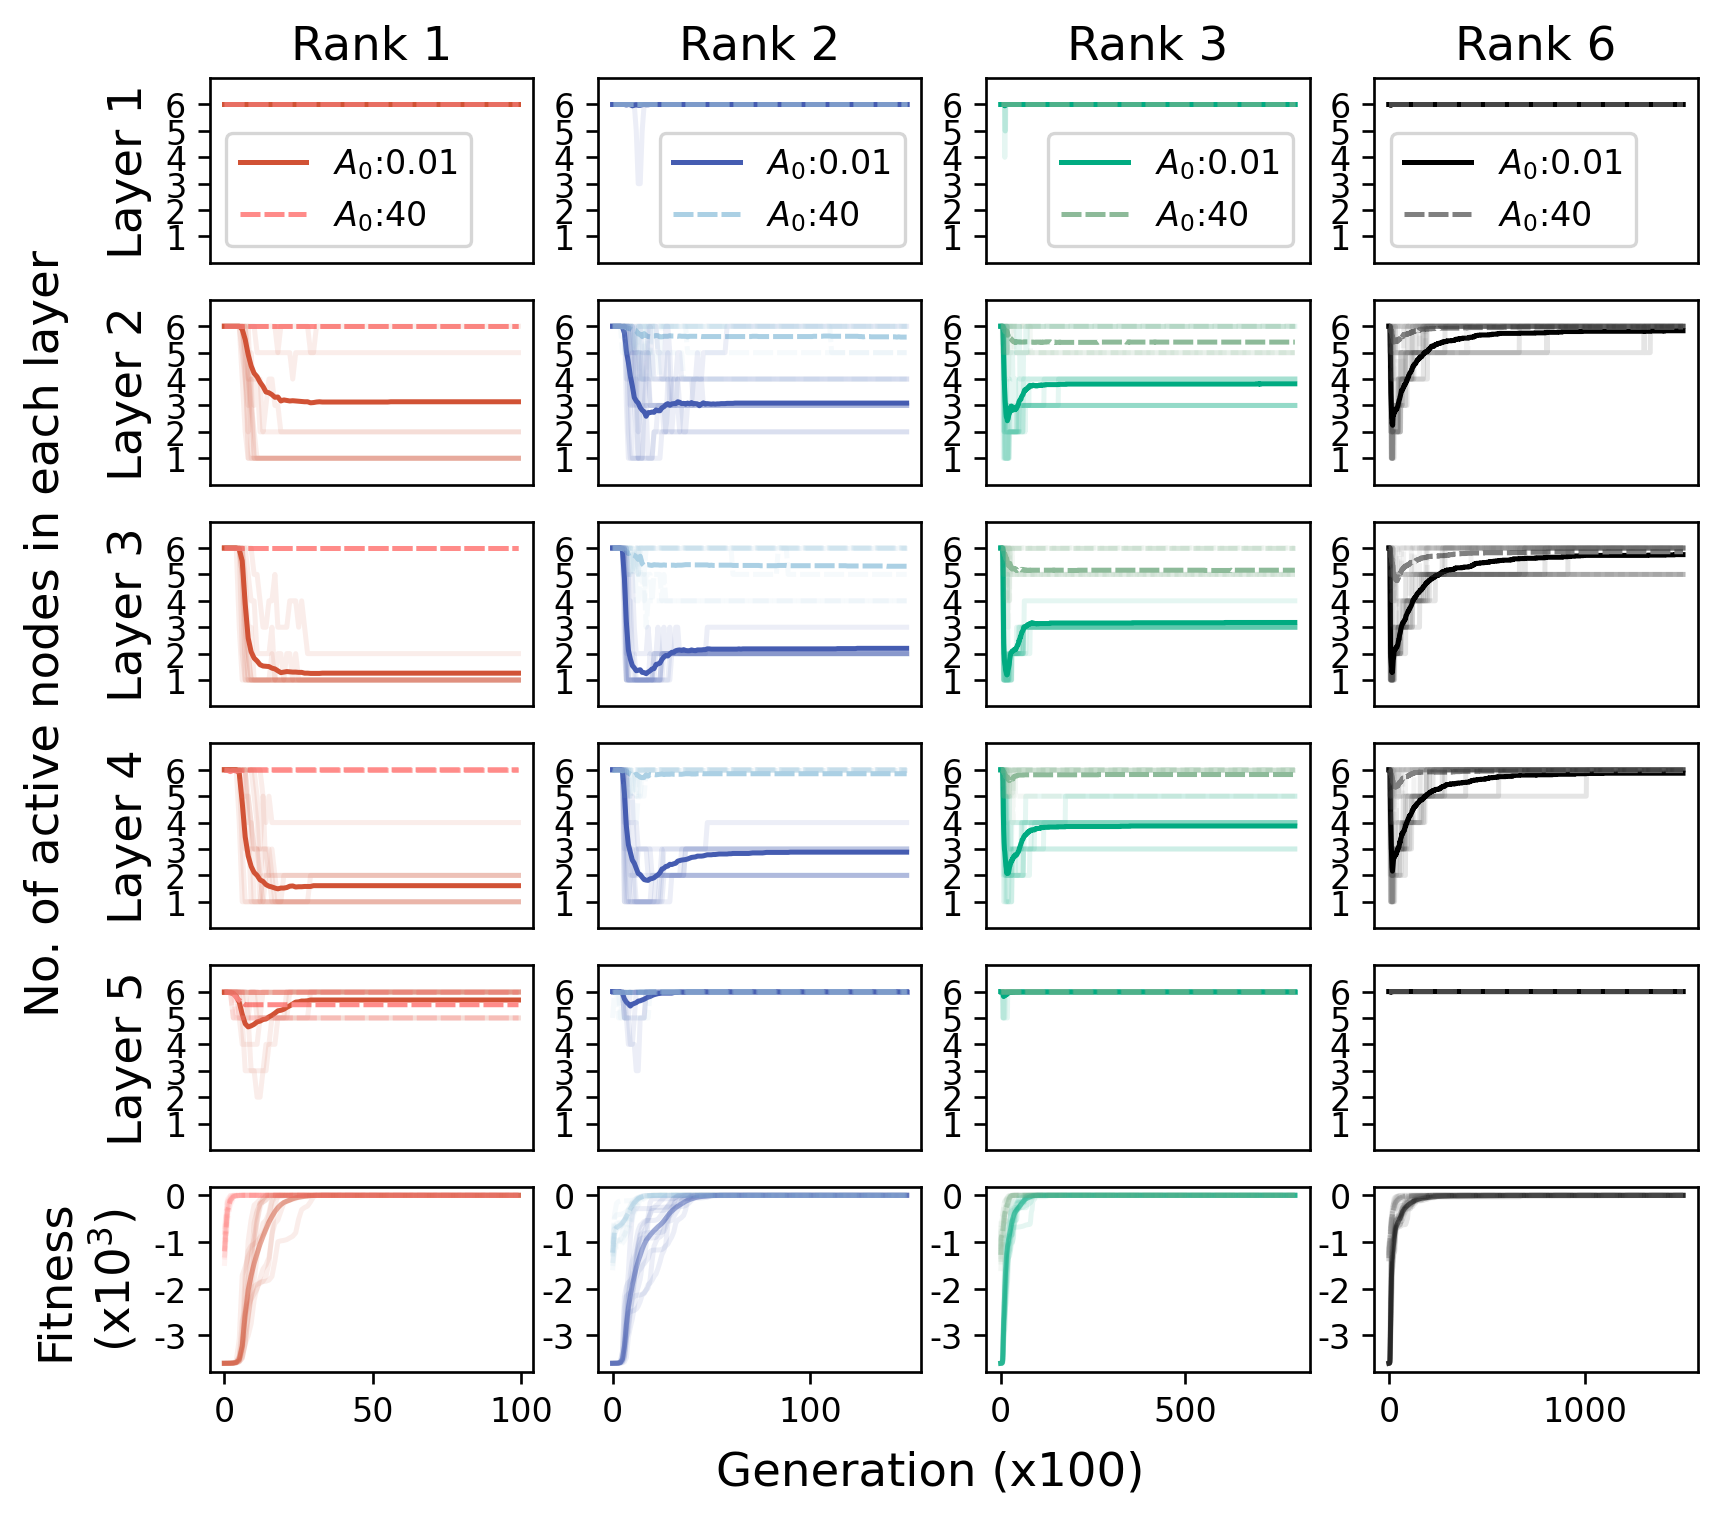

In [29]:
rate = "05" # choose from rate 01,03,04, and 05
N001R1 = np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R1_A001.npy")
N001R2 = np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R2_A001.npy")
N001R3 = np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R3_A001.npy")
N001R6 = np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R6_A001.npy")
N40R1 =  np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R1_A40.npy")
N40R2 =  np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R2_A40.npy")
N40R3 =  np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R3_A40.npy")
N40R6 =  np.load(f"VariousMutationRate/MUT_{rate}/RankDepend_R6_A40.npy")


N001_active_maxint_data = [N001R1, N001R2, N001R3, N001R6]
N40_active_maxint_data = [N40R1, N40R2, N40R3, N40R6]
figc = TimeCourseOfActiveNode(N001_active_maxint_data, N40_active_maxint_data, 6, f"S10_mut_{rate}.pdf")
#figd = HistogramOfMinimalWaist(N001_active_maxint_data, N40_active_maxint_data, f"S10_mut_{rate}.pdf")

#dir = "/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig5" 
#figc.savefig(f"{dir}/S5_mut_tr_{rate}.pdf")
#figd.savefig(f"{dir}/S10_mut_ht_{rate}.pdf")

### SFig7 cd 
- Data directory: VarianceNorm_cd
- Simulation script: `EvolTrajectory.py` (Set GoalMatrixVariance = 1)

>  (C) Evolution trajectories of the number of nodes in each layer for the variance normalized goal. The bottom panel shows average fitness trajectory. Simulation starts from A_0=0.01 in the solid lines and A_0=40 in the dashed lines. Trajectories are averaged among independent simulation runs (n=100 for each color). The trajectories of 10 independent runs are shown in the pale color. (D) Distribution of the instantaneous minimum waist size that the network experienced during evolution (n=100 for each color). Evolution started from small value (A_0=0.01) in the upper and large value in the bottom (A_0=40 )

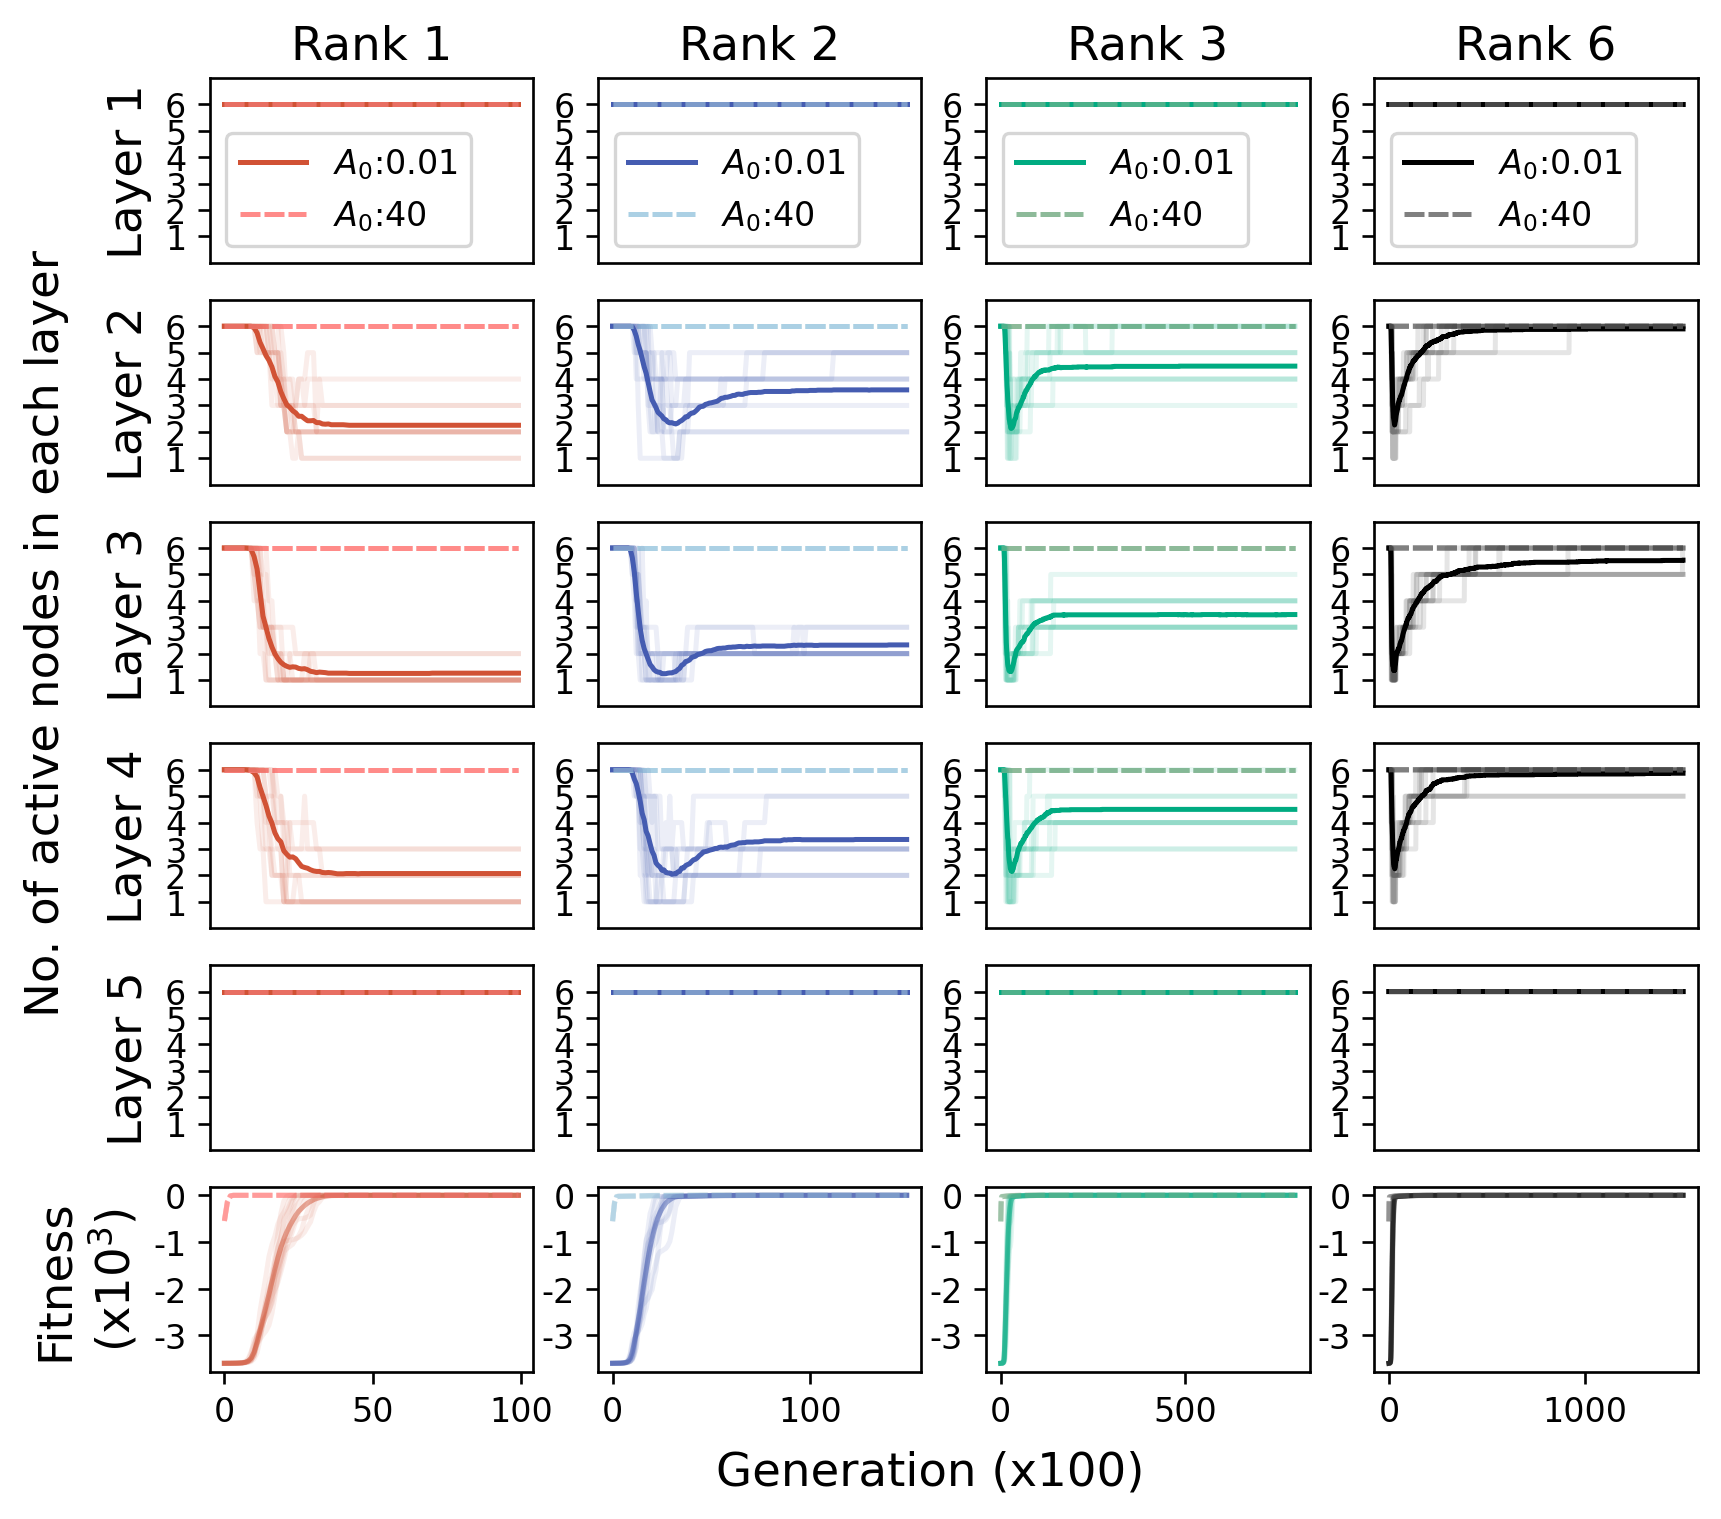

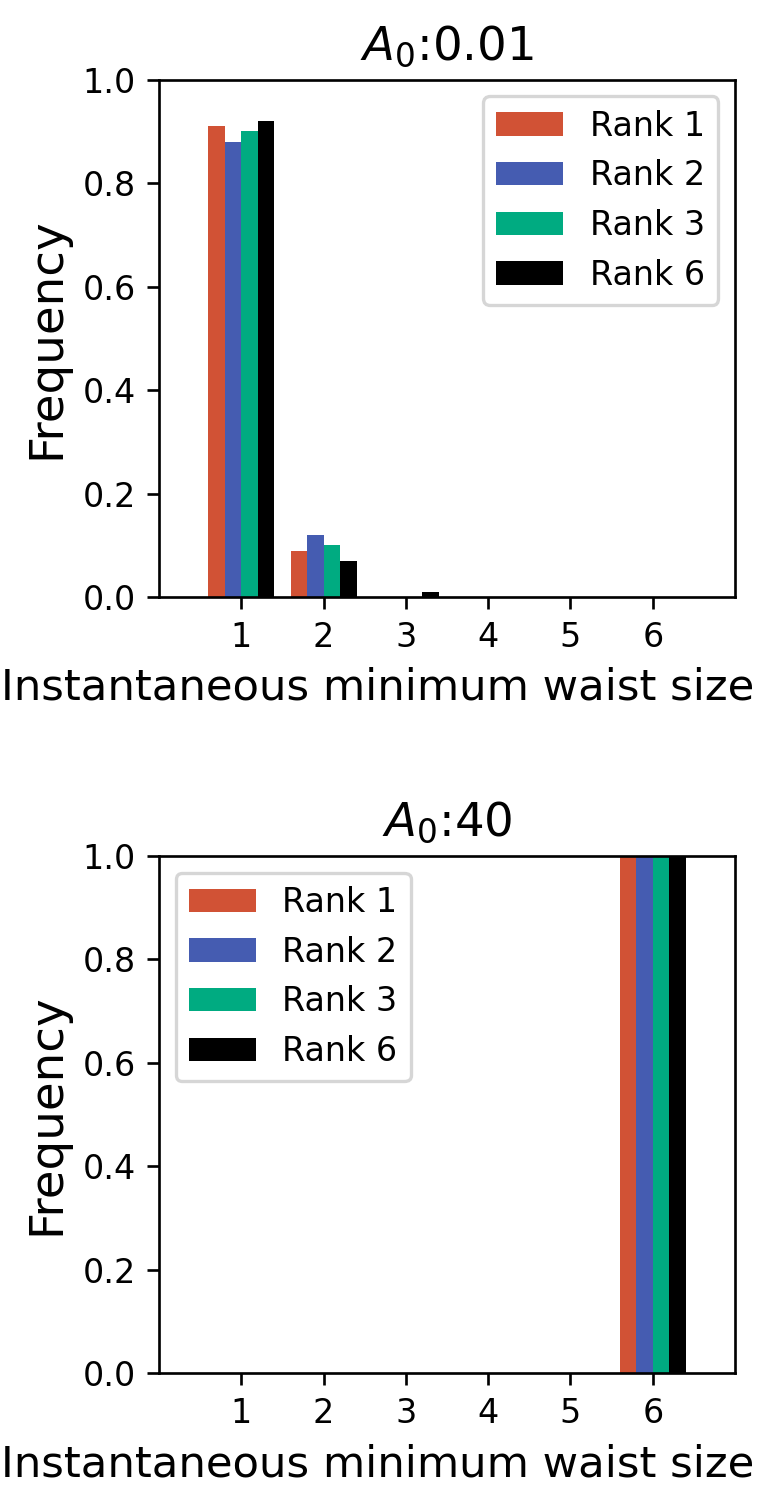

In [30]:
# Time evolution of the number of nodes in each layer
# Active node  definition: Relative contribution to the fitness
# Goal matrix: Norm and variance normalize
N001R1 = np.load("VarianceNorm_cd/EvolTrajectoryA001_R1_VN.npy")
N001R2 = np.load("VarianceNorm_cd/EvolTrajectoryA001_R2_VN.npy")
N001R3 = np.load("VarianceNorm_cd/EvolTrajectoryA001_R3_VN.npy")
N001R6 = np.load("VarianceNorm_cd/EvolTrajectoryA001_R6_VN.npy")
N40R1 =  np.load("VarianceNorm_cd/EvolTrajectoryA40_R1_VN.npy")
N40R2 =  np.load("VarianceNorm_cd/EvolTrajectoryA40_R2_VN.npy")
N40R3 =  np.load("VarianceNorm_cd/EvolTrajectoryA40_R3_VN.npy")
N40R6 =  np.load("VarianceNorm_cd/EvolTrajectoryA40_R6_VN.npy")
N001_data_VN = [N001R1, N001R2, N001R3, N001R6]
N40_data_VN = [N40R1, N40R2, N40R3, N40R6]
c = TimeCourseOfActiveNode(N001_data_VN, N40_data_VN, 6, "")
d = HistogramOfMinimalWaist(N001_data_VN, N40_data_VN, "S")
#c.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig7/SuppFig7c.pdf")
#d.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig7/SuppFig7d.pdf")

### SFig 4  
- Data directory: Node12Network
- Simulation script: `EvolTrajectory.py` (Set nNode = 12)

>  Evolutionary trajectories of the number of nodes in each layer for the network with M = 12. The bottom panel shows average fitness trajectory. Simulation starts from A_0=0.01 in the solid lines and A_0=40 in the dashed lines. Trajectories are averaged among independent simulation runs (n=100 for each color). The trajectories of 10 independent runs are shown in the pale color. Goal matrix elements are randomized under the conditions of rank1 (red),  rank2 (blue), rank3 (green), and rank6 (black). The norm ‖G‖_F is normalized to the same value (‖G‖_F  = 60). The simulation runs that reach F > -0.01 are used for the analysis.

(100, 100, 6)


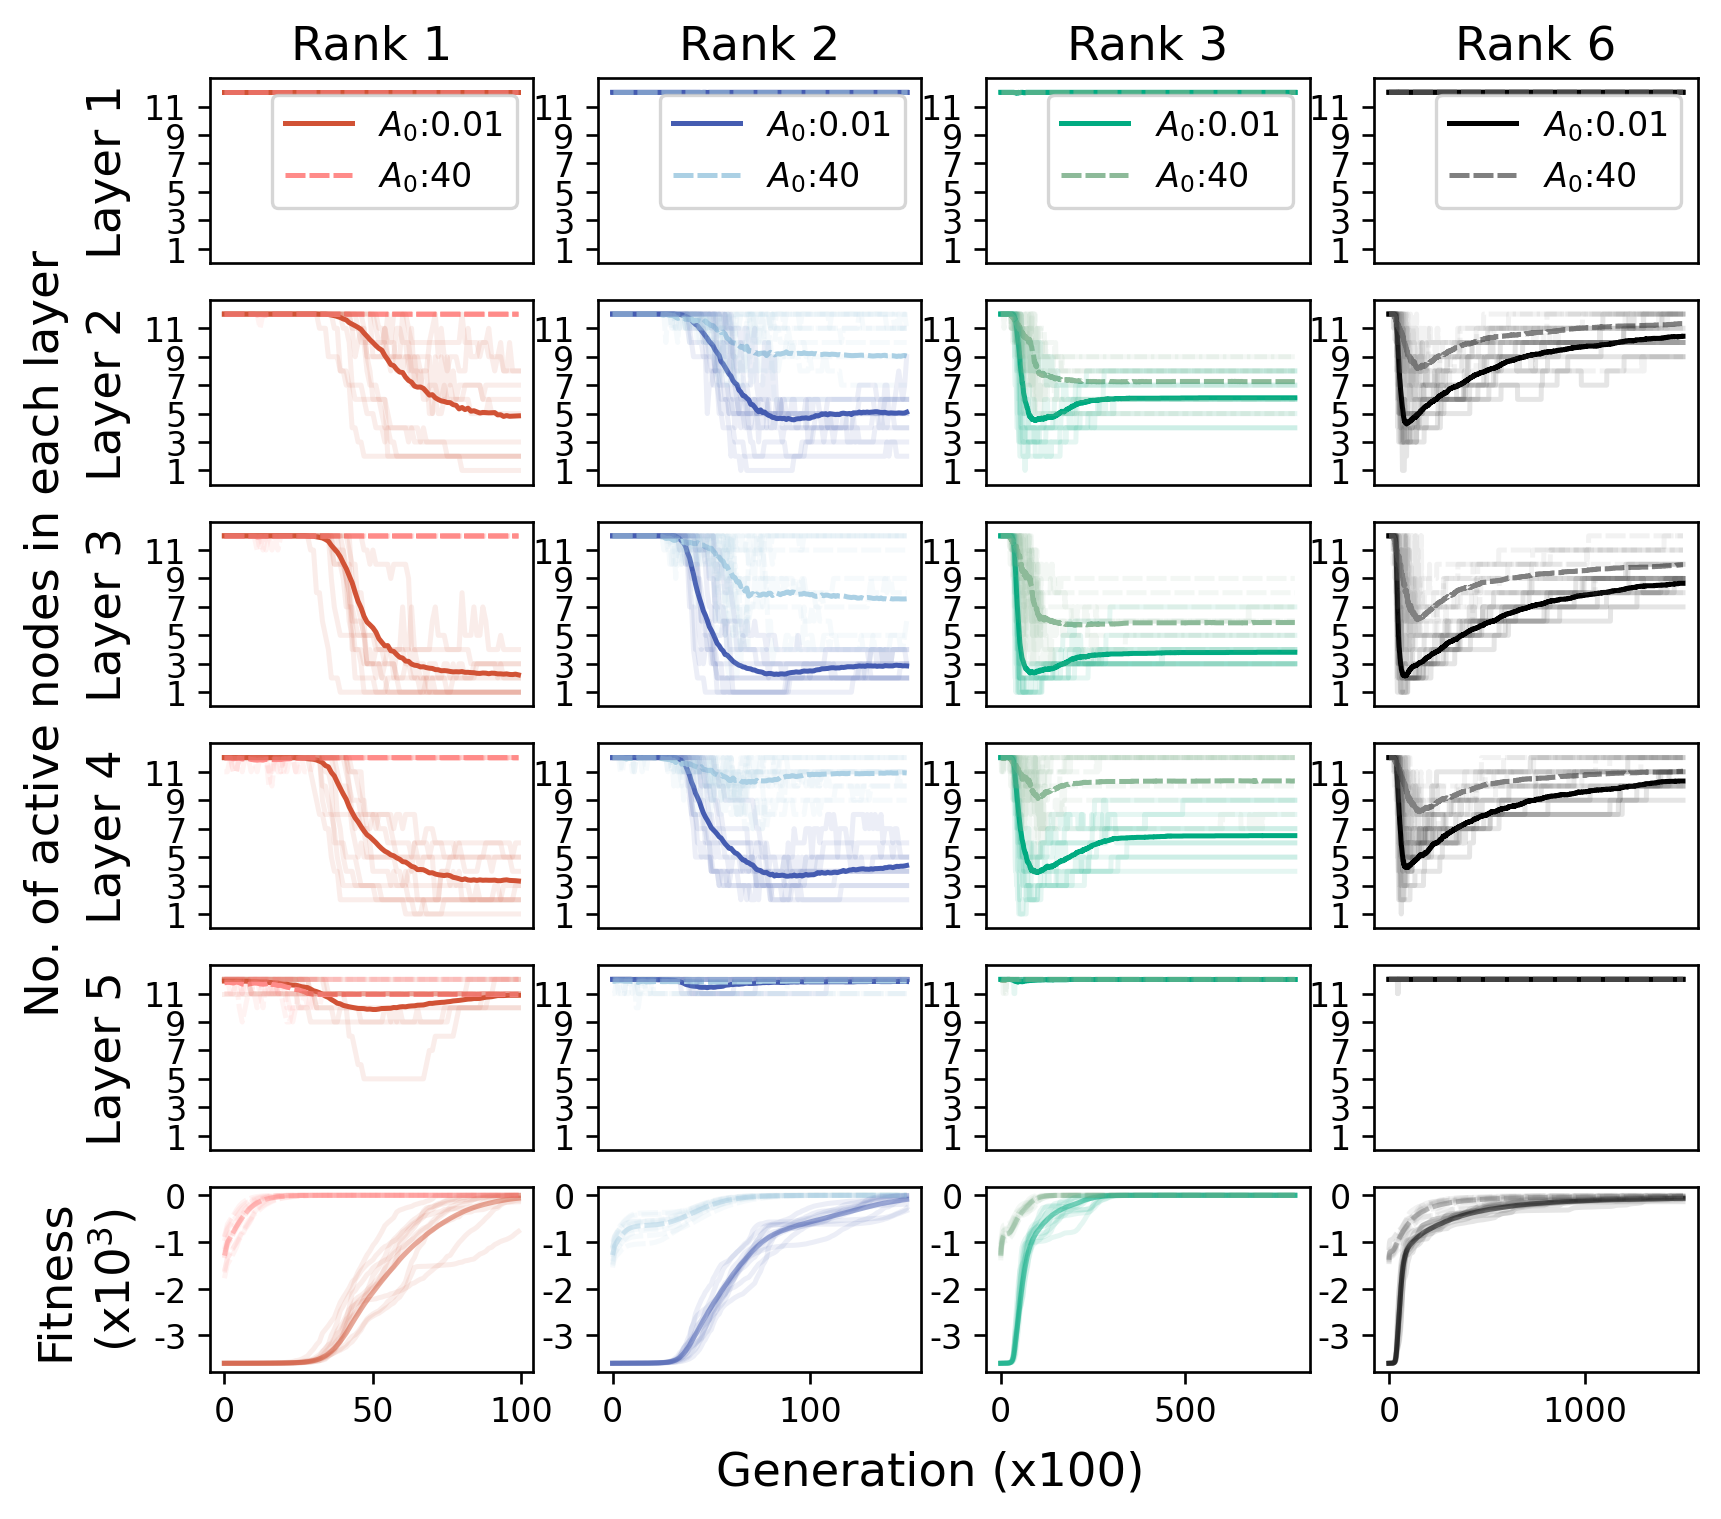

In [24]:
N001R1 = np.load("Node12Network/EvolTrajectoryA001_R1_N12.npy")
N001R2 = np.load("Node12Network/EvolTrajectoryA001_R2_N12.npy")
N001R3 = np.load("Node12Network/EvolTrajectoryA001_R3_N12.npy")
N001R6 = np.load("Node12Network/EvolTrajectoryA001_R6_N12.npy")
N40R1 =  np.load("Node12Network/EvolTrajectoryA40_R1_N12.npy")
N40R2 =  np.load("Node12Network/EvolTrajectoryA40_R2_N12.npy")
N40R3 =  np.load("Node12Network/EvolTrajectoryA40_R3_N12.npy")
N40R6 =  np.load("Node12Network/EvolTrajectoryA40_R6_N12.npy")
print(N001R1.shape)
N001_N12 = [N001R1, N001R2, N001R3, N001R6]
N40_N12 = [N40R1, N40R2, N40R3, N40R6]
fig = TimeCourseOfActiveNode(N001_N12, N40_N12, 12, "S5Fig.tif")
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig4.pdf")

#### Functions for investigating the dependence of bow-tie evolution dynamics on initial value

In [25]:
def evaluation(Ind_network, DesiredGoal):
    z = Total_in_out(Ind_network)
    fitness = -1*np.sum((z - DesiredGoal)**2) #the sum of squares of elements
    return fitness
    
def Total_in_out(Ind):
    z = np.dot(Ind[nMatrix -1], Ind[nMatrix -2])
    for i in range(nMatrix -3, -1, -1):
        z = np.dot(z, Ind[i])
    return z

def Deleted_fitness(Ind,  DesiredGoal, node, layer):    
    modified_network =  Ind.copy()
    Input_link_layer = layer - 1
    Output_link_layer = layer
    if layer == 0: #Eliminate input layer
        modified_network[Output_link_layer][:,node] = 0  #eliminate output
    elif layer == nLayer-1: #Eliminate output layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input
    else: #Eliminate intermidiate layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input from 
        modified_network[Output_link_layer][:,node] = 0
    orig_network = Ind.copy()
    
    #fitness dependent active node
    orig_fit = evaluation(orig_network, DesiredGoal)
    modi_fit = evaluation(modified_network, DesiredGoal)
    relative_fitness = abs(orig_fit-modi_fit)
    return(relative_fitness)

def Deleted_totalinout(Ind, node, layer):
    modified_network = Ind.copy()
    Input_link_layer = layer - 1
    Output_link_layer = layer
    if layer == 0: #Eliminate input layer
        modified_network[Output_link_layer][:,node] = 0  #eliminate output
    elif layer == nLayer-1: #Eliminate output layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input
    else: #Eliminate intermidiate layer
        modified_network[Input_link_layer][node,] = 0   #eliminate input from 
        modified_network[Output_link_layer][:,node] = 0
    diff = Total_in_out(Ind.copy()) - Total_in_out(modified_network)
    relative_fitness = np.sum(diff**2)  
    return(relative_fitness)


def Relative_fitness_in_layer(Ind,  DesiredGoal, layer, mode):
    relative_fitness = [(Deleted_fitness(Ind, DesiredGoal, node, layer)) for node in range(nNode)]
    #relative_fitness = [(Deleted_totalinout(Ind, DesiredGoal, node, layer)) for node in range(nNode)]
    relative_fitness_in_layer = relative_fitness/sum(relative_fitness)
    active_node_test = np.where(relative_fitness_in_layer > 0.001,  1, 0)
    #active_node_test = np.where(relative_fitness_in_layer > 0.05,  1, 0)
    if mode == "result":
        return(sum(active_node_test))
    elif mode == "test":
        return(active_node_test)

def Active_node(Ind, DesiredGoal, mode):
    active_node_list = [Relative_fitness_in_layer(Ind,DesiredGoal, layer, mode) for layer in range(nLayer)]
    return(active_node_list)

def evaluation(Ind_network, DesiredGoal):
    z = Total_in_out(Ind_network)
    fitness = -1*np.sum((z - DesiredGoal)**2) 
    return fitness

def Total_in_out(Ind):
    z = np.dot(Ind[nMatrix -1], Ind[nMatrix -2])
    for i in range(nMatrix -3, -1, -1):
        z = np.dot(z, Ind[i])
    return z

def BowTieJudge(network, DesiredGoal, mode):
    if nNode != 6: raise ValueError("node must be 6")
    if mode == "strict":
        if Active_node(network,DesiredGoal, 'result')[2] == 1:
            return 1
        else:
            return 0
    elif mode == "loose":
        if Active_node(network, DesiredGoal, 'result')[2] <= 5:
            return 1
        else:
            return 0
    else: raise ValueErorr("Specify strict or loose mode")
        
def ProbCalculate(network_set, goal_set, mode):
    #Exclude non adapted networks
    #adapted_networks = [network for network in replicate_set if np.sum(np.isnan(network)) == 0]
    num = len(network_set)
    problist = [BowTieJudge(network_set[replicate_id], goal_set[replicate_id], mode) for replicate_id in range(num)]
    return sum(problist)/num


def ExcludeNonValidRun(sample_sets, goal_sets):
    nan_index = [i for i in range(100) if np.sum(np.isnan(sample_sets[i]))==1]
    valid_networks = np.delete(sample_sets, nan_index)
    valid_goal_sets = np.delete(goal_sets, nan_index)
    return valid_networks, valid_goal_sets

### SFig3 a
- Data directory: DynamicsInitDepend
- Simulation script: `DynamicsInitDependency.py`
- Note: This cell takes few minutes to complete
>(A) Bow-tie emergence probability. Y axis shows the probabilities of bowtie emergence P_1 and P_(≤5), where P_1  denotes the probability that the number of active nodes in the 3rd layer (the waist) is one, and P_(≤5) represents the probability that the number of active nodes in the 3rd layer (the waist) is less than or equal to five (the sample size: n=100). Note that only results with rank 1 goal is shown for P_1 and those with the rank1 - 3 goals are shown for P_(≤5) since the probabilities for other ranks show almost constantly zero due to the fact that the waist size cannot be smaller than the goal rank in the steady state.

In [26]:
Rid6R1 = np.load("DynamicsInitDepend/DynamInitDepend_R1_END.npy", allow_pickle=True)
Rid6R2 = np.load("DynamicsInitDepend/DynamInitDepend_R2_END.npy", allow_pickle=True)
Rid6R3 = np.load("DynamicsInitDepend/DynamInitDepend_R3_END.npy", allow_pickle=True)

Rid6R1Goal = np.load("DynamicsInitDepend/DynamInitDepend_R1_Goal.npy", allow_pickle=True)
Rid6R2Goal = np.load("DynamicsInitDepend/DynamInitDepend_R2_Goal.npy", allow_pickle=True)
Rid6R3Goal = np.load("DynamicsInitDepend/DynamInitDepend_R3_Goal.npy", allow_pickle=True)

RidData = [Rid6R1, Rid6R2, Rid6R3]
RidGoal = [Rid6R1Goal, Rid6R2Goal, Rid6R3Goal]

nMatrix = 4
nLayer = 5
nNode = 6

initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]

prob_strict = list()
prob_loose = list()
for rank_id in range(len(RidData)):
    rank_prob_strict = list()
    rank_prob_loose = list()
    for initvalueid in range(len(initvalue)):
        net,goal = ExcludeNonValidRun(RidData[rank_id][initvalueid], RidGoal[rank_id][initvalueid])
        rank_prob_strict.append(ProbCalculate(net, goal, "strict"))
        rank_prob_loose.append(ProbCalculate(net, goal, "loose"))
    prob_strict.append(rank_prob_strict)
    prob_loose.append(rank_prob_loose)
print(prob_strict)

[[0.69, 0.47, 0.15, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


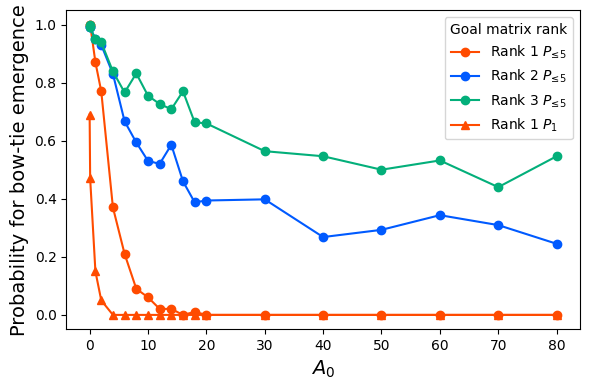

In [27]:
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]      # 各プロットの色
labels_S = ["Rank 1 $P_1$","Rank 2 $P_1$", "Rank 3 $P_1$", "Rank 6 $P_1$"]   # 各ラベル
labels_L = ["Rank 1 $P_{≤5}$","Rank 2 $P_{≤5}$", "Rank 3 $P_{≤5}$", "Rank 6 $P_{≤5}$"]   # 各ラベル
plt.figure(figsize=(6,4), facecolor="white")
[plt.plot(initvalue, prob_loose[i], color=colors[i],label=labels_L[i], marker="o", alpha=1) for i in range(3)]
plt.plot(initvalue, prob_strict[0],color=colors[0], label=labels_S[0], marker="^",alpha=1)
plt.xlabel('$A_{0}$',size=14)  # x軸ラベル
plt.ylabel('Probability for bow-tie emergence',size=14)  # y軸ラベル
#plt.xlim(-1, 21)
plt.legend(loc=1, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig3a.pdf")

### SFig3 b
- Data directory: DynamicsInitDepend
- Simulation script:`GA_GeneralDependency.py`
- Note: This cell takes few minutes to complete.
>(B) Instantaneous minimum waist size. Y axis shows the instantaneous minimum waist size. Each dot represents average among 100 runs. Inset shows the magnification of the range A_0  = 0 - 10.

##### This step takes ~10 min.

In [28]:
initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
nMatrix = 4
nLayer = 5
nNode = 6

Rid6R1 = np.load("DynamicsInitDepend/DynamInitDepend_R1_INIT.npy", allow_pickle=True)
Rid6R2 = np.load("DynamicsInitDepend/DynamInitDepend_R2_INIT.npy", allow_pickle=True)
Rid6R3 = np.load("DynamicsInitDepend/DynamInitDepend_R3_INIT.npy", allow_pickle=True)
Rid6R6 = np.load("DynamicsInitDepend/DynamInitDepend_R6_INIT.npy", allow_pickle=True)

Rid6R1Goal = np.load("DynamicsInitDepend/DynamInitDepend_R1_GOAL.npy", allow_pickle=True)
Rid6R2Goal = np.load("DynamicsInitDepend/DynamInitDepend_R2_GOAL.npy", allow_pickle=True)
Rid6R3Goal = np.load("DynamicsInitDepend/DynamInitDepend_R3_GOAL.npy", allow_pickle=True)
Rid6R6Goal = np.load("DynamicsInitDepend/DynamInitDepend_R6_GOAL.npy", allow_pickle=True)


Rid6Initdata = [Rid6R1, Rid6R2, Rid6R3, Rid6R6]
RidGoal = [Rid6R1Goal, Rid6R2Goal, Rid6R3Goal, Rid6R6Goal]



def CalcMeanMinWaist(valid_init_sample_sets, valid_goal_sets):
    min_waist_in_each_run = [min(
        [Active_node(valid_init_sample_sets[run_id][time], valid_goal_sets[run_id], mode="result")[2] 
             for time in range(len(valid_init_sample_sets[run_id]))]) 
        for run_id in range(len(valid_init_sample_sets))] 
    replicate_mean_of_min_waist = np.mean(min_waist_in_each_run)
    replicate_std_of_min_waist = np.std(min_waist_in_each_run)
    return replicate_mean_of_min_waist, replicate_std_of_min_waist
        
result_list = [[[[] for _ in range(2)] for _ in range(len(initvalue))] for _ in range(len(Rid6Initdata))]

for rank_id in range(4):
    print("========= rank id: {} ===========".format(rank_id))
    for initial_value_id in range(len(initvalue)):#range(19):
        rank_data = Rid6Initdata[rank_id]
        goal_data = RidGoal[rank_id]
        valid_init_sample, valid_goal_sets = ExcludeNonValidRun(rank_data[initial_value_id],  goal_data[initial_value_id])
        mean, std = CalcMeanMinWaist(valid_init_sample, valid_goal_sets)
        result_list[rank_id][initial_value_id][0] = mean
        result_list[rank_id][initial_value_id][1] = std
        print("mean: {}, std: {}".format(mean, std))


========= rank id: 0 ===========
mean: 1.25, std: 0.5361902647381804
mean: 1.7, std: 0.8306623862918074
mean: 3.09, std: 1.4906039044628858
mean: 3.95, std: 1.4168627315304754
mean: 5.14, std: 1.0101485039339513
mean: 5.56, std: 0.6681317235396027
mean: 5.76, std: 0.49234134500364685
mean: 5.878787878787879, std: 0.35598000377184036
mean: 5.875, std: 0.36084391824351614
mean: 5.917525773195877, std: 0.3103075658410807
mean: 5.854166666666667, std: 0.40771637064126925
mean: 5.9375, std: 0.2818281095514309
mean: 5.98, std: 0.13999999999999999
mean: 5.956989247311828, std: 0.20288131466788398
mean: 5.989473684210527, std: 0.1020564180508701
mean: 5.96969696969697, std: 0.17141982574219336
mean: 5.928571428571429, std: 0.2575393768188564
mean: 5.979381443298969, std: 0.14210359538237347
mean: 5.94, std: 0.23748684174075832
========= rank id: 1 ===========
mean: 1.3775510204081634, std: 0.692751186632395
mean: 1.45, std: 0.7123903424387504
mean: 2.5555555555555554, std: 0.9971902164189443
m

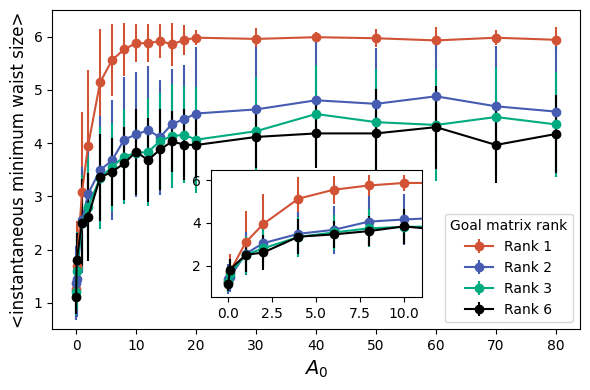

In [29]:
colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
labels = ["Rank 1","Rank 2", "Rank 3", "Rank 6"]   # 各ラベル
#plt.grid(alpha=0.2)            # 罫線
#plt.figure(figsize=(6,4), facecolor="white")
fig, ax = plt.subplots(figsize=(6, 4), facecolor="white")
#axins = ax.inset_axes([0.55, 0.48, 0.4, 0.4])
result_list = np.array(result_list)
axins = ax.inset_axes([0.3, 0.1, 0.4, 0.4])
for rank_id in range(4):
    ax.errorbar(initvalue, result_list[rank_id][:,0], 
                 yerr=result_list[rank_id][:,1], color=colors[rank_id], 
                 label=labels[rank_id], alpha=1, marker="o")
    #plt.scatter(initvalue, GPR.loc[:, "waistmean"], color=colors[i], alpha=0.5)
    
    axins.errorbar(initvalue, result_list[rank_id][:,0], 
                 yerr=result_list[rank_id][:,1], color=colors[rank_id], 
                label=labels[rank_id], alpha=1, marker="o")
    

ax.set_xlabel('$A_{0}$',size=14)  # x軸ラベル
#ax.set_ylabel('Mean no. of active nodes in waist',size=14)  # y軸ラベル
ax.set_ylabel('<instantaneous minimum waist size>',size=12)  # y軸ラベル
ax.set_ylim(0.5,6.5)
axins.set_ylim(0.5,6.5)
axins.set_xlim(-1,11)
ax.legend(loc=4, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig3b.pdf")

### SFig 7B
- Data directory: VarianceNorm_be
- Simulation script: `DynamicsInitDependency.py` (Set GoalMatrixVariance = 1)
> (B) The probabilities of bowtie emergence when the variance in goal matrix elements is normalized.  P_1  denotes the probability that the number of active nodes in the 3rd layer (the waist) is one, and P_(≤5) represents the probability that the number of active nodes in the 3rd layer (the waist) is less than or equal to five.

In [30]:
nNode = 6
Rid6R1 = np.load("VarianceNorm_be/DynamInitDepend_R1_END.npy", allow_pickle=True)
Rid6R2 = np.load("VarianceNorm_be/DynamInitDepend_R2_END.npy", allow_pickle=True)
Rid6R3 = np.load("VarianceNorm_be/DynamInitDepend_R3_END.npy", allow_pickle=True)

DummyGoal = [np.zeros([nNode, nNode]) for _ in range(100)]

RidData = [Rid6R1, Rid6R2, Rid6R3]

def Relative_fitness_in_layer(Ind,  DesiredGoal, layer, mode):
    #relative_fitness = [(Deleted_fitness(Ind, DesiredGoal, node, layer)) for node in range(nNode)]
    relative_fitness = [(Deleted_totalinout(Ind, node, layer)) for node in range(nNode)]
    relative_fitness_in_layer = relative_fitness/sum(relative_fitness)
    active_node_test = np.where(relative_fitness_in_layer > 0.001,  1, 0)
    #active_node_test = np.where(relative_fitness_in_layer > 0.05,  1, 0)
    if mode == "result":
        return(sum(active_node_test))
    elif mode == "test":
        return(active_node_test)
    

nMatrix = 4
nLayer = 5
nNode = 6

initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]

prob_strict = list()
prob_loose = list()
for rank_id in range(len(RidData)):
    rank_prob_strict = list()
    rank_prob_loose = list()
    for initvalueid in range(len(initvalue)):
        net, dummy  = ExcludeNonValidRun(RidData[rank_id][initvalueid], DummyGoal)
        rank_prob_strict.append(ProbCalculate(net, dummy, "strict"))
        rank_prob_loose.append(ProbCalculate(net,dummy , "loose"))
    prob_strict.append(rank_prob_strict)
    prob_loose.append(rank_prob_loose)
print(prob_strict)

[[0.91, 0.73, 0.3, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


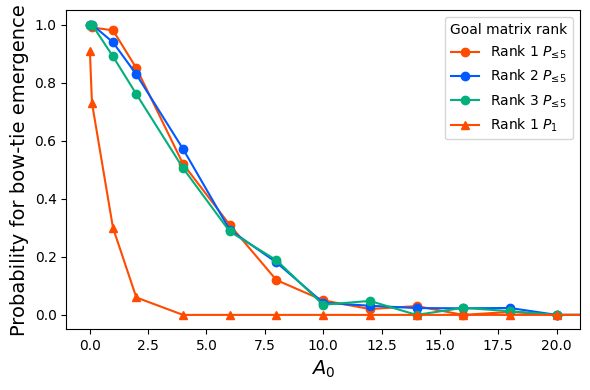

In [31]:
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]      # 各プロットの色
labels_S = ["Rank 1 $P_1$","Rank 2 $P_1$", "Rank 3 $P_1$", "Rank 6 $P_1$"]   # 各ラベル
labels_L = ["Rank 1 $P_{≤5}$","Rank 2 $P_{≤5}$", "Rank 3 $P_{≤5}$", "Rank 6 $P_{≤5}$"]   # 各ラベル
plt.figure(figsize=(6,4), facecolor="white")
[plt.plot(initvalue, prob_loose[i], color=colors[i],label=labels_L[i], marker="o", alpha=1) for i in range(3)]
plt.plot(initvalue, prob_strict[0],color=colors[0], label=labels_S[0], marker="^",alpha=1)
plt.xlabel('$A_{0}$',size=14)  # x軸ラベル
plt.ylabel('Probability for bow-tie emergence',size=14)  # y軸ラベル
plt.xlim(-1, 21)
plt.legend(loc=1, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定]]]
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig7/SuppFig7b.pdf")

### SFig7E
- Data directory: VarianceNorm_be
- Simulation script: `GA_GeneralDependency.py` (Set GoalMatrixVariance = 1)
> (B) The probabilities of bowtie emergence when the variance in goal matrix elements is normalized.  P_1  denotes the probability that the number of active nodes in the 3rd layer (the waist) is one, and P_(≤5) represents the probability that the number of active nodes in the 3rd layer (the waist) is less than or equal to five.

In [41]:
initvalue = [0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80]
nMatrix = 4
nLayer = 5
nNode = 6


Rid6R1 = np.load("S4FigBE/DynamInitDepend_R1_INIT.npy", allow_pickle=True)
Rid6R2 = np.load("S4FigBE/DynamInitDepend_R2_INIT.npy", allow_pickle=True)
Rid6R3 = np.load("S4FigBE/DynamInitDepend_R3_INIT.npy", allow_pickle=True)
Rid6R6 = np.load("S4FigBE/DynamInitDepend_R6_INIT.npy", allow_pickle=True)

DummyGoal = [np.zeros([nNode, nNode]) for _ in range(100)]
Rid6Initdata = [Rid6R1, Rid6R2, Rid6R3, Rid6R6]


def Relative_fitness_in_layer(Ind,  DesiredGoal, layer, mode):
    #relative_fitness = [(Deleted_fitness(Ind, DesiredGoal, node, layer)) for node in range(nNode)]
    relative_fitness = [(Deleted_totalinout(Ind, node, layer)) for node in range(nNode)]
    relative_fitness_in_layer = relative_fitness/sum(relative_fitness)
    active_node_test = np.where(relative_fitness_in_layer > 0.001,  1, 0)
    #active_node_test = np.where(relative_fitness_in_layer > 0.05,  1, 0)
    if mode == "result":
        return(sum(active_node_test))
    elif mode == "test":
        return(active_node_test)
    

def CalcMeanMinWaist(valid_init_sample_sets, valid_goal_sets):
    min_waist_in_each_run = [min(
        [Active_node(valid_init_sample_sets[run_id][time], valid_goal_sets[run_id], mode="result")[2] 
             for time in range(len(valid_init_sample_sets[run_id]))]) 
        for run_id in range(len(valid_init_sample_sets))] 
    replicate_mean_of_min_waist = np.mean(min_waist_in_each_run)
    replicate_std_of_min_waist = np.std(min_waist_in_each_run)
    return replicate_mean_of_min_waist, replicate_std_of_min_waist
        
result_list = [[[[] for _ in range(2)] for _ in range(len(initvalue))] for _ in range(len(Rid6Initdata))]

for rank_id in range(4):
    print("========= rank id: {} ===========".format(rank_id))
    for initial_value_id in range(len(initvalue)):#range(19):
        rank_data = Rid6Initdata[rank_id]
        goal_data = RidGoal[rank_id]
        valid_init_sample, valid_goal_sets = ExcludeNonValidRun(rank_data[initial_value_id], DummyGoal)
        mean, std = CalcMeanMinWaist(valid_init_sample, valid_goal_sets)
        result_list[rank_id][initial_value_id][0] = mean
        result_list[rank_id][initial_value_id][1] = std
        print("mean: {}, std: {}".format(mean, std))


========= rank id: 0 ===========
mean: 1.06, std: 0.27640549922170504
mean: 1.26, std: 0.5936328831862332
mean: 2.24, std: 1.209297316626478
mean: 3.28, std: 1.4218298069740978
mean: 4.87, std: 1.1283173312503891
mean: 5.43, std: 0.7383088784512889
mean: 5.75, std: 0.49749371855331
mean: 5.87, std: 0.33630343441600474
mean: 5.959595959595959, std: 0.19690493625876695
mean: 5.959595959595959, std: 0.19690493625876695
mean: 5.979591836734694, std: 0.14139190265868387
mean: 5.979381443298969, std: 0.14210359538237344
mean: 5.989473684210527, std: 0.1020564180508701
mean: 6.0, std: 0.0
mean: 6.0, std: 0.0
mean: 6.0, std: 0.0
mean: 6.0, std: 0.0
mean: 6.0, std: 0.0
mean: 6.0, std: 0.0
========= rank id: 1 ===========
mean: 1.18, std: 0.43312815655415426
mean: 1.26, std: 0.5023942674832188
mean: 2.3877551020408165, std: 1.3064412876146303
mean: 3.323232323232323, std: 1.285728051647623
mean: 4.581632653061225, std: 1.2282679806960553
mean: 5.333333333333333, std: 0.8040302522073697
mean: 5.6

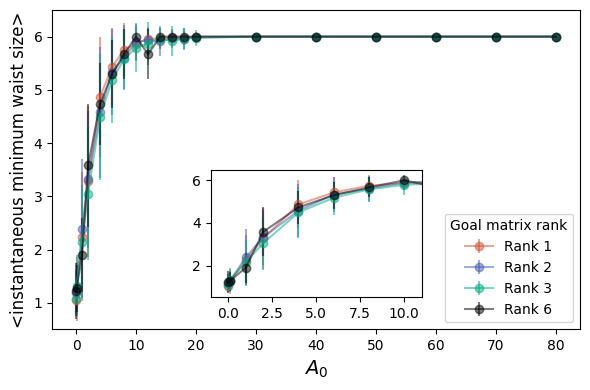

In [45]:
colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
labels = ["Rank 1","Rank 2", "Rank 3", "Rank 6"]   # 各ラベル
#plt.grid(alpha=0.2)            # 罫線
#plt.figure(figsize=(6,4), facecolor="white")
fig, ax = plt.subplots(figsize=(6, 4), facecolor="white")
#axins = ax.inset_axes([0.55, 0.48, 0.4, 0.4])
result_list = np.array(result_list)
axins = ax.inset_axes([0.3, 0.1, 0.4, 0.4])
for rank_id in range(4):
    ax.errorbar(initvalue, result_list[rank_id][:,0], 
                 yerr=result_list[rank_id][:,1], color=colors[rank_id], 
                 label=labels[rank_id], alpha=0.5, marker="o")
    #plt.scatter(initvalue, GPR.loc[:, "waist_mean"], color=colors[i], alpha=0.5)
    
    axins.errorbar(initvalue, result_list[rank_id][:,0], 
                 yerr=result_list[rank_id][:,1], color=colors[rank_id], 
                label=labels[rank_id], alpha=0.5, marker="o")
    

ax.set_xlabel('$A_{0}$',size=14)  # x軸ラベル
#ax.set_ylabel('Mean no. of active nodes in waist',size=14)  # y軸ラベル
ax.set_ylabel('<instantaneous minimum waist size>',size=12)  # y軸ラベル
ax.set_ylim(0.5,6.5)
axins.set_ylim(0.5,6.5)
axins.set_xlim(-1,11)
ax.legend(loc=4, title="Goal matrix rank")    # 凡例
plt.tight_layout()  # レイアウトの設定
matplotlib.rcParams['pdf.fonttype'] = 42
#plt.savefig("Figures/S4Fig.eps")
#plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig7/SuppFig7e.pdf")

### SFig 8a
- Data directory: ODE_a
- Simulation script: `RankDependency.py` (Set ALGORITHM = GD)
> The numerical integration is performed by the fourth-order Runge-Kutta method. (A) The mode among 100 runs of the number of active nodes in the most-adapted network. The number of runs is [rank1: 100; rank2: 100; rank3: 99; rank6: 5]. Initial link intensity is set to A_0: 0.001. The error bars represent the std. Goal matrix elements are randomized under the conditions of rank1 (red), rank2 (blue), rank3 (green), and rank6 (black). The norm ‖G‖_F is normalized to the same value (‖G‖_F  = 60).

[100, 100, 99, 5]


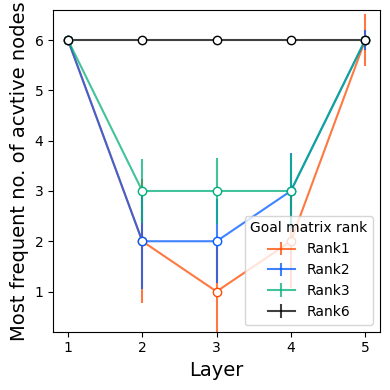

In [41]:
RD1 = np.loadtxt("ODE_a/ODE_RankDepend_R1_A0001.txt")
RD2 = np.loadtxt("ODE_a/ODE_RankDepend_R2_A0001.txt")
RD3 = np.loadtxt("ODE_a/ODE_RankDepend_R3_A0001.txt")
RD6 = np.loadtxt("ODE_a/ODE_RankDepend_R6_A0001.txt")
RD_data = [RD1, RD2, RD3, RD6]
print([len(RD) for RD in RD_data])
RDs_ave = [[statistics_mode(RD_data[j][:,i]) for i in range(5)] for j in range(len(RD_data))]
RDs_std = [np.std(RD_data[j], axis=0) for j in range(len(RD_data))]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]

labels = ["Rank1","Rank2", "Rank3", "Rank6"]
X = [1,2,3,4,5]

plt.figure(figsize=(4,4), facecolor="white")
plt.xlabel('Layer', size=14)  # x軸ラベル
plt.ylabel('Most frequent no. of acvtive nodes',size=14)  # y軸ラベル
plt.ylim(0.2,6.6)
for i in range(4):
    plt.errorbar(X, RDs_ave[i],yerr=RDs_std[i], color=colors[i], label=labels[i], alpha=0.75, zorder=1)
    plt.scatter(X, RDs_ave[i], alpha=1.0, facecolor='white', edgecolors=colors[i], zorder=2)

plt.legend(loc=4, title="Goal matrix rank")    
plt.xticks([1, 2, 3, 4, 5])
plt.yticks([1, 2, 3, 4, 5, 6])
plt.tight_layout()  # レイアウトの設定
#plt.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig8/SuppFig8a.pdf")

### SFig 8b
- Data directory: ODE_b
- Simulation script: `InitDependency.py` (Set ALGORITHM = GD)
> The numerical integration is performed by the fourth-order Runge-Kutta method. (B) The bow-tie emergence exhibits a strong dependence on the initial link intensity. X-axis: the link intensity of the initial network.  Y-axis: Mean number of active nodes in the waist layer in an adapted network among 100 runs. The error bars are the std. The dashed line shows ‖G‖_F=60.

4


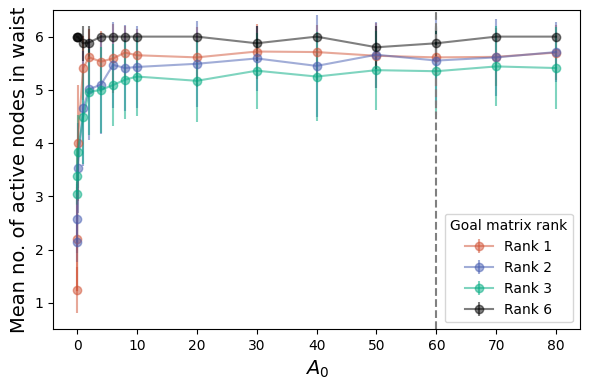

In [42]:
X = [0.001, 0.01,0.1,1.0,2.0,4.0,6.0,8.0,10,20,30,40,50,60,70,80]
GPR1 = pd.read_csv("ODE_b/ODE_InitDepend_R1.csv")
GPR2 = pd.read_csv("ODE_b/ODE_InitDepend_R2.csv")
GPR3 = pd.read_csv("ODE_b/ODE_InitDepend_R3.csv")
GPR6 = pd.read_csv("ODE_b/ODE_InitDepend_R6.csv")
waist_size_data = [GPR1, GPR2, GPR3 ,GPR6]
b = InitDependency(waist_size_data, "", X, inset = False, figsize=[6,4])
#b.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig8/SuppFig8a.pdf")

### SFig 8cd
- Data directory: ODE_cd
- Simulation script: `InitDependency.py` (Set ALGORITHM = GD)
> The numerical integration is performed by the fourth-order Runge-Kutta method. 
(C) Evolution trajectories of the number of nodes in each layer. Simulation starts from A_0=0.001 in the solid lines and A_0=40 in the dashed lines. Trajectories are averaged among independent simulation runs (n=100 for each color). The simulation runs that reach F > -0.01 are used. (D) Distribution of instantaneous minimum waist size that the network experienced during evolution (n=100 for each color). 

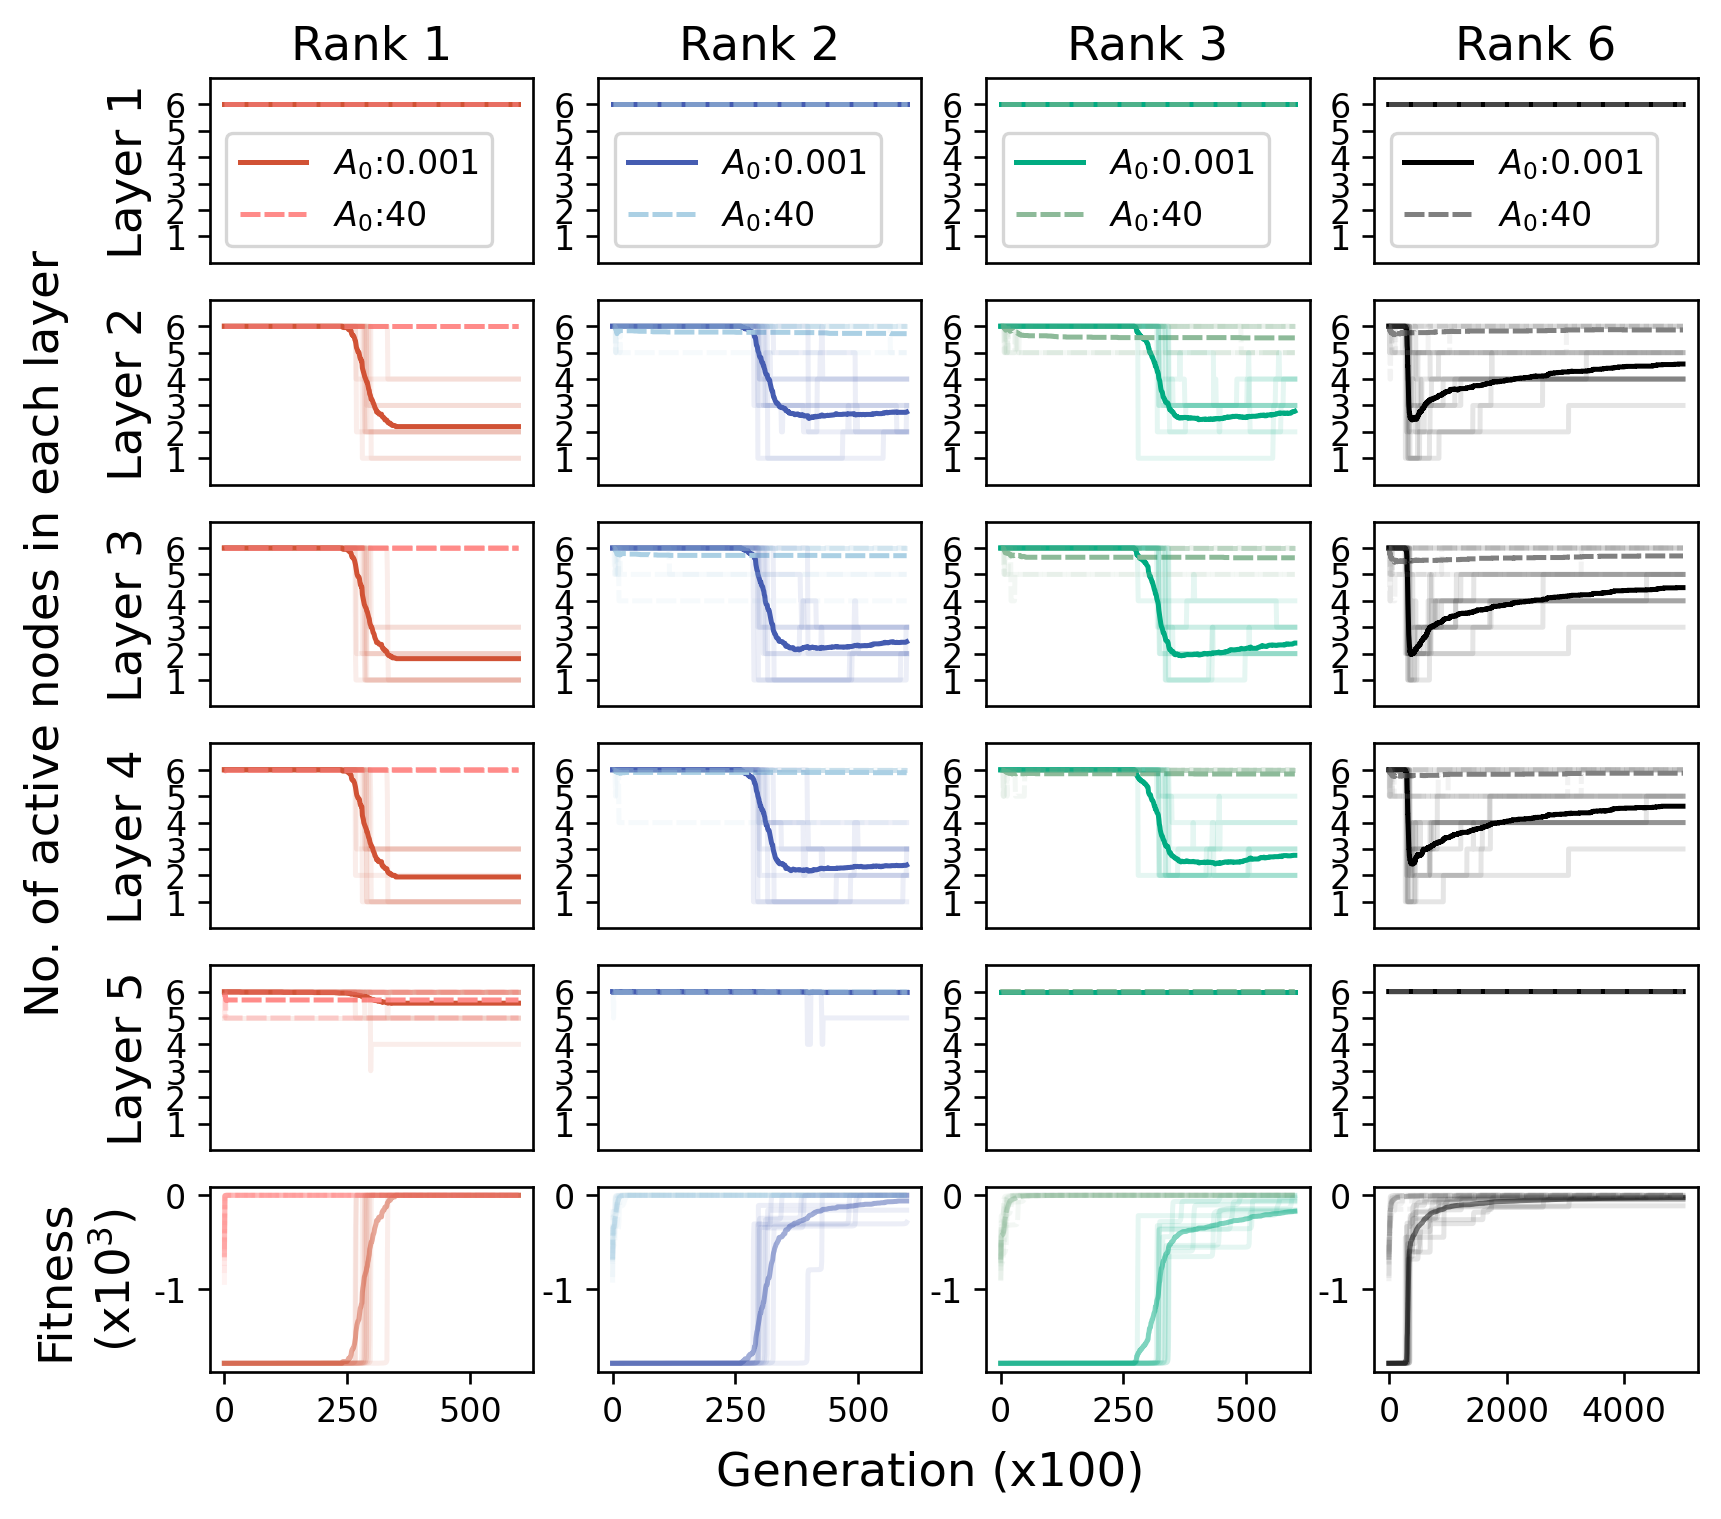

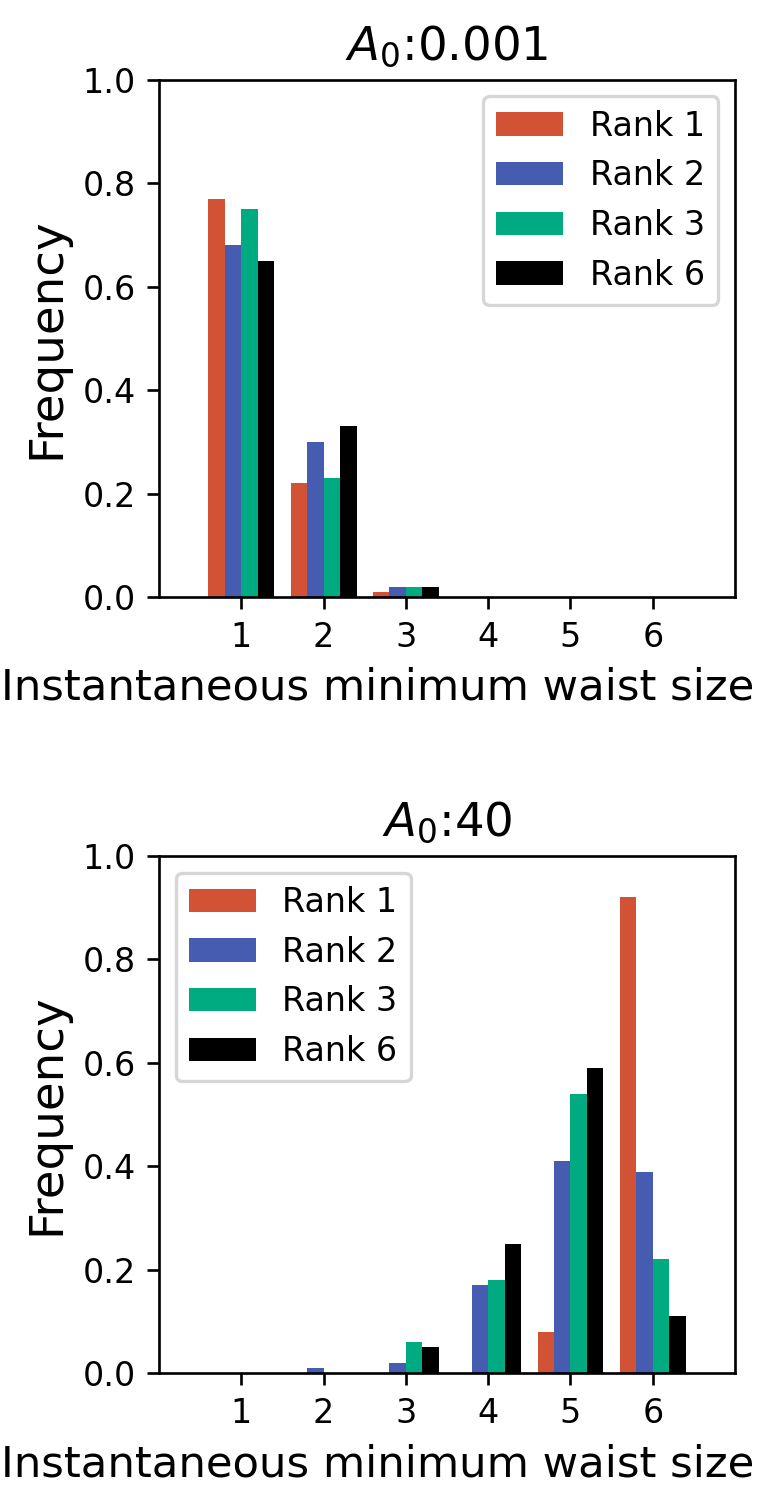

In [43]:
N0001R1 = np.load("ODE_cd/ODE_EvolTrajectoryA0001_R1.npy",allow_pickle=True)
N0001R2 = np.load("ODE_cd/ODE_EvolTrajectoryA0001_R2.npy",allow_pickle=True)
N0001R3 = np.load("ODE_cd/ODE_EvolTrajectoryA0001_R3.npy",allow_pickle=True)
N0001R6 = np.load("ODE_cd/ODE_EvolTrajectoryA0001_R6.npy",allow_pickle=True)

N40R1 = np.load("ODE_cd/ODE_EvolTrajectoryA40_R1.npy",allow_pickle=True)
N40R2 = np.load("ODE_cd/ODE_EvolTrajectoryA40_R2.npy",allow_pickle=True)
N40R3 = np.load("ODE_cd/ODE_EvolTrajectoryA40_R3.npy",allow_pickle=True)
N40R6 = np.load("ODE_cd/ODE_EvolTrajectoryA40_R6.npy",allow_pickle=True)


for i in range(len(N0001R1)):
    N0001R1[i][:,5] = -1*N0001R1[i][:,5]
    N0001R2[i][:,5] = -1*N0001R2[i][:,5]
    N0001R3[i][:,5] = -1*N0001R3[i][:,5]
    N0001R6[i][:,5] = -1*N0001R6[i][:,5]
    N40R1[i][:,5] = -1*N40R1[i][:,5]
    N40R2[i][:,5] = -1*N40R2[i][:,5]
    N40R3[i][:,5] = -1*N40R3[i][:,5]
    N40R6[i][:,5] = -1*N40R6[i][:,5]

N0001_data = [N0001R1, N0001R2, N0001R3, N0001R6]
N40_data = [N40R1, N40R2, N40R3, N40R6]


N0001_data = [ np.array([N0001_data[R_index][i] for i in range(N0001_data[R_index].shape[0]) if  N0001_data[R_index][i] is not None])
             for R_index in range(4)]

N40_data = [ np.array([N40_data[R_index][i] for i in range(N40_data[R_index].shape[0]) if N40_data[R_index][i] is not None]) 
            for R_index in range(4)]

c = TimeCourseOfActiveNode(N0001_data, N40_data, 6, "",end=5000, small_value = 0.001, large_value=40)
d = HistogramOfMinimalWaist(N0001_data, N40_data, "", small_value = 0.001, large_value=40)

#c.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig8/SuppFig8c.pdf")
#d.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SFig8/SuppFig8d.pdf")

### Fig 4
- Data directory: Fig4
- Simulation script: XXX

> Fig 4. Introduction of goal matrix fluctuation in a network with M=6 L=4 (5 layers). The goal matrix is changed every 1000 generations (dashed line) after or before the adaptation. The number of nodes in each layer (upper 5 panels) and the fitness of the most-adapted network in the population (the bottom panel) are plotted against the generation. (A) Sequential goal matrix changes after fitness is converged. The goal matrix changes without changing the norm and rank (red: rank1; black: rank6). (B) Sequential goal matrix changes after fitness is converged. The goal matrix rank is changed from the rank1 to rank6 in the first change. (C) Sequential goal matrix changes from the beginning of evolution. The goal matrix rank and norm do not change (red: rank1; black: rank6).

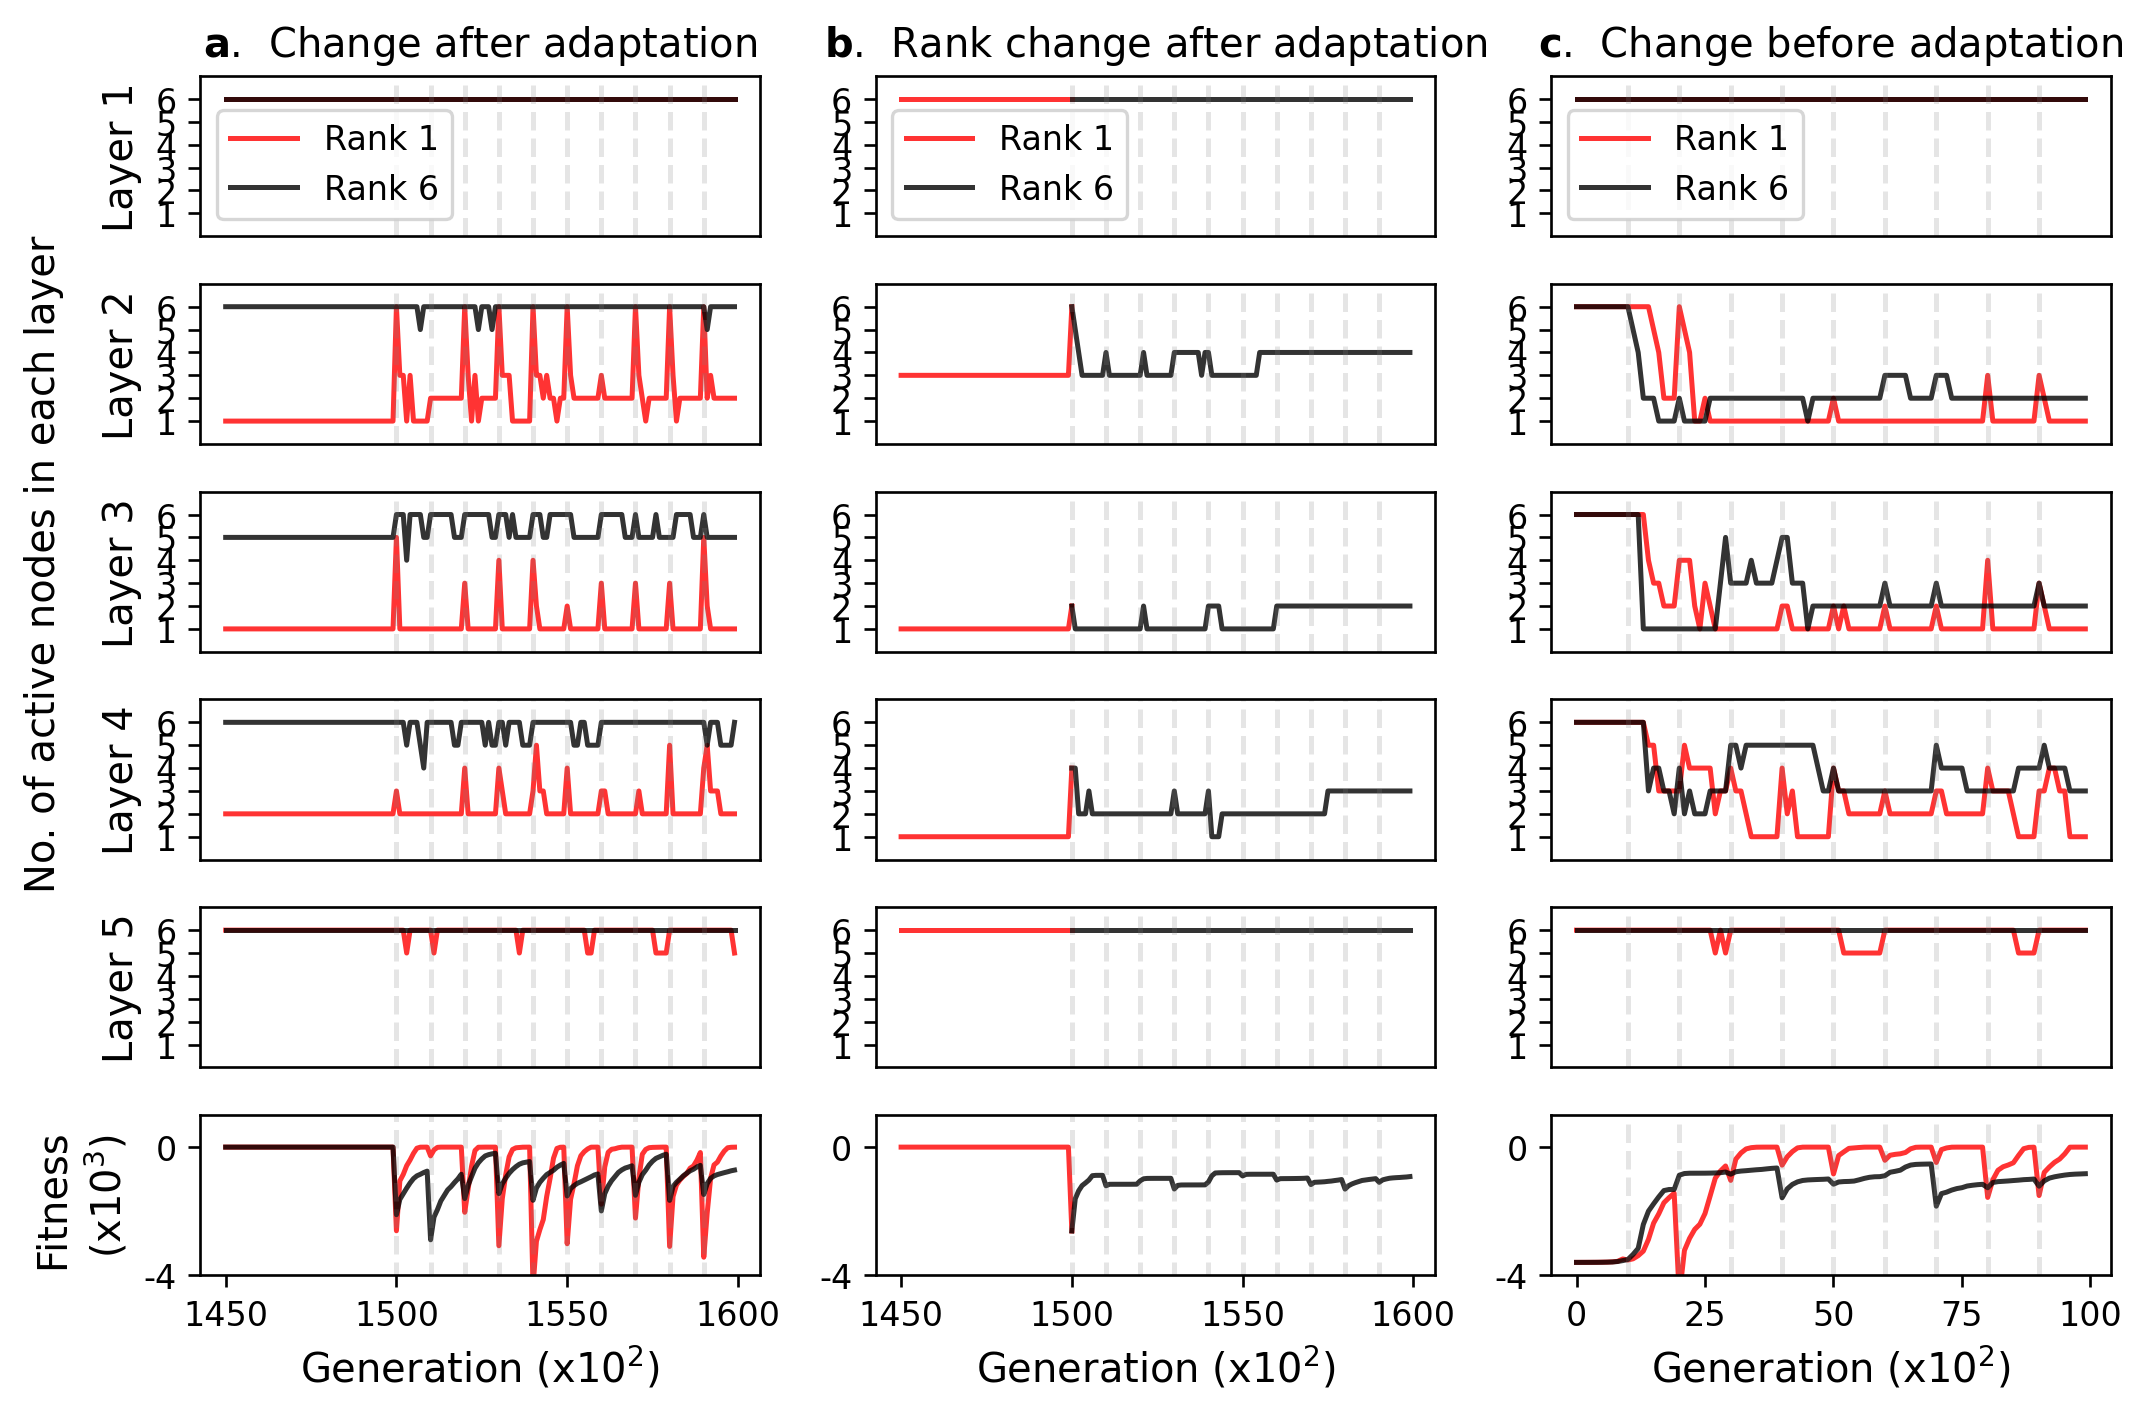

In [6]:
# Create fig.2c
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6),facecolor="white", dpi=240)

BeforeAdaptR1 = np.load("Fig4/GoalMatirxChangeGA_BeforeAdaptA0,01_R1_ver2.npy",allow_pickle=True)
AfterAdaptR1 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R1_ver2.npy", allow_pickle=True)

#BeforeAdaptR1 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1.npy",allow_pickle=True)
#AfterAdaptR1 = np.load("Data/GoalMatirxChangeGA_AfterAdaptA0,01_R1_every5000.npy", allow_pickle=True)

BeforeAdaptR6 = np.load("Fig4/GoalMatirxChangeGA_BeforeAdaptA0,01_R6_ver2.npy",allow_pickle=True)
AfterAdaptR6 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R6_ver2.npy", allow_pickle=True)

AfterAdaptR1_to_R6 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R1_To_R6.npy", allow_pickle=True)

      
GoalChangeTimeB = list(range(10,100,10))
GoalChangeTimeA = list(range(50,150,10))

ax = list(range(18))
left=0
middle=0
right=0
alp_=0.8
alp2_ = 0.8
j = 1
for i in range(18):
    ax[i] = fig.add_subplot(6, 3, i+1)
    if i%3==2:
        #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
        if left ==5:
            ax[i].plot(BeforeAdaptR1[j][:,left], color="red", alpha=alp2_)
            ax[i].plot(BeforeAdaptR6[j][:,left], color="#000000", alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].vlines(GoalChangeTimeB, -4000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            ax[i].plot(BeforeAdaptR1[j][:,left], color="red",alpha=alp_)
            ax[i].plot(BeforeAdaptR6[j][:,left], color="#000000", alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeB, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        left +=1

    elif i%3==0:
        if middle ==5:
            ax[i].plot(AfterAdaptR1[j][1450:1600,middle], color="red", alpha=alp2_)
            ax[i].plot(AfterAdaptR6[j][1450:1600,middle], color="#000000", alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].set_ylabel("Fitness \n(x$10^3$)", size=12)
            ax[i].set_xticks([0,50,100,150])
            ax[i].set_xticklabels([1450, 1500, 1550, 1600])
            ax[i].vlines(GoalChangeTimeA,-5000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            #ax[i].plot(AfterAdaptR1[j][1450:1600,right], color="red", alpha=alp_)
            ax[i].plot(AfterAdaptR1[j][1450:1600,middle], color="red", alpha=alp_)
            ax[i].plot(AfterAdaptR6[j][1450:1600,middle], color="#000000", alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_ylabel("Layer {}".format(left+1), size=12)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeA, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        middle +=1
    elif i%3 == 1:
        if right ==5:
            ax[i].plot(list(range(0,51)), AfterAdaptR1_to_R6[j][1450:1501,right], color="red", alpha=alp2_)
            ax[i].plot(list(range(50,150)), AfterAdaptR1_to_R6[j][1500:1600,right], color="#000000", alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].set_xticks([0,50,100,150])
            ax[i].set_xticklabels([1450, 1500, 1550, 1600])
            ax[i].vlines(GoalChangeTimeA,-5000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            #ax[i].plot(AfterAdaptR1[j][1450:1600,right], color="red", alpha=alp_)
            ax[i].plot(list(range(0,51)), AfterAdaptR1_to_R6[j][1450:1501,right], color="red", alpha=alp_)
            ax[i].plot(list(range(50,150)), AfterAdaptR1_to_R6[j][1500:1600,right], color="#000000", alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeA, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        right +=1

ax[0].set_title(r"$\mathbf{a}$.  Change after adaptation",fontsize=12)
ax[1].set_title(r"$\mathbf{b}$.  Rank change after adaptation",fontsize=12)
ax[2].set_title(r"$\mathbf{c}$.  Change before adaptation",fontsize=12)

ax[0].legend(labels = ["Rank 1", "Rank 6"],loc="lower left")
ax[1].legend(labels = ["Rank 1" , "Rank 6"],loc="lower left")
ax[2].legend(labels = ["Rank 1", "Rank 6"],loc="lower left")
fig.text(0.02, 0.6, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)

fig.tight_layout()
fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/Fig4.pdf")

### SFig 11
- Data directory: Fig4
- Simulation script: XXX

> XXX

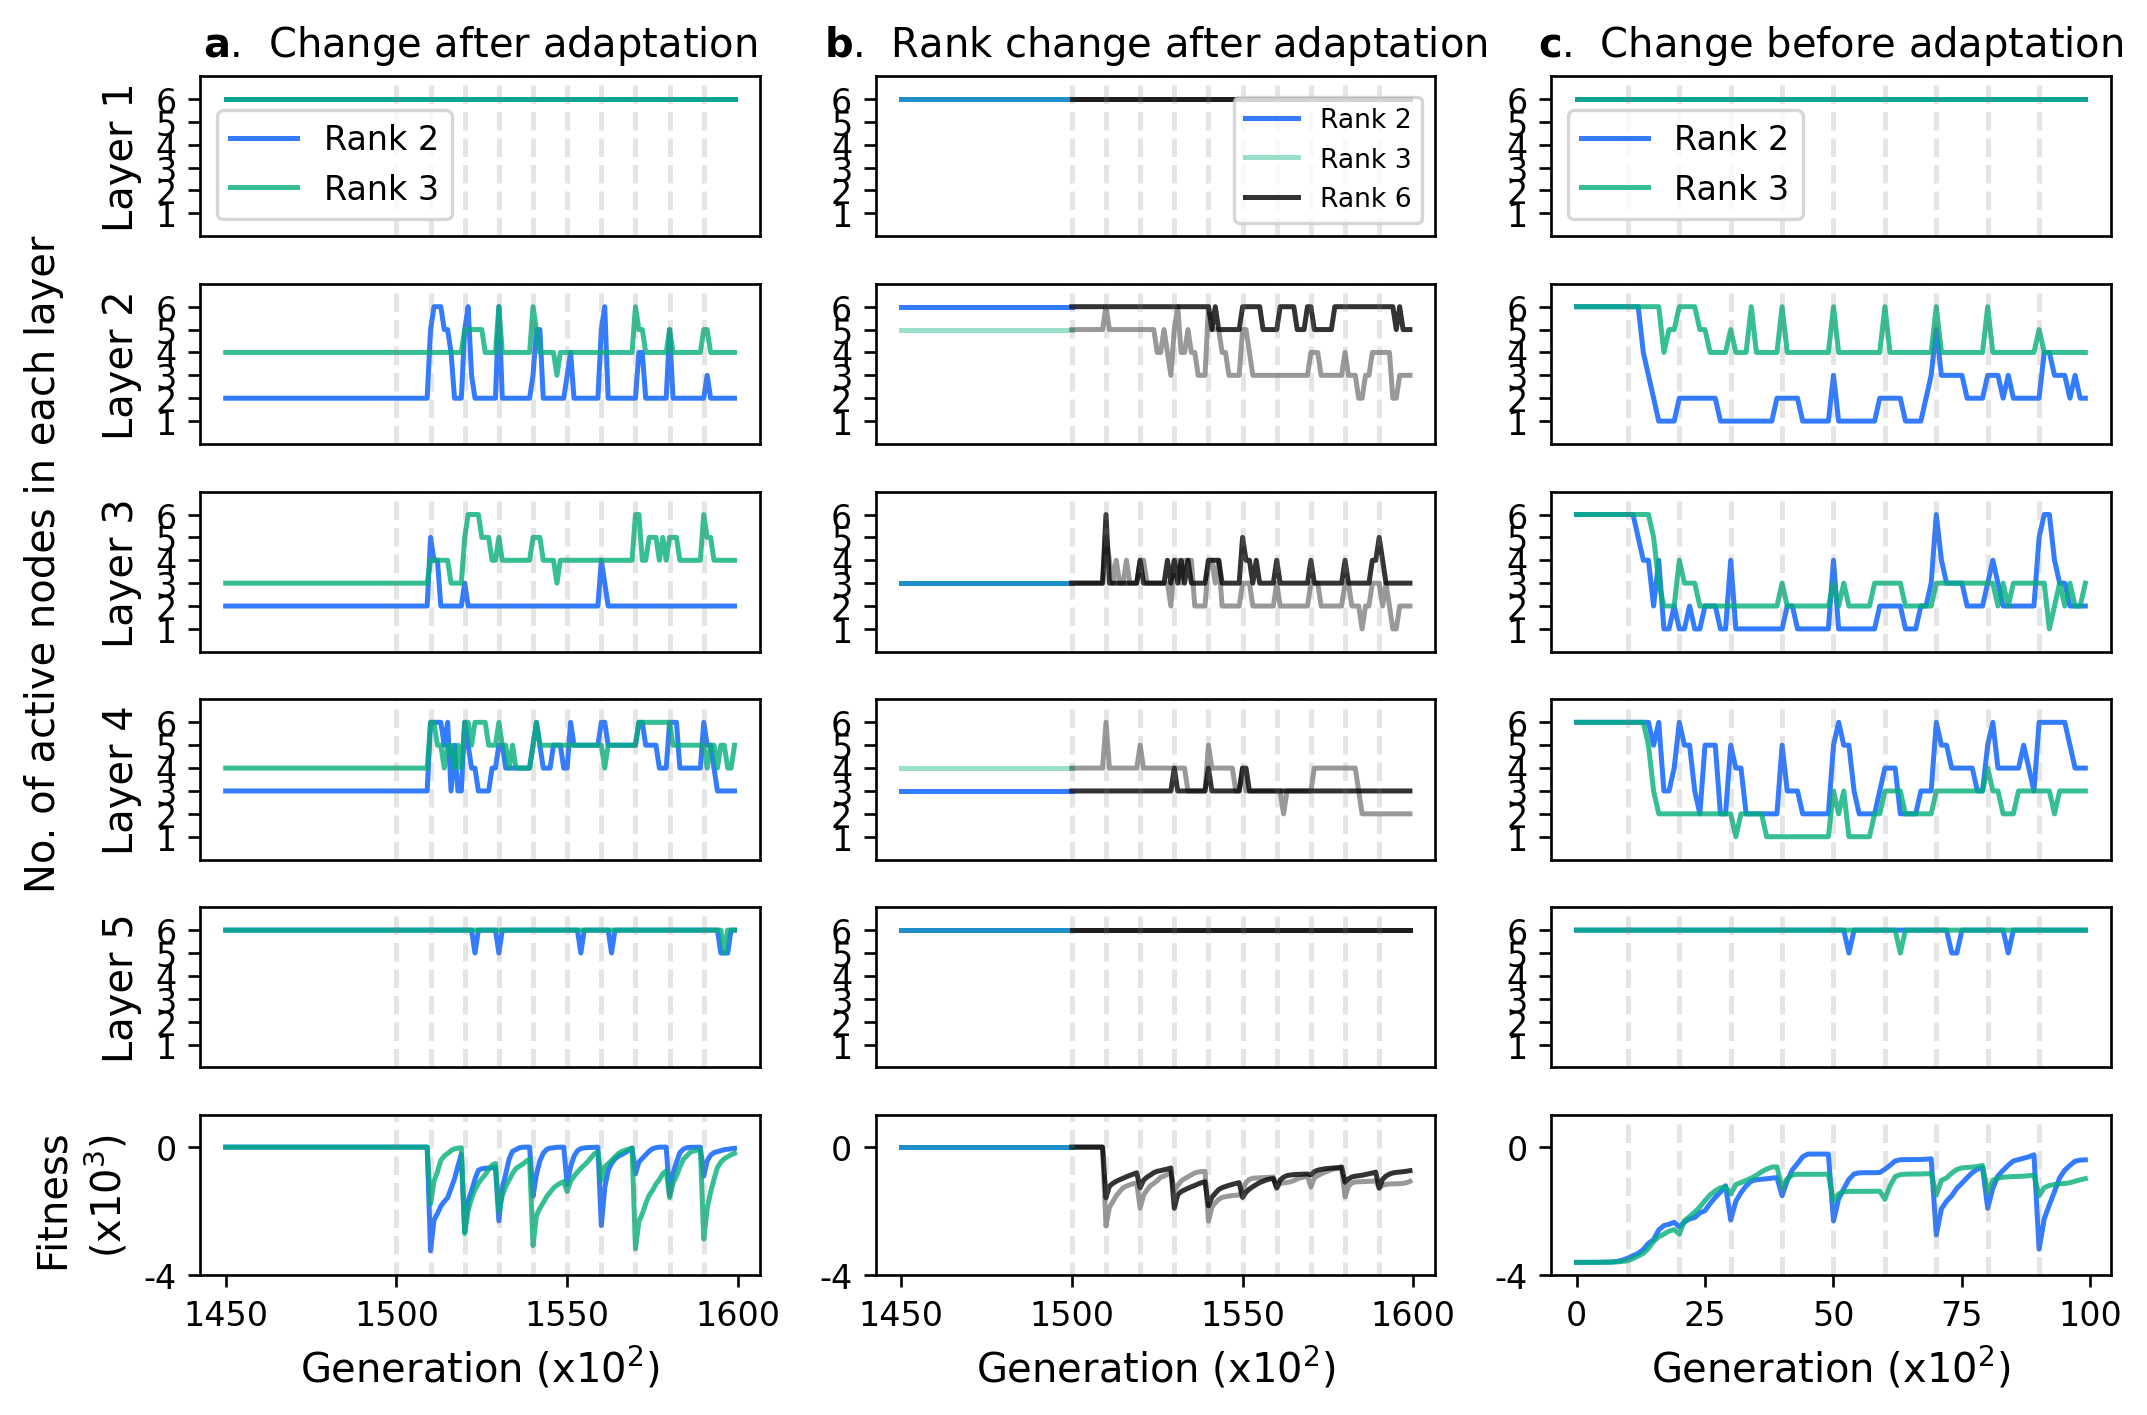

In [44]:
# Create fig.2c
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6),facecolor="white", dpi=240)

BeforeAdaptR2 = np.load("Fig4/GoalMatirxChangeGA_BeforeAdaptA0,01_R2.npy",allow_pickle=True)
AfterAdaptR2 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R2.npy", allow_pickle=True)

#BeforeAdaptR1 = np.load("Data/GoalMatirxChangeGA_BeforeAdaptA0,01_R1.npy",allow_pickle=True)
#AfterAdaptR1 = np.load("Data/GoalMatirxChangeGA_AfterAdaptA0,01_R1_every5000.npy", allow_pickle=True)

BeforeAdaptR3 = np.load("Fig4/GoalMatirxChangeGA_BeforeAdaptA0,01_R3.npy",allow_pickle=True)
AfterAdaptR3 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R3.npy", allow_pickle=True)

AfterAdaptR2_to_R6 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R2_To_R6.npy", allow_pickle=True)
AfterAdaptR3_to_R6 = np.load("Fig4/GoalMatirxChangeGA_AfterAdaptA0,01_R3_To_R6.npy", allow_pickle=True)

      
GoalChangeTimeB = list(range(10,100,10))
GoalChangeTimeA = list(range(50,150,10))
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
ax = list(range(18))
left=0
middle=0
right=0
alp_=0.8
alp2_ = 0.8
j = 1
for i in range(18):
    ax[i] = fig.add_subplot(6, 3, i+1)
    if i%3==2:
        #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
        if left ==5:
            ax[i].plot(BeforeAdaptR2[:,left], color=colors[1], alpha=alp2_)
            ax[i].plot(BeforeAdaptR3[:,left], color=colors[2], alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].vlines(GoalChangeTimeB, -4000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            ax[i].plot(BeforeAdaptR2[:,left], color=colors[1],alpha=alp_)
            ax[i].plot(BeforeAdaptR3[:,left], color=colors[2], alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeB, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        left +=1

    elif i%3==0:
        if middle ==5:
            ax[i].plot(AfterAdaptR2[1450:1600,middle], color=colors[1], alpha=alp2_)
            ax[i].plot(AfterAdaptR3[1450:1600,middle], color=colors[2], alpha=alp2_)
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].set_ylabel("Fitness \n(x$10^3$)", size=12)
            ax[i].set_xticks([0,50,100,150])
            ax[i].set_xticklabels([1450, 1500, 1550, 1600])
            ax[i].vlines(GoalChangeTimeA,-5000,1000, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        else:
            ax[i].plot(AfterAdaptR2[1450:1600,middle], color=colors[1], alpha=alp_)
            ax[i].plot(AfterAdaptR3[1450:1600,middle], color=colors[2], alpha=alp_)
            ax[i].set_ylim(0,7)
            ax[i].set_ylabel("Layer {}".format(left+1), size=12)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeA, 0, 10, "grey", linestyles='dashed',label="Non enlargement",alpha=0.2) 
        middle +=1
    elif i%3 == 1:
        if right ==5:
            ax[i].plot(list(range(0,51)), AfterAdaptR2_to_R6[1450:1501,right], color=colors[1], alpha=alp_)
            ax[i].plot(list(range(50,150)), AfterAdaptR2_to_R6[1500:1600,right], color=colors[3], alpha=alp_)

            ax[i].plot(list(range(0,51)), AfterAdaptR3_to_R6[1450:1501,right], color=colors[2], alpha=0.4)
            ax[i].plot(list(range(50,150)), AfterAdaptR3_to_R6[1500:1600,right], color=colors[3], alpha=0.4)
            
            ax[i].set_ylim([-4000,1000])
            ax[i].set_yticks([-4000,0])
            ax[i].set_yticklabels(["-4","0",])
            ax[i].set_xlabel("Generation (x$10^2$)", size=12)
            ax[i].set_xticks([0,50,100,150])
            ax[i].set_xticklabels([1450, 1500, 1550, 1600])
            ax[i].vlines(GoalChangeTimeA,-5000,1000, "grey", linestyles='dashed',alpha=0.2) 
        else:
            #ax[i].plot(AfterAdaptR1[j][1450:1600,right], color="red", alpha=alp_)

            ax[i].plot(list(range(0,51)), AfterAdaptR2_to_R6[1450:1501,right], color=colors[1], alpha=alp_, label="Rank 2")

            ax[i].plot(list(range(0,51)), AfterAdaptR3_to_R6[1450:1501,right], color=colors[2], alpha=0.4,  label="Rank 3")
            ax[i].plot(list(range(50,150)), AfterAdaptR3_to_R6[1500:1600,right], color=colors[3], alpha=0.4)

            
            ax[i].plot(list(range(50,150)), AfterAdaptR2_to_R6[1500:1600,right], color=colors[3], alpha=alp_, label="Rank 6")
            
            ax[i].set_ylim(0,7)
            ax[i].set_yticks([1, 2, 3, 4, 5, 6])
            ax[i].set_xticks([])
            ax[i].vlines(GoalChangeTimeA, 0, 10, "grey", linestyles='dashed',alpha=0.2) 
        right +=1

ax[0].set_title(r"$\mathbf{a}$.  Change after adaptation",fontsize=12)
ax[1].set_title(r"$\mathbf{b}$.  Rank change after adaptation",fontsize=12)
ax[2].set_title(r"$\mathbf{c}$.  Change before adaptation",fontsize=12)

ax[0].legend(labels = ["Rank 2", "Rank 3"],loc="lower left")
#ax[1].legend(labels = ["Rank1"],loc="lower left")
ax[1].legend(fontsize=8,loc="lower right")
ax[2].legend(labels = ["Rank 2", "Rank 3"],loc="lower left")
fig.text(0.02, 0.6, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)

TITLE = "Sfig11"
fig.tight_layout()
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig11.pdf")

### Fig 5C
- Data directory: Fig5
- Simulation script: XXX

> Fig 5. Expansion of the goal matrix drives evolution of the bow-tie architecture. The procedure of goal matrix enlargement. (C) Evolutionary trajectories of the network. X-axis: Generation. Y-axis: Number of nodes in each layer. The initial norm A_0 is 10.  The orange line represents the case where the 3x3 goal matrix with rank 1 is expanded to 9x9 at the 1000 generation (dashed line), while the blue line represents the simulation with no enlargement.

(100, 200, 6)
[ 1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
  9.00000000e+00 -7.78713193e-03]
[ 2.00000000e+01  5.00000000e+00  2.00000000e+00  2.00000000e+00
  1.80000000e+01 -7.38115542e-03]


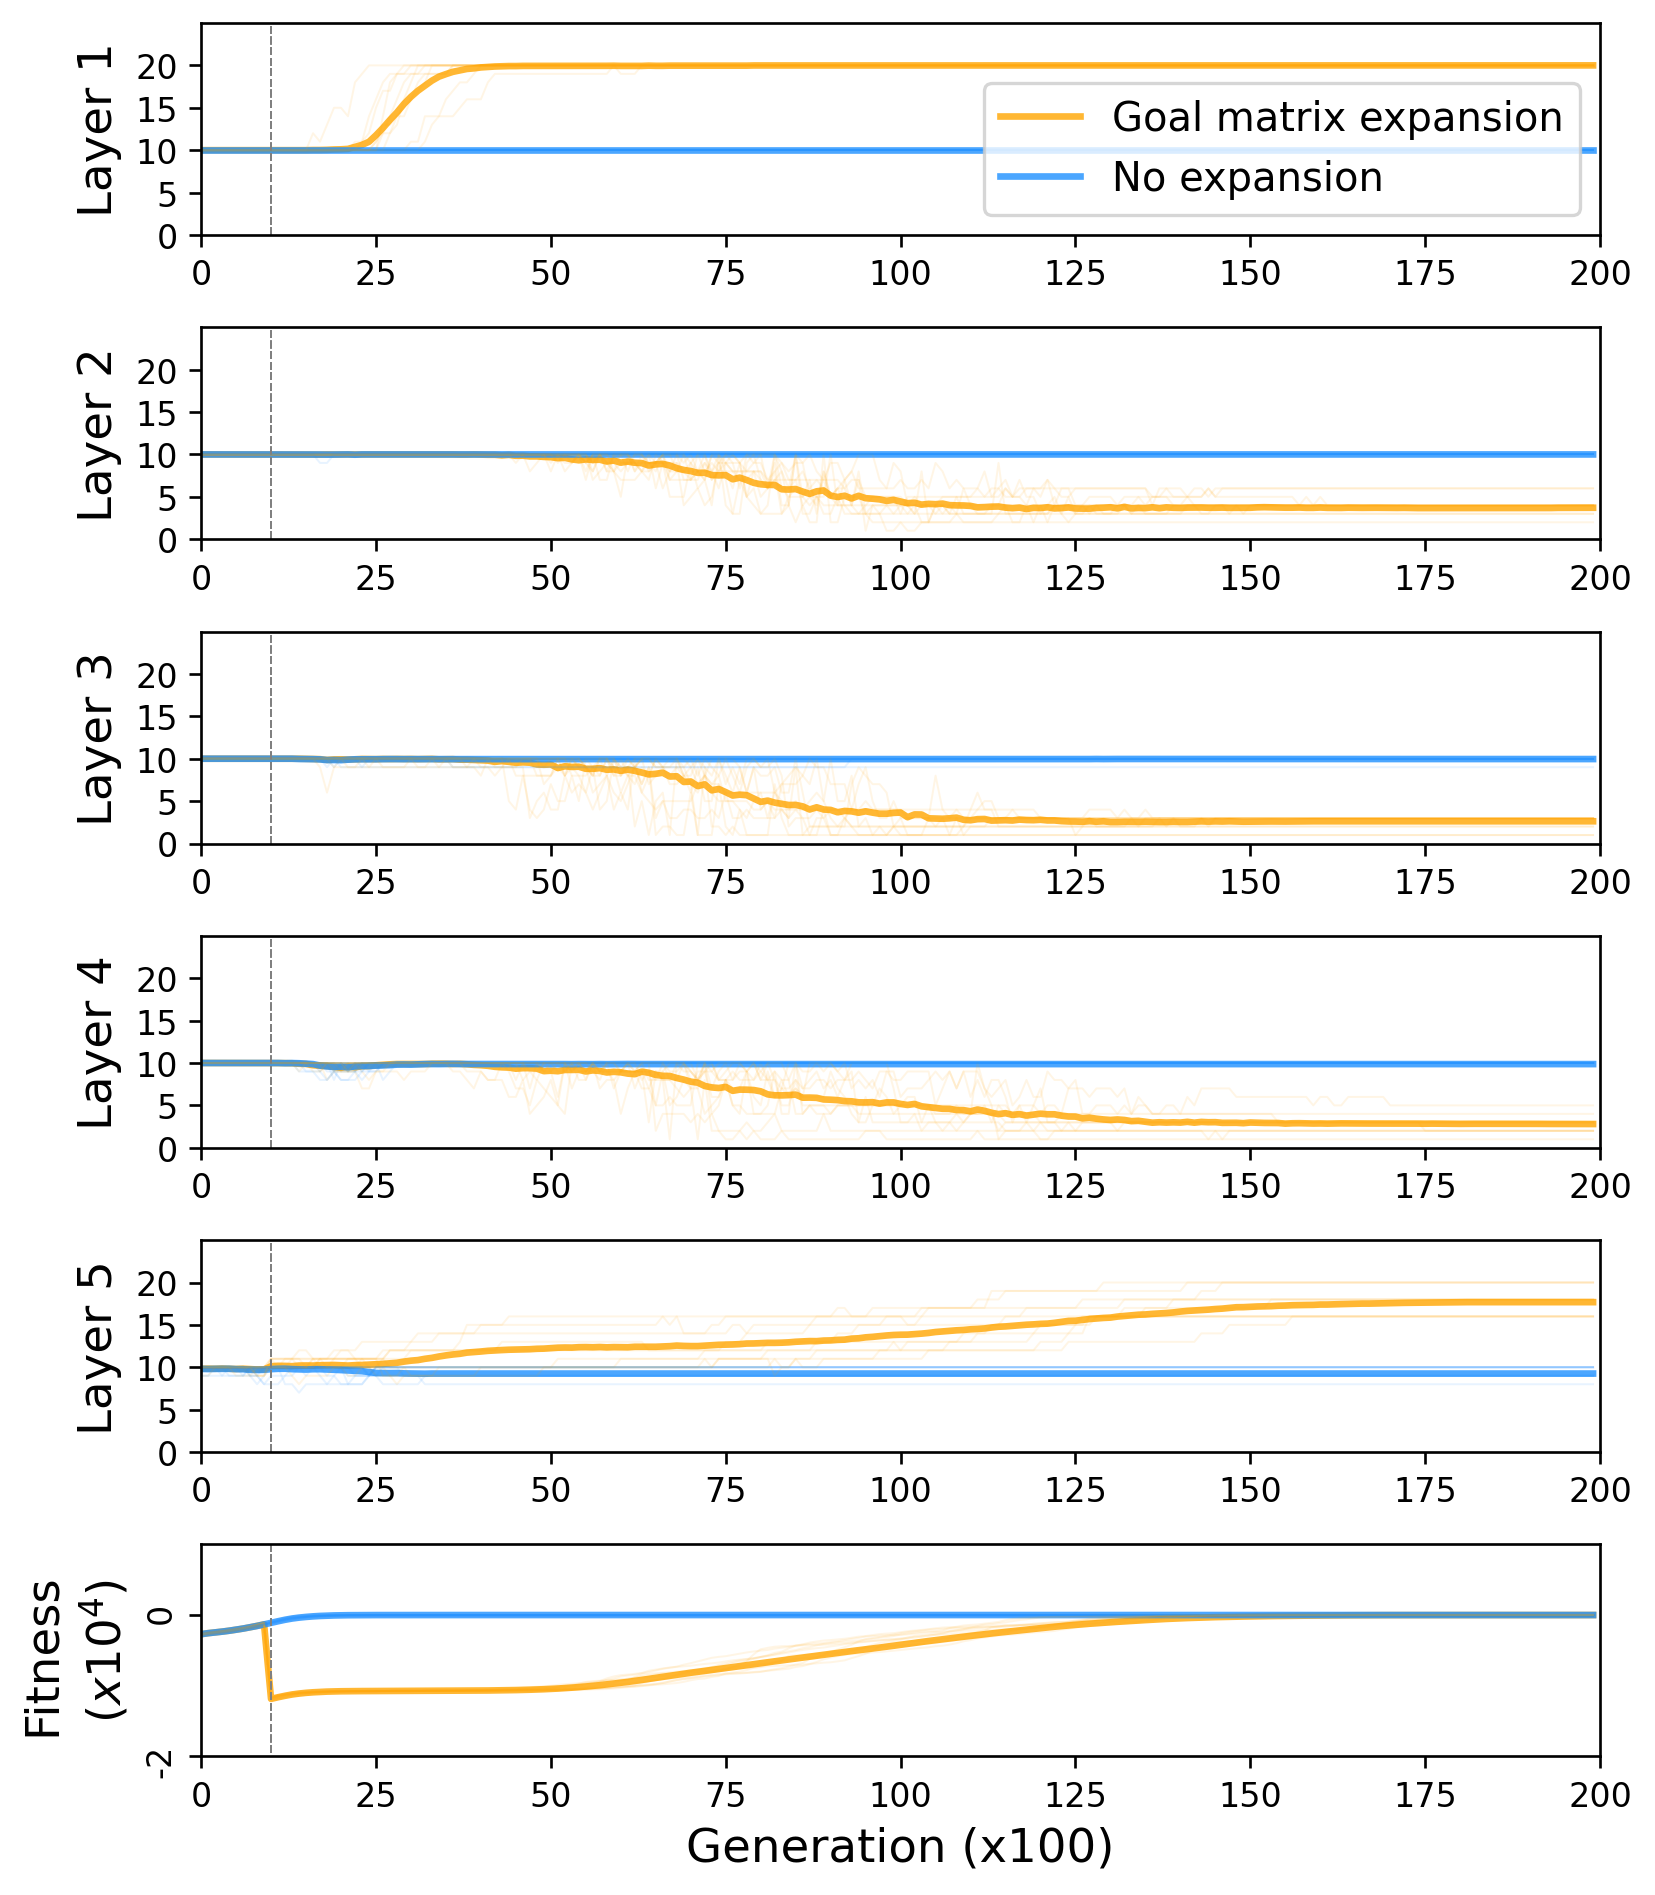

In [46]:
Dup = np.load('Fig5/Fig5R01N10L5_DU.npy',allow_pickle=True)
NonDup = np.load('Fig5/Fig5R01N10L5_ND.npy',allow_pickle=True)
print(Dup.shape)
print(NonDup[-1][-1])
print(Dup[-1][-1])

#Dup = [Dup[index] for index in range(10) if Dup[index] is not None]
Dup_mean = np.mean(Dup, axis=0)
NonDup_mean = np.mean(NonDup, axis=0)
nSample = 10#len(Dup)
nLayer=5
fig = plt.figure(figsize=(7, 8),facecolor="white", dpi=240)
ax = [0,1,2,3,4,5]
for i in range(0,6):
    ax[i]=fig.add_subplot(6, 1, i+1)
    if i !=5:
        ax[i].set_ylabel("Layer {}".format(int(i+1)), fontsize=14)
        col1 = "orange"
        col2 = "#1e90ff"
        ax[i].set_ylim(0,25)
        ax[i].set_xlim(0,200)
        ax[i].set_yticks([0, 5, 10, 15, 20])
        maxv = 25
        minv= 0
        #ax[i].set_xticks([])
    else:
        col1 = "orange"
        col2 = "#1e90ff"
        maxv = 10000
        minv = -30000#np.min(Dup)
        ax[i].set_ylim(-20000,10000)
        ax[i].set_xlim(0,200)
        ax[i].set_yticks([0, -20000])
        ax[i].set_yticklabels([0, "-2"],rotation=90)
        ax[i].set_ylabel("Fitness \n$(x10^4)$", fontsize=14)
    #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
    ax[i].plot(Dup_mean[:,i], alpha=0.8, linewidth=2, color=col1, label="Goal matrix enlargement")
    ax[i].plot(NonDup_mean[:,i], alpha=0.8, linewidth=2, color=col2)
    for index in range(nSample):
         ax[i].plot(Dup[index][:,i], alpha=0.1,linewidth=0.6, color=col1, label="Goal matrix enlargement")
         ax[i].plot(NonDup[index][:,i], alpha=0.1, linewidth=0.6,color=col2)
         ax[i].vlines(10, minv, maxv, "grey", linestyles='dashed',label="Non enlargement", linewidth=0.6) 

ax[0].legend(labels = ["Goal matrix expansion", "No expansion"],loc="lower right", fontsize=12)
ax[i].set_xlabel("Generation (x100)", size=14)
TITLE = "Fig5c"
plt.tight_layout()
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/fig5set/{}.pdf".format(TITLE))


### Fig 5D
- Data directory: Fig5
- Simulation script: XXX

> (D)  Statistics of the number of active nodes in the adapted network for each layer (x-axis) with (orange) or without (blue) the goal matrix expansion.

[4. 2. 4.]


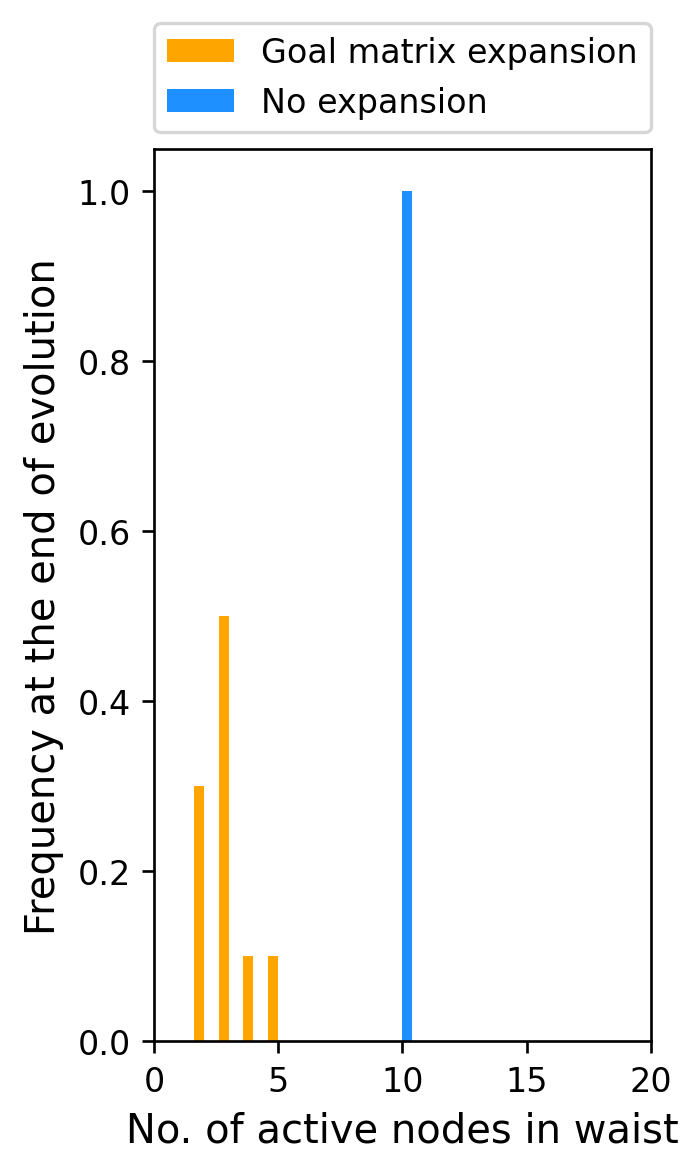

In [47]:
import collections
print(Dup[0][-1][1:4])
freq_dup = [np.mean(Dup[i][-1][1:4]) for i in range(nSample)]
freq_nondup = [np.mean(NonDup[i][-1][1:4]) for i in range(nSample)]
bins_list = np.array(list(range(0,20))) + 0.5
dup_counts, dup_bins = np.histogram(freq_dup, bins=bins_list)
dup_counts_normed = dup_counts / sum(dup_counts)
nondup_counts, nondup_bins = np.histogram(freq_nondup, bins=bins_list)
nondup_counts_normed = nondup_counts / sum(nondup_counts)
labels = ["Goal matrix expansion", "No expansion"]
colors = ["orange", "#1e90ff"]
fig = plt.figure(figsize=(3, 5),facecolor="white", dpi=240)
plt.xlim(0,20)
plt.hist([dup_bins[:-1],dup_bins[:-1]], bins=dup_bins, weights=[dup_counts_normed,nondup_counts_normed], label=labels, color=colors)
#plt.xticks(list(range(1,20),2))
plt.xlabel("No. of active nodes in waist",size=12)
plt.ylabel("Frequency at the end of evolution",size=12)
plt.legend(labels,  loc='lower center', bbox_to_anchor=(.5, 1), fontsize=10)
bbox_to_anchor=(1, 1)
plt.tight_layout()
TITLE = "Fig5d"
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/fig5set/{}.pdf".format(TITLE))


### SFig 2
- Data directory: VariousSelections
- Simulation script: `RankDepend.py`

> S1 Fig. Comparison of evolutionary simulation by tournament and elite selection for N=100. Here, in GA with the elite selection, the top 25% of population was selected in each generation.  The Y-axis shows the mode among 100 runs of the number of active nodes in the most-adapted network at the end of simulation. (A), (B) Evolutionary simulation with tournament selection starting from (A) the small initial intensity and (B) the large initial intensity. (C), (D) Evolutionary simulation with elite selection starting from (C) the small initial intensity and (D) the large initial intensity. The error bars are the std. The top left panel (A) is identical to Fig. 3A.

0
[[6.0, 2.0, 1.0, 2.0, 6.0], [6.0, 3.0, 2.0, 3.0, 6.0], [6.0, 4.0, 3.0, 4.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]
1
[[6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]
2
[[6.0, 1.0, 1.0, 1.0, 6.0], [6.0, 2.0, 2.0, 3.0, 6.0], [6.0, 4.0, 3.0, 4.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]
3
[[6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0], [6.0, 6.0, 6.0, 6.0, 6.0]]


Text(0.51, 0.46, '$\\mathbf{d}$')

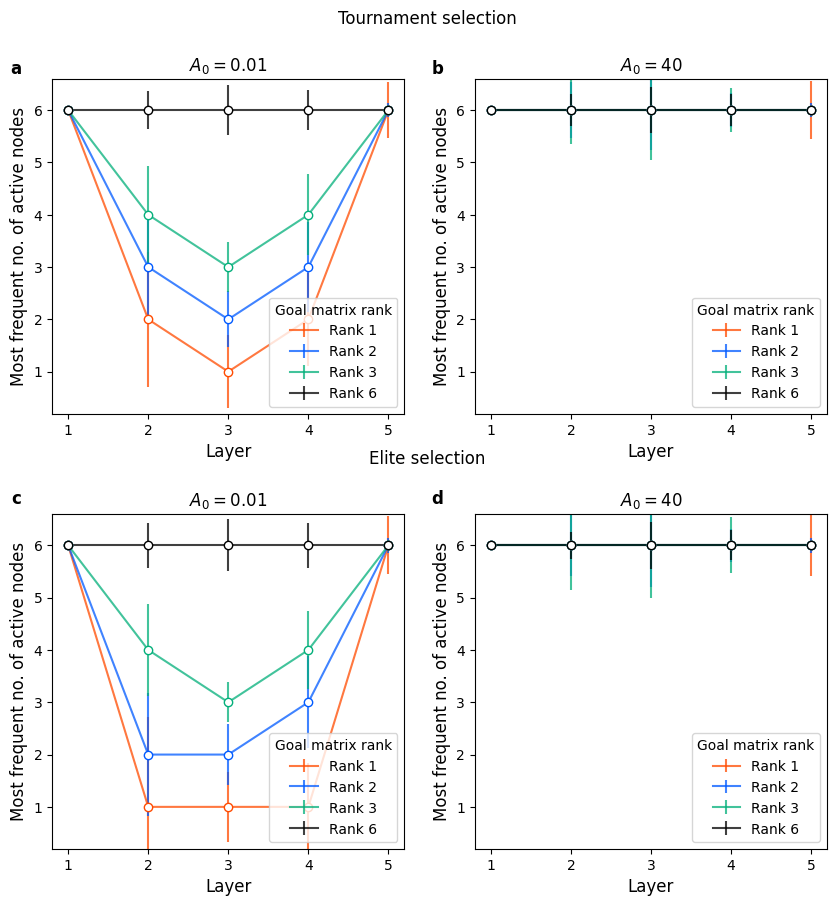

In [58]:
TournamentIni001R1 = np.loadtxt("Fig3a/RankDepend_R1_A001.txt")
TournamentIni001R2 = np.loadtxt("Fig3a/RankDepend_R2_A001.txt")
TournamentIni001R3 = np.loadtxt("Fig3a/RankDepend_R3_A001.txt")
TournamentIni001R6 = np.loadtxt("Fig3a/RankDepend_R6_A001.txt")
TournamentIni001 = [TournamentIni001R1, TournamentIni001R2, TournamentIni001R3, TournamentIni001R6]

TournamentIni40R1 = np.loadtxt("VariousSelections/RankDepend_R1_A40.txt")
TournamentIni40R2 = np.loadtxt("VariousSelections/RankDepend_R2_A40.txt")
TournamentIni40R3 = np.loadtxt("VariousSelections/RankDepend_R3_A40.txt")
TournamentIni40R6 = np.loadtxt("VariousSelections/RankDepend_R6_A40.txt")
TournamentIni40 = [TournamentIni40R1, TournamentIni40R2, TournamentIni40R3, TournamentIni40R6]

EliteIni001R1 = np.loadtxt("VariousSelections/RankDepend_R1_A001_EliteSl.txt")
EliteIni001R2 = np.loadtxt("VariousSelections/RankDepend_R2_A001_EliteSl.txt")
EliteIni001R3 = np.loadtxt("VariousSelections/RankDepend_R3_A001_EliteSl.txt")
EliteIni001R6 = np.loadtxt("VariousSelections/RankDepend_R6_A001_EliteSl.txt")
EliteIni001 = [EliteIni001R1, EliteIni001R2, EliteIni001R3, EliteIni001R6]

EliteIni40R1 = np.loadtxt("VariousSelections/RankDepend_R1_A40_EliteSl.txt")
EliteIni40R2 = np.loadtxt("VariousSelections/RankDepend_R2_A40_EliteSl.txt")
EliteIni40R3 = np.loadtxt("VariousSelections/RankDepend_R3_A40_EliteSl.txt")
EliteIni40R6 = np.loadtxt("VariousSelections/RankDepend_R6_A40_EliteSl.txt")
EliteIni40 = [EliteIni40R1, EliteIni40R2, EliteIni40R3, EliteIni40R6]

RankDependData = [TournamentIni001, TournamentIni40, EliteIni001, EliteIni40]

index=0
ax = list(range(4))
fig = plt.figure(figsize=(10, 10),facecolor="white", dpi=100)
for RD_data in RankDependData:
    ax[index] = fig.add_subplot(2, 2, index+1)
    RDs_ave = [[statistics_mode(RD_data[j][:,i]) for i in range(5)] for j in range(len(RD_data))]
    RDs_std = [np.std(RD_data[j], axis=0) for j in range(len(RD_data))]
    colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
    labels = ["Rank 1","Rank 2", "Rank 3", "Rank 6"]
    X = [1,2,3,4,5]
    print(index)
    print(RDs_ave)
    #ax[index].figure(figsize=(4,4), facecolor="white")
    ax[index].set_xlabel('Layer', size=12)  # x軸ラベル
    ax[index].set_ylabel('Most frequent no. of active nodes',size=12)  # y軸ラベル
    ax[index].set_ylim(0.2,6.6)
    for i in range(4):
        ax[index].errorbar(X, RDs_ave[i],yerr=RDs_std[i], color=colors[i], label=labels[i], alpha=0.75, zorder=1)
        ax[index].scatter(X, RDs_ave[i], alpha=1.0, facecolor='white', edgecolors=colors[i], zorder=2)
    ax[index].legend(loc=4, title="Goal matrix rank") 
    ax[index].set_xticks([1, 2, 3, 4, 5])
    ax[index].set_yticks([1, 2, 3, 4, 5, 6])
    index+=1

ax[0].set_title("$A_0 = 0.01$")
ax[2].set_title("$A_0 = 0.01$")
ax[1].set_title("$A_0 = 40$")
ax[3].set_title("$A_0 = 40$")
fig.subplots_adjust(hspace=0.3)

fig.text(0.5, 0.94, 'Tournament selection', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.5, 0.5, 'Elite selection', ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.089, 0.89, r"$\mathbf{a}$", ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.51, 0.89, r"$\mathbf{b}$", ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.089, 0.46, r"$\mathbf{c}$", ha='center', va='center', rotation='horizontal', size=12)
fig.text(0.51, 0.46, r"$\mathbf{d}$", ha='center', va='center', rotation='horizontal', size=12)

#fig.text(0.1, 0.895, 'a', ha='center', va='center', rotation='horizontal', size=14)


#TITLE = "S1Fig"
#fig.savefig("Figures/{}.tiff".format(TITLE))
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig2.pdf")

### SFig 10a

> Bow-tie architecture is maintained after changing goal matrix. (A) Evolutionary trajectories of the network from the initial norm A_0= 0.01 for goal matrix with rank1 (red), rank2 (blue), rank3 (green), and rank6 (black). The goal matrix is altered at 150,000 generation (dashed line). Trajectories are averaged among independent simulation runs (n=10). X-axis: generation. Y-axis: Number of nodes in each layer. 

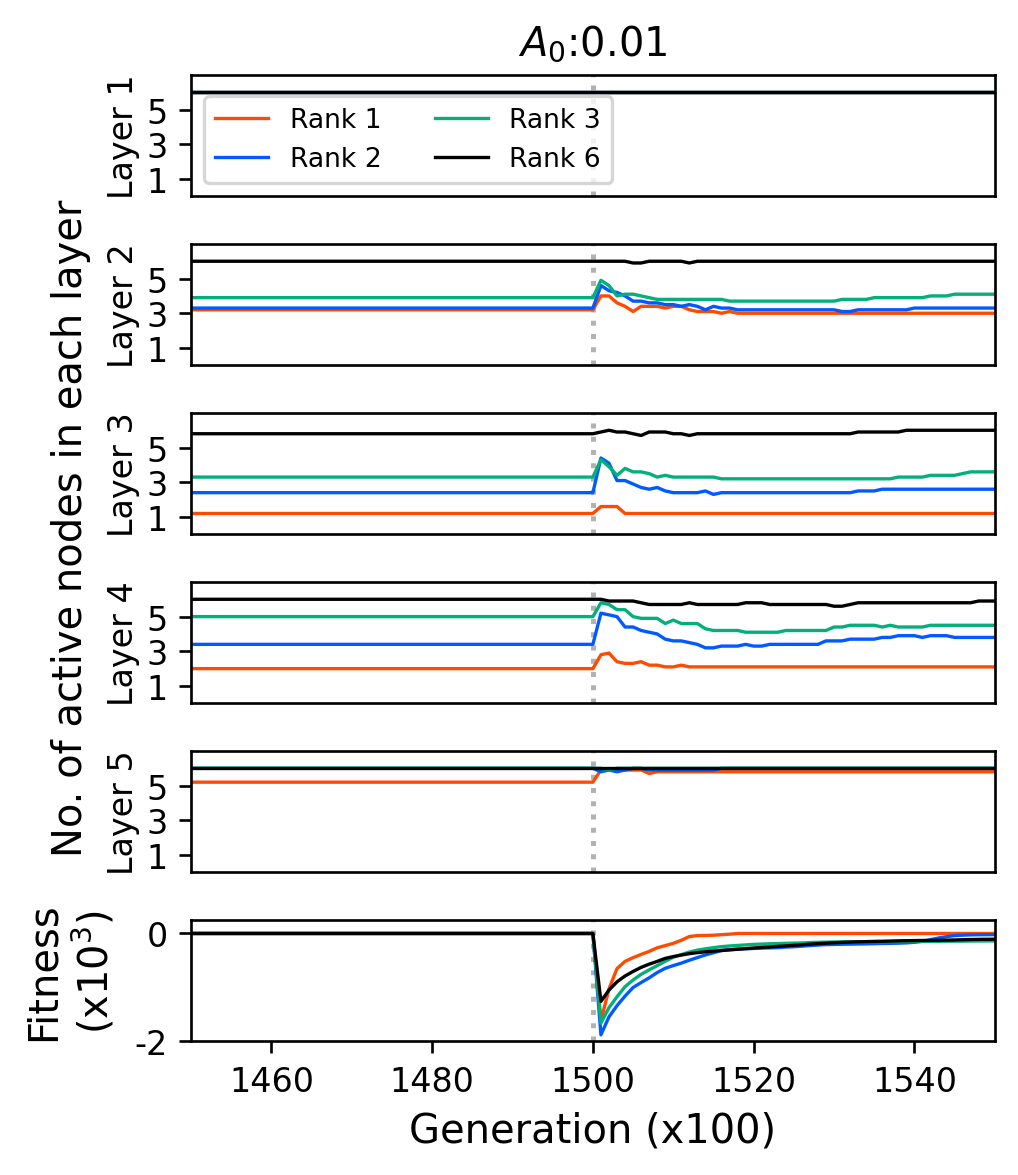

In [50]:
GR1 = np.load("GoalChangeOnce/OnceGoalMatirxChangeGA_0,01_R1.npy",allow_pickle=True)
GR2 = np.load("GoalChangeOnce/OnceGoalMatirxChangeGA_0,01_R2.npy",allow_pickle=True)
GR3 = np.load("GoalChangeOnce/OnceGoalMatirxChangeGA_0,01_R3.npy",allow_pickle=True)
GR6 = np.load("GoalChangeOnce/OnceGoalMatirxChangeGA_0,01_R6.npy",allow_pickle=True)


GR = [GR1, GR2, GR3, GR6]
labels = ["Rank 1", "Rank 2", "Rank 3", "Rank 6"]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
fig = plt.figure(figsize=(4, 5),facecolor="white", dpi=240)
ax = [0,1,2,3,4,5]

GR_mean = [np.mean(GR[index], axis=0) for index in range(len(GR))]

for i in range(len(ax)):
    ax[i]=fig.add_subplot(6, 1, i+1)
    #ax[i].tick_params(axis = 'y', labelsize = 7)
    if i < 5:
        ax[i].set_ylim(0,7)
        ax[i].set_yticks([1, 3, 5])
        ax[i].set_xticks([])
        ax[i].set_ylabel("Layer {}".format(i+1), labelpad=2)
        #ax[i].grid(color='grey', linestyle='dotted', linewidth=1, axis='y')
        ax[i].vlines(1500, 0, 7, "grey", linestyle="dotted", alpha=0.6) 
    else:
        ax[i].vlines(1500, -2000, 250, "grey", linestyle="dotted", alpha=0.6) 
        ax[i].set_ylim(-2000,250)
        ax[i].set_yticks([0,-2000])
        ax[i].set_yticklabels(["0","-2"])
    for index in range(len(GR)):
        ax[i].plot(GR_mean[index][:,i], alpha= 1, linewidth=1, color=colors[index], label=labels[index])
    ax[i].set_xlim(1450, 1550)
plt.subplots_adjust(wspace=3, left=0.12)
    
            
ax[0].legend(loc="lower left", fontsize=8, ncol=2)

ax[0].set_title("$A_0$:0.01")
ax[5].set_xlabel("Generation (x100)",size=12)

TITLE = "figS4a"

fig.text(0.00, 0.55, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=12)
fig.text(0.00, 0.18, 'Fitness\n(x$10^3$)', ha='center', va='center', rotation='vertical', size=12)
fig.tight_layout()
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig10a.pdf")

### SFig 10b
>(B) Comparison between the first and second adapted networks. X-axis: waist size of the network at 150000 generation (i.e., before the goal change) . Y-axis: waist size of the network at 300000 generation (i.e., after the goal change). Each dot is the average among 10 runs, and the error bars are the std

(10, 3000, 6)
before fitness:-2.936722932789927e-06
after fitness:-1.3861564349419185e-07
(10, 2)
before fitness:-1.4570874495316505e-06
after fitness:-2.198725541546112e-06
(10, 2)
before fitness:-7.633467020757163e-06
after fitness:-0.00254644104014495
(10, 2)
before fitness:-0.007859366754262576
after fitness:-0.08361278466922185
(10, 2)


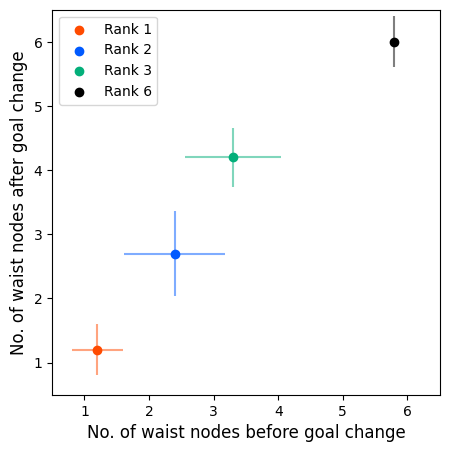

In [51]:
from scipy import stats
import numpy as np

print(GR1.shape)
GR = [GR1, GR2, GR3, GR6]
labels = ["Rank 1", "Rank 2", "Rank 3", "Rank 6"]
colors = ["#ff4b00", "#005aff","#03af7a", "#000000"]
fig = plt.figure(figsize=(5,5), facecolor="white")


for j in range(4):
    GRi = GR[j].copy()
    #print("rank{} 3500 waist: {}".format(j, GRi[0][1500][5]))
    #print("rank{} 3500 waist: {}".format(j, GRi[0][-1][5]))
    print("before fitness:{}".format(GRi[0][1499][5]))
    print("after fitness:{}".format(GRi[0][-1][5]))
    
    try:
        GRi_arr = np.array([[GRi[i][1499][2],GRi[i][-1][2]]  for i in range(10) if GRi[i] is not None])
        print(GRi_arr.shape)
        GRi_mean = np.mean(GRi_arr, axis=0)
        GRi_err = np.std(GRi_arr, axis=0)
        plt.scatter(GRi_mean[0],GRi_mean[1], color = colors[j], alpha=1, label=labels[j])
        plt.errorbar(GRi_mean[0],GRi_mean[1], yerr=GRi_err[0], xerr=GRi_err[1], color=colors[j], 
                     label=labels[j], alpha=0.5)
    except:
        print("d")

plt.legend(labels,  loc="upper left")
plt.ylim([0.5,6.5])
plt.xlim([0.5,6.5])
plt.xlabel("No. of waist nodes before goal change",size=12)
plt.ylabel("No. of waist nodes after goal change",size=12)
TITLE = "figS4b"
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig10b.pdf")

### SFig 12

> SFig 12. Bow-tie evolution under the L1 or L2 regularization term. Evolutionary simulation for a bow-tie architecture including the L1 (left) or L2 (right) regularization term as the cost for maintaining link intensities. The Y-axis shows the mode among 100 runs of the number of active nodes in the most-adapted network. The number of runs is [rank1: 100; rank6: 100]. Goal matrix elements are randomized under the conditions of rank1(red) and rank6 (black). Initial link intensities are set to A_0=40. The regularization coefficient λ =1 is used. The error bars represent the std.

L1
[100, 100]
L2
[100, 100]


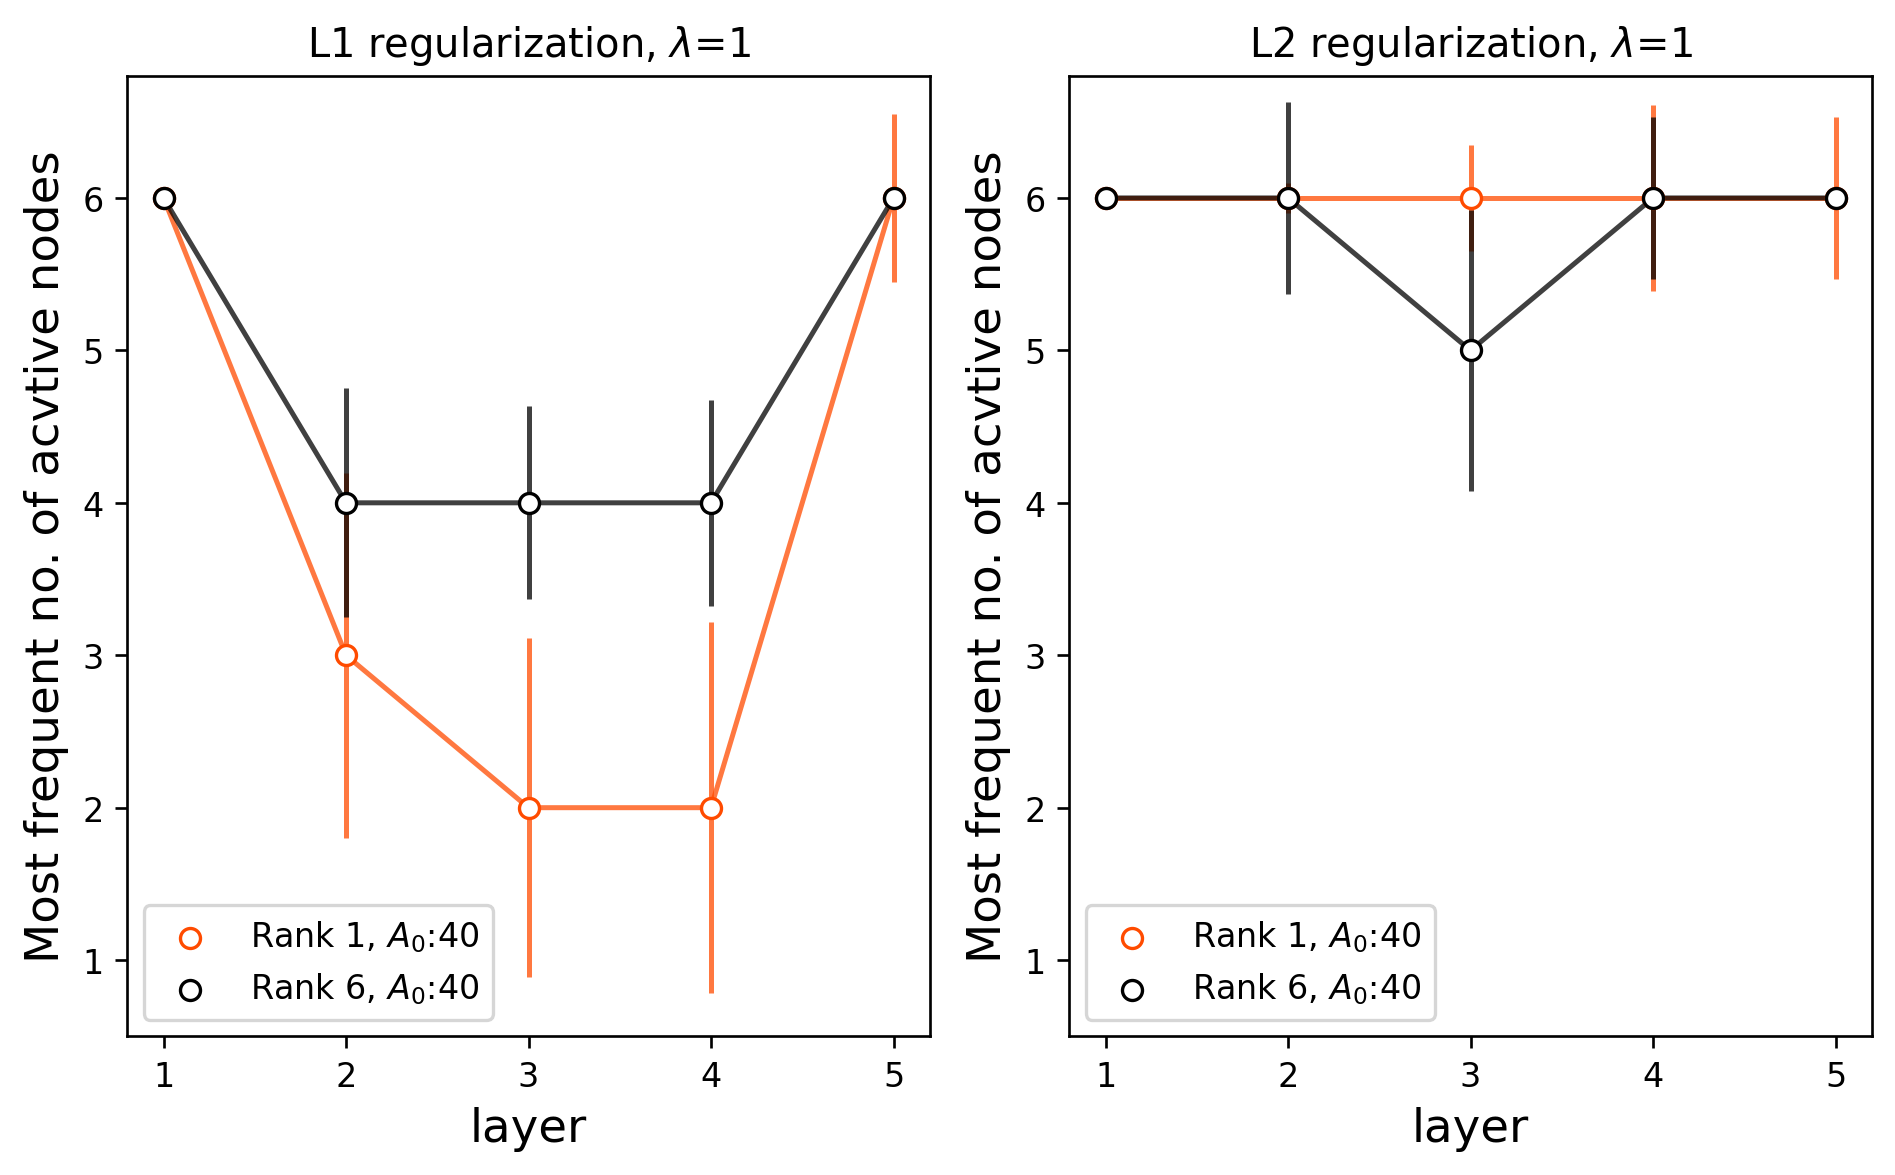

In [52]:
from matplotlib.backends.backend_pdf import PdfPages

TITLE = "FigureS10"
R1_L1_ini40 = np.loadtxt("Regularizations/RankDepend_R1_A40_L1.txt")
R6_L1_ini40 = np.loadtxt("Regularizations/RankDepend_R6_A40_L1.txt")

R1_L2_ini40 = np.loadtxt("Regularizations/RankDepend_R1_A40_L2.txt")
R6_L2_ini40 = np.loadtxt("Regularizations/RankDepend_R6_A40_L2.txt")

L1data = [R1_L1_ini40, R6_L1_ini40]
L1_ave = [[statistics_mode(L1data[k][:,i]) for i in range(5)] for k in range(2)]
L1_std = [np.std(L1data[k], axis=0) for k in range(2)]
print("L1")
print([len(L1) for L1 in L1data])


L2data = [R1_L2_ini40, R6_L2_ini40]
L2_ave = [[statistics_mode(L2data[k][:,i]) for i in range(5)] for k in range(2)]
L2_std = [np.std(L2data[k], axis=0) for k in range(2)]
print("L2")
print([len(L2) for L2 in L2data])

color = ["#ff4b00", "#000000"]
labels = ["Rank 1, $A_0$:40", "Rank 6, $A_0$:40"]

fig = plt.figure(figsize=(8, 5),facecolor="white", dpi=240)
ax[0] = fig.add_subplot(1, 2, 1)
ax[1] = fig.add_subplot(1, 2, 2)

  # x軸ラベル
for i in range(2):
    ax[i].set_xlabel('layer', size=14)
    ax[i].set_ylabel('Most frequent no. of acvtive nodes',size=14)  # y軸ラベル
    ax[i].set_ylim(0.5,6.8)
    ax[i].set_ylabel('Most frequent no. of acvtive nodes',size=14)  # y軸ラベル
    ax[i].set_xticks([1, 2, 3, 4, 5])
    
X = [1,2,3,4,5]

for k in range(2):
    ax[0].errorbar(X, L1_ave[k], yerr=L1_std[k], color=color[k], label=labels[k], alpha=0.75, zorder=1)
    ax[0].scatter(X, L1_ave[k], facecolor='white', edgecolors=color[k], zorder=2)
    
for k in range(2):
    ax[1].errorbar(X, L2_ave[k], yerr=L2_std[k], color=color[k], label=labels[k], alpha=0.75, zorder=1)
    ax[1].scatter(X, L2_ave[k], facecolor='white', edgecolors=color[k], zorder=2)

ax[0].legend(labels = labels,loc="lower left")
ax[1].legend(labels = labels,loc="lower left")
ax[0].set_title("L1 regularization, $λ$=1")
ax[1].set_title("L2 regularization, $λ$=1")
plt.tight_layout()

#fig.savefig("/Users/itoutouma/Desktop/BowTiePaper/Figures0319/{}.tiff".format(TITLE), bbox_inches='tight')
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig12.pdf")

### Supp Fig13 Supporting figure 
- Data directory: NonLiear
- Simulatpoin code: XXXX

>(b) Evolutionary trajectories of the network. X-axis represents generation. The upper 5 panels show the mean number of active nodes in each layer among 10 simulation runs. The second panel from the bottom shows mean fitness that is defined as the distance between a current output and an ideal output. The bottom panel shows the accuracy score which represents how precisely the network can classify the images. Evolution starts from a large value (A_0:100) in the dashed line and from a small value in the solid line (A_0:0.01). 


(10, 200, 7)
(10, 200, 7)


Text(0.5, 0.05, 'Generation (x100)')

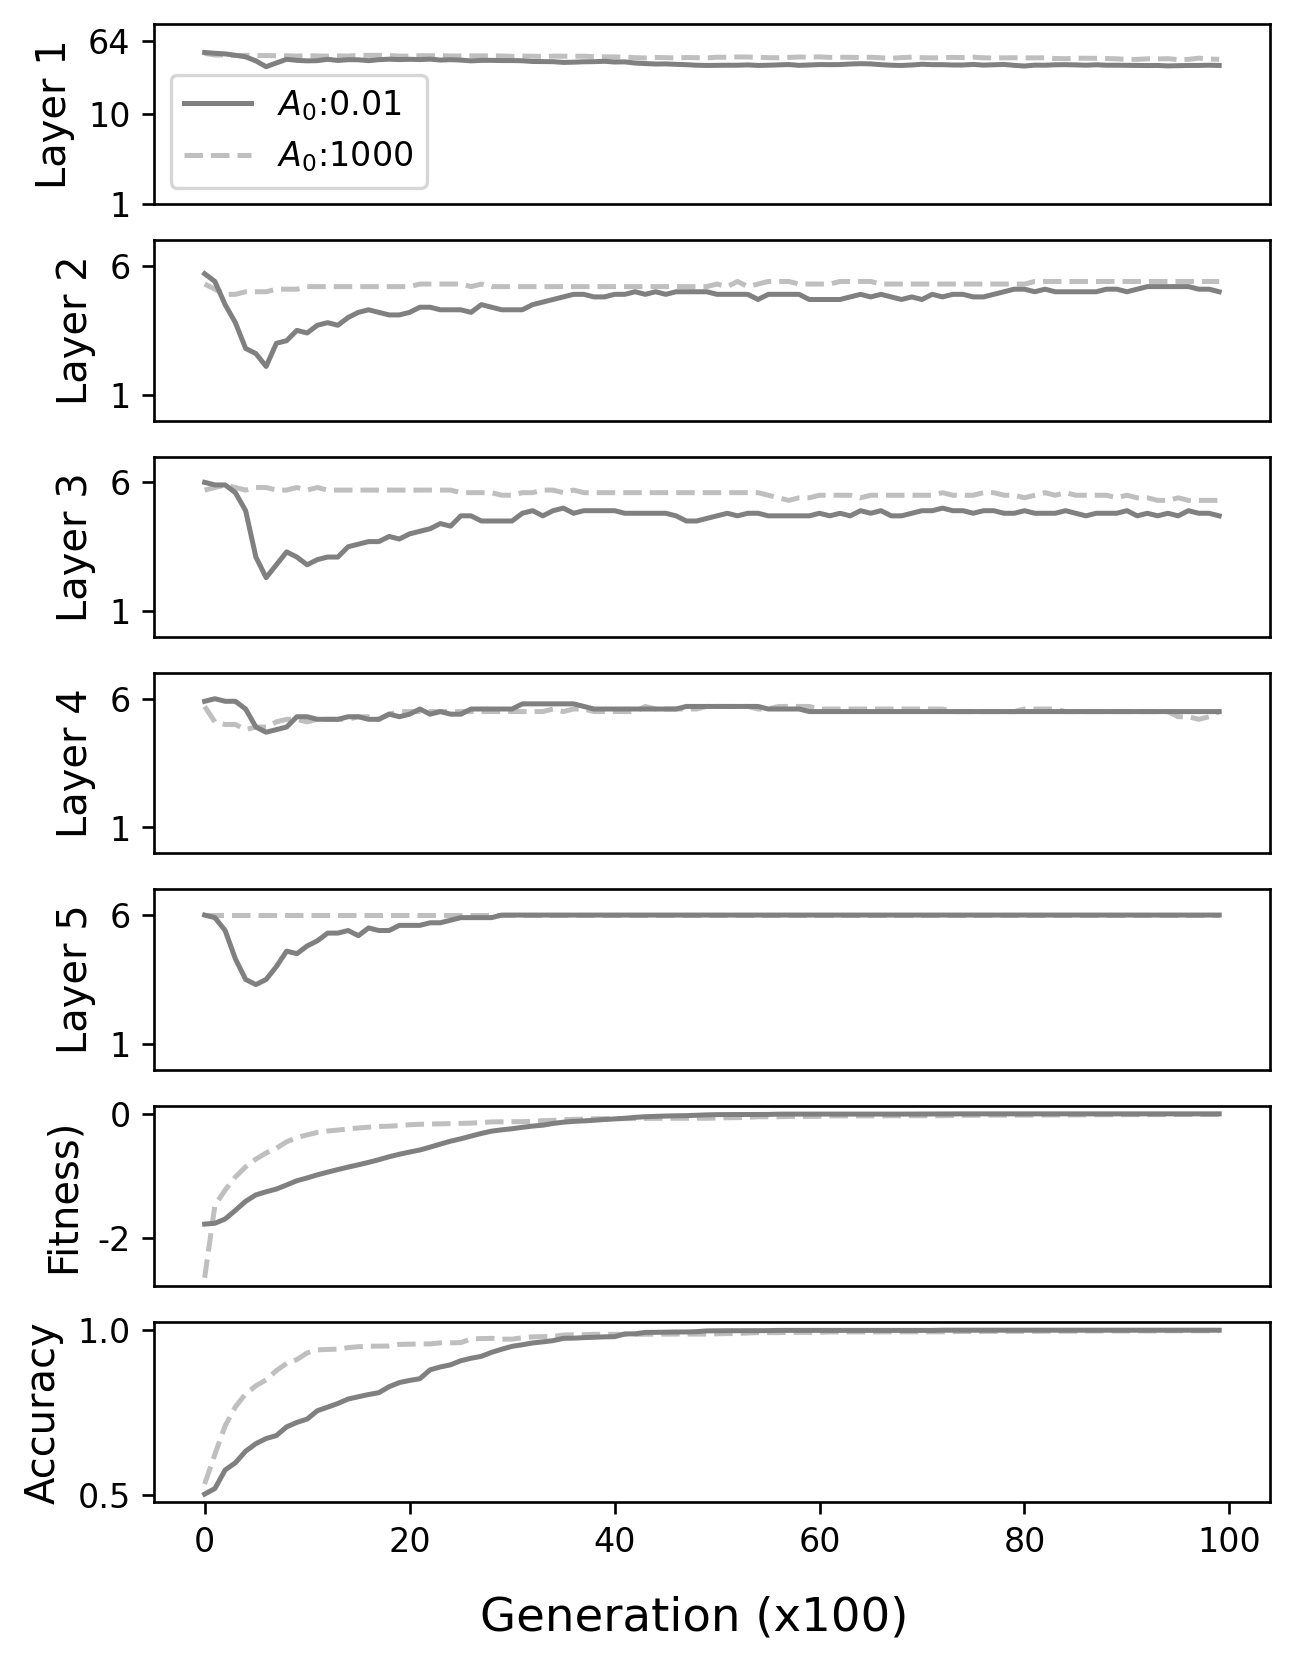

In [54]:
import matplotlib.pyplot as plt


N001data = list()
for i in range(10):
    N001data.append(np.load(f"NonLinear/NonLinearA0_A0_001_{i}.npy"))
N001data = np.array(N001data)
print(N001data.shape)


N1000data = list()
for i in range(10):
    N1000data.append(np.load(f"NonLinear/NonLinearA0_A0_1000_{i}.npy"))
N1000data = np.array(N1000data)
print(N1000data.shape)



ax = list(range(7))
fig = plt.figure(figsize=(6, 8),facecolor="white", dpi=240)

N001_colors = ["#D15235", "#455CB1", "#00AB81",  "#000000"]
N40_colors = ["#FF8B89", "#ABD0E4", "#8DBA99", "grey"]
Ranks = ["Rank1","Rank2", "Rank3", "Rank6"]
layer = 0

#Define character arrays for readability
Layers = ["Layer 1","Layer 2", "Layer 3", "Layer 4", "Layer 5", "Fitness)", "Accuracy"]
PannelPosition = ["left edge", 0,0,"right edge"]


active_node_list_N001 = np.mean(N001data, axis=0)[0:100]#np.array(N001_ActiveNodeList)
active_node_list_N100 = np.mean(N1000data, axis=0)[0:100]#np.array(N1000_ActiveNodeList)

#active_node_list_N100 = np.load("NonLinear_beta05_A1000_6classi_data300_nNode6.npy")
#active_node_list_N001 = np.load("NonLinear_beta05_A001_6classi_data300_nNode6.npy")
#active_node_list_N100 = np.load("NonLinear_ParamSetB_A1000.npy")
#active_node_list_N001 = np.load("NonLinear_ParamSetB_A001.npy")

col = "grey"
for i in range(7):
    
    ax[i] = fig.add_subplot(7, 1, i+1)
    if Layers[i] == "Layer 1":
        ax[i].set_ylim(0.8,2)
        ax[i].set_yticks([np.log10(1), np.log10(10),np.log10(64)])
        ax[i].set_yticklabels([1,10,64])
        ax[i].set_xticks([])
        ax[i].plot(np.log10(active_node_list_N001[:,i]), alpha= 1, color=col, label="$A_0$ 0.01")
        ax[i].plot(np.log10(active_node_list_N100[:,i]), alpha= 0.5, color=col, linestyle="dashed", label="$A_0$ 100")
        ax[i].legend(labels = ["$A_0$:0.01", "$A_0$:1000"])
        #ax[i].legend(labels = [f"$A_0$:{NETWORK_NORM}"])
    elif i < 5:
        ax[i].set_ylim(0,nNode+1)
        ax[i].set_yticks([1, 6])
        ax[i].set_xticks([])
        alpha_ = 1
        ax[i].plot(active_node_list_N001[:,i], alpha= 1, color=col, label="$A_0$ 0.01")
        ax[i].plot(active_node_list_N100[:,i], alpha= 0.5, color=col, linestyle="dashed", label="$A_0$ 100")
    elif i == 5:        
        #ax[i].set_ylim([-300,0])
        ax[i].set_yticks([-200,0])
        ax[i].set_xticks([])
        ax[i].set_yticklabels(["-2", "0"])
        alpha_ = 0.5
        ax[i].plot(active_node_list_N001[:,5], alpha= 1, color=col, label="$A_0$ 0.01")
        ax[i].plot(active_node_list_N100[:,5], alpha= 0.5, color=col, linestyle="dashed", label="$A_0$ 100")
    elif i == 6:        
        #ax[i].set_ylim([-300,0])
        #ax[i].set_yticks([-200,0])
        #ax[i].set_yticklabels(["-2", "0"])
        alpha_ = 0.5
        ax[i].plot(active_node_list_N001[:,6], alpha= 1, color=col, label="$A_0$ 0.01")
        ax[i].plot(active_node_list_N100[:,6], alpha= 0.5, color=col, linestyle="dashed", label="$A_0$ 100")

    ax[i].set_ylabel(Layers[i],size=12, rotation=90)

    
    #Individual plot (first 10 sample)
    """
    
    for j in range(9):
        ax[i].plot(N001data[j][0:100][:,i], alpha=0.1, color="grey", label="$A_0$:0.01")
        ax[i].plot(N1000data[j][0:100][:,i], alpha=0.1, color="black",linestyle="dashed",label="$A_0$:100")      
    
    if Layers[layer] == "Layer 1":
        ax[i].legend(labels = ["$A_0$:0.01", "$A_0$:40"])
        ax[i].set_title(Ranks[i],size=14)

    if PannelPosition[i%4] == "left edge":
        ax[i].set_ylabel(Layers[layer],size=14)
    if PannelPosition[i%4] == "right edge":
        layer+=1
    """
    
        
#matplotlib.rcParams['pdf.fonttype'] = 42
#fig.text(-0.03, 0.55, 'No. of active nodes in each layer', ha='center', va='center', rotation='vertical', size=14)
fig.text(0.5, 0.05, 'Generation (x100)', ha='center', va='center', size=14)
#fig.savefig("/Users/itoutouma/Dropbox/2023ItohBowTiePaper/Npj/rivision1/figure/SuppFig13_2.pdf")